# External modules

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(scatterplot3d)

In [3]:
library(DataExplorer)

In [4]:
library(DescTools)

In [5]:
options(repr.plot.width=19, repr.plot.height=12)

# Internal modules

In [6]:
path <- ".."

In [7]:
xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))

# Used dataset

In [8]:
source <- "./applications/final_dataset.csv"

In [9]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = source, sep = ","))

In [10]:
str(data)

'data.frame':	22847 obs. of  59 variables:
 $ timestamp             : int  17207386 17241310 17274219 17308103 17343083 17374951 17408808 17440764 17474667 17508571 ...
 $ latitude              : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num  2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude     : num  NA -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 ...
 $ velocity_longitude    : num  NA 9.48e-12 7.09e-12 6.72e-12 8.41e-12 ...
 $ velocity              : num  NA 5.00e-11 3.89e-11 3.79e-11 4.93e-11 ...
 $ lateral_error         : num  -0.589 -0.571 -0.566 -0.56 -0.592 ...
 $ longitudinal_error    : num  0.0639 0.0775 0.0832 0.0979 0.1043 ...
 $ haversine_error       : num  0.592 0.576 0.572 0.569 0.6 ...
 $ latitude_error        : num  4.91e-06 4.77e-06 4.73e-06 5.57e-06 4.96e-06 ...
 $ longitude_error       : num  -1.22e-07 1.33e-07 2.49e-07 3.92e-07 5.62e-07 ...
 $ heading_error         : num  1.94 1.95 1.97 2.15 2.08 ...
 $ lateral_error_abs     : num  0.589 0.571 0.566 0

# Outlier detection

In [11]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

## lateral_error

In [12]:
data_lateral_error_object <- impute_outliers(x = data$lateral_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [13]:
print(names(data_lateral_error_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [14]:
print(data_lateral_error_object$outlier_positions)

  [1]  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359  2360  2361
 [13]  2362  2363  2364  2365  2366  2367  2368  2369  2370  2371  2372  2373
 [25]  2374  2375  2376  2377  2378  2379  2380  2381  2382  2383  2384  2385
 [37]  2386  2387  2388  2389  2390  4811  4812  4813  4814  4815  4816  4817
 [49]  4818  4819  4820  4821  4822  4823  4824  4825  4826 16606 16607 16608
 [61] 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619 16620
 [73] 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631 16632
 [85] 16633 16634 16635 16636 16637 16638 16639 16640 16641 16642 16643 16644
 [97] 16645 16646 16647 16648 16649 16650 16651 16652 16653 16654 16655 18392
[109] 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404
[121] 18405 18406 18407 18408 18409 18410 18411 18412 18417 18418 18419 18420
[133] 18421 18422 18423 18424 18425 18426 18427 18428 18429 18430 18431 18432
[145] 18433 18434 18435 18436 18437 18438 18439 18440 18441 1844

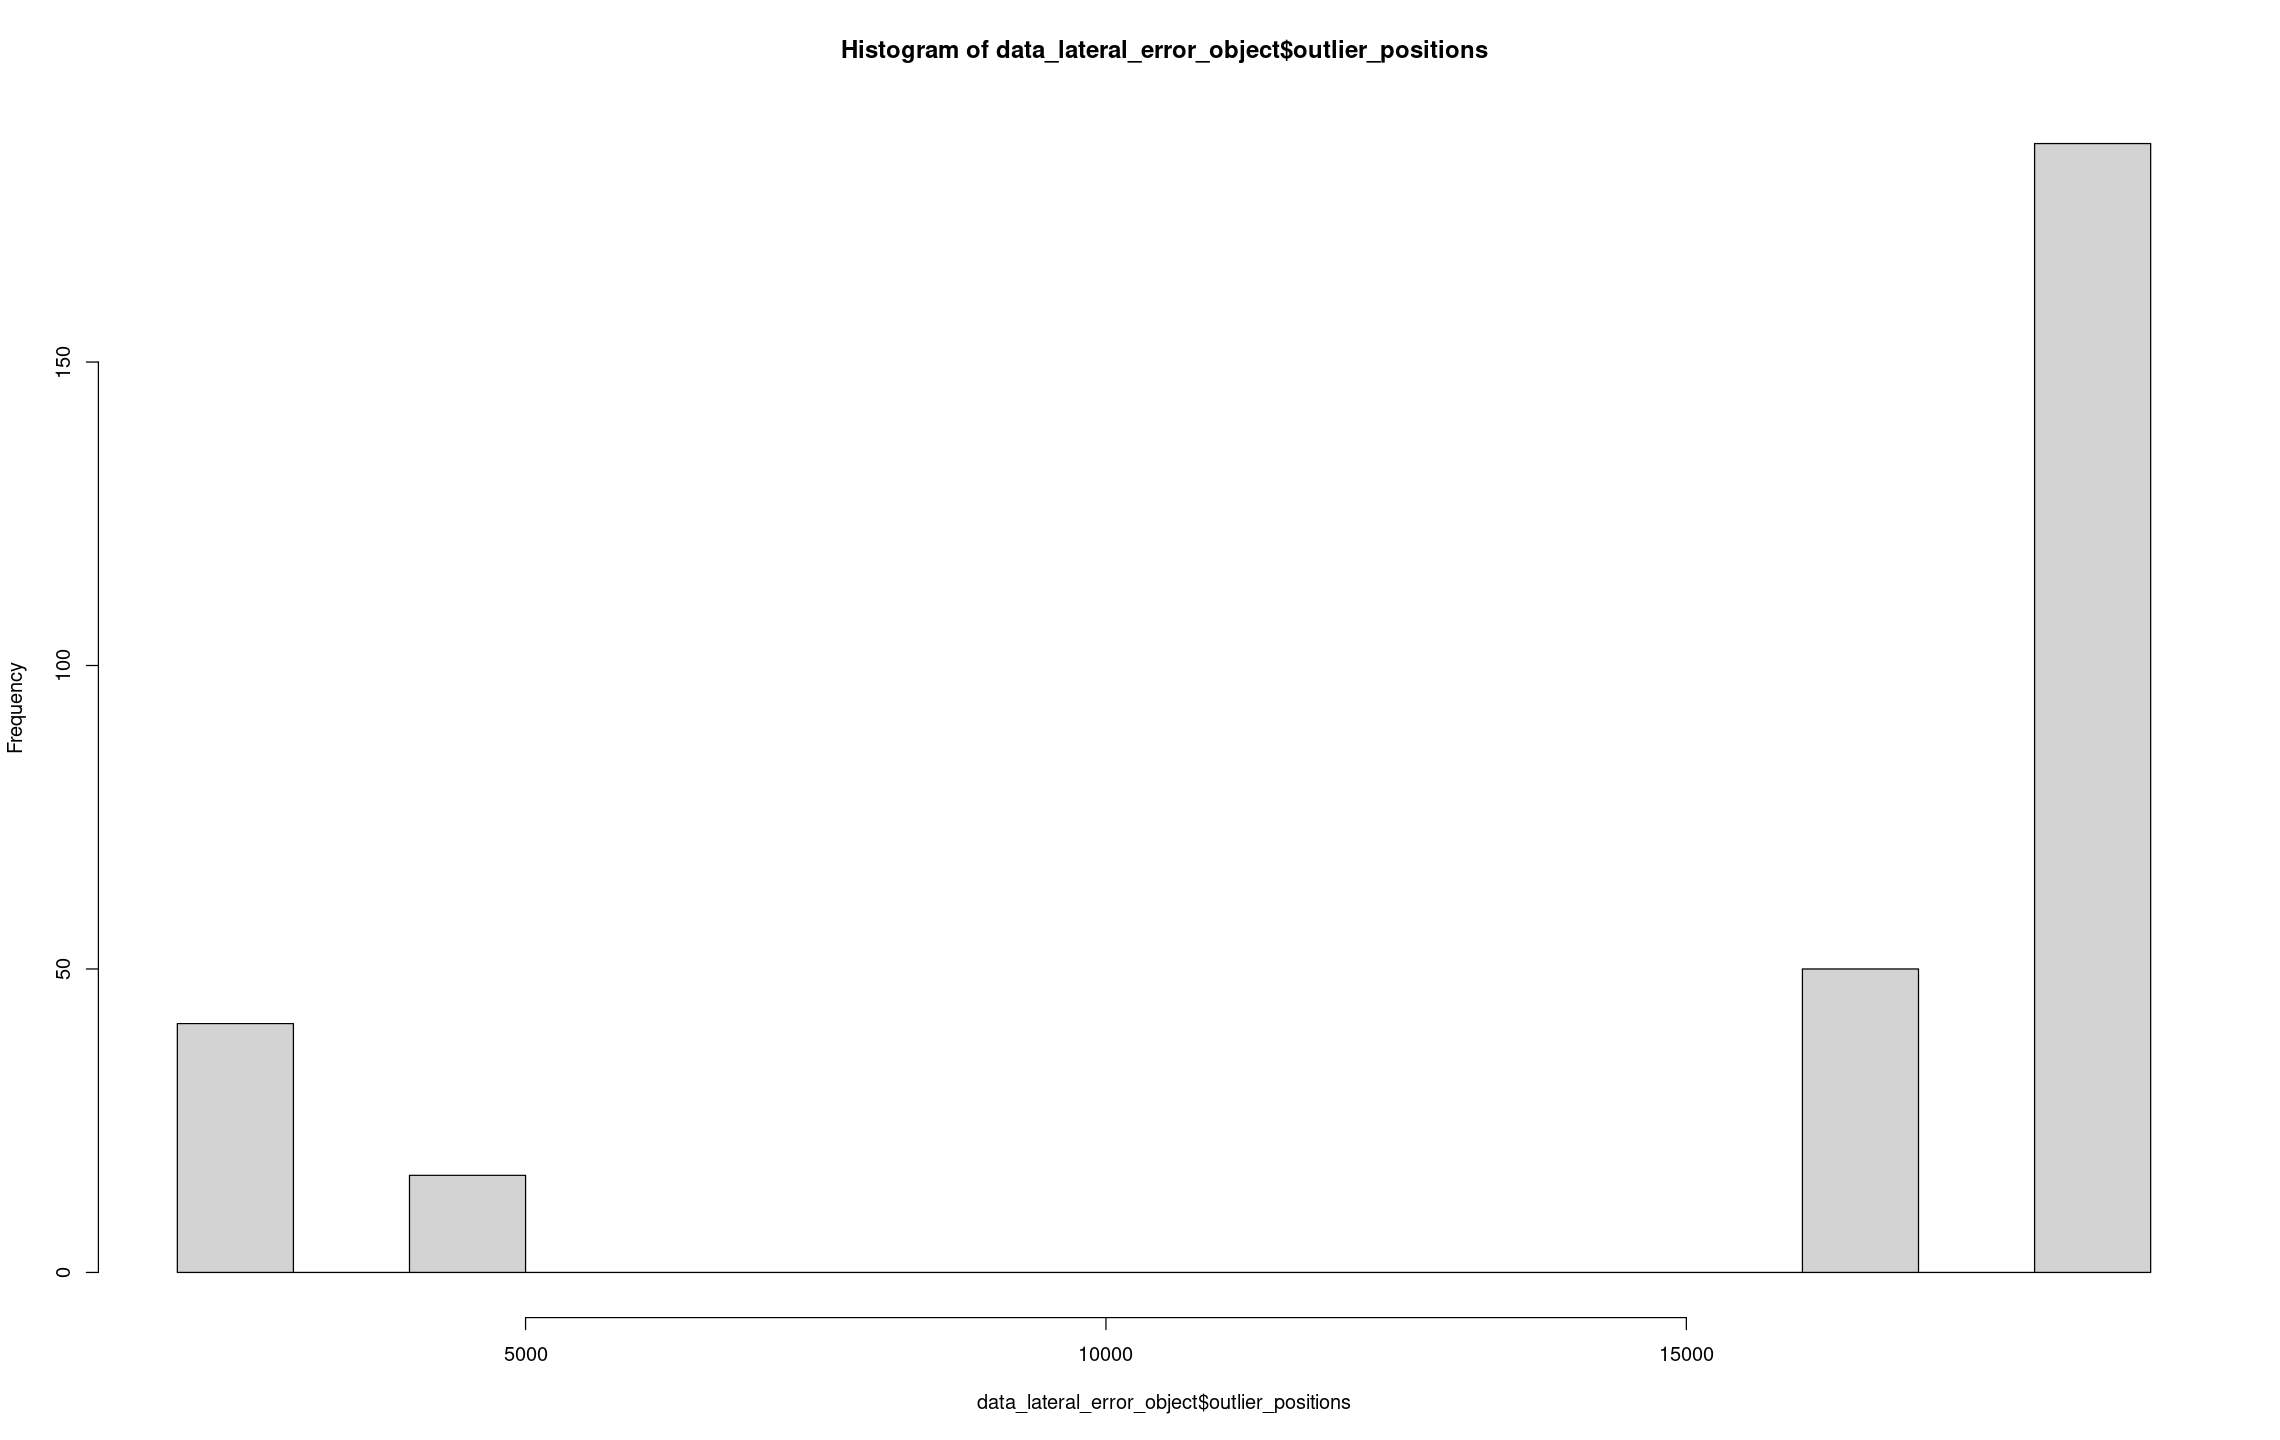

In [15]:
hist(data_lateral_error_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_lateral_error_object$imputed_data (numeric)

      length           n        NAs     unique         0s       mean'
      22'847      22'847          0     22'583          0  0.4037915
                  100.0%       0.0%                  0.0%           
                                                                    
         .05         .10        .25     median        .75        .90
  -0.2147202  -0.1373297  0.0946548  0.3051641  0.6248049  0.9418443
                                                                    
       range          sd      vcoef        mad        IQR       skew
   9.9585366   0.6145645  1.5219848  0.3833108  0.5301501  2.6125995
                                                                    
      meanCI
   0.3958221
   0.4117609
            
         .95
   1.2822340
            
        kurt
  21.1530924
            
lowest : -4.5705433, -4.5366518, -4.5027604, -4.4

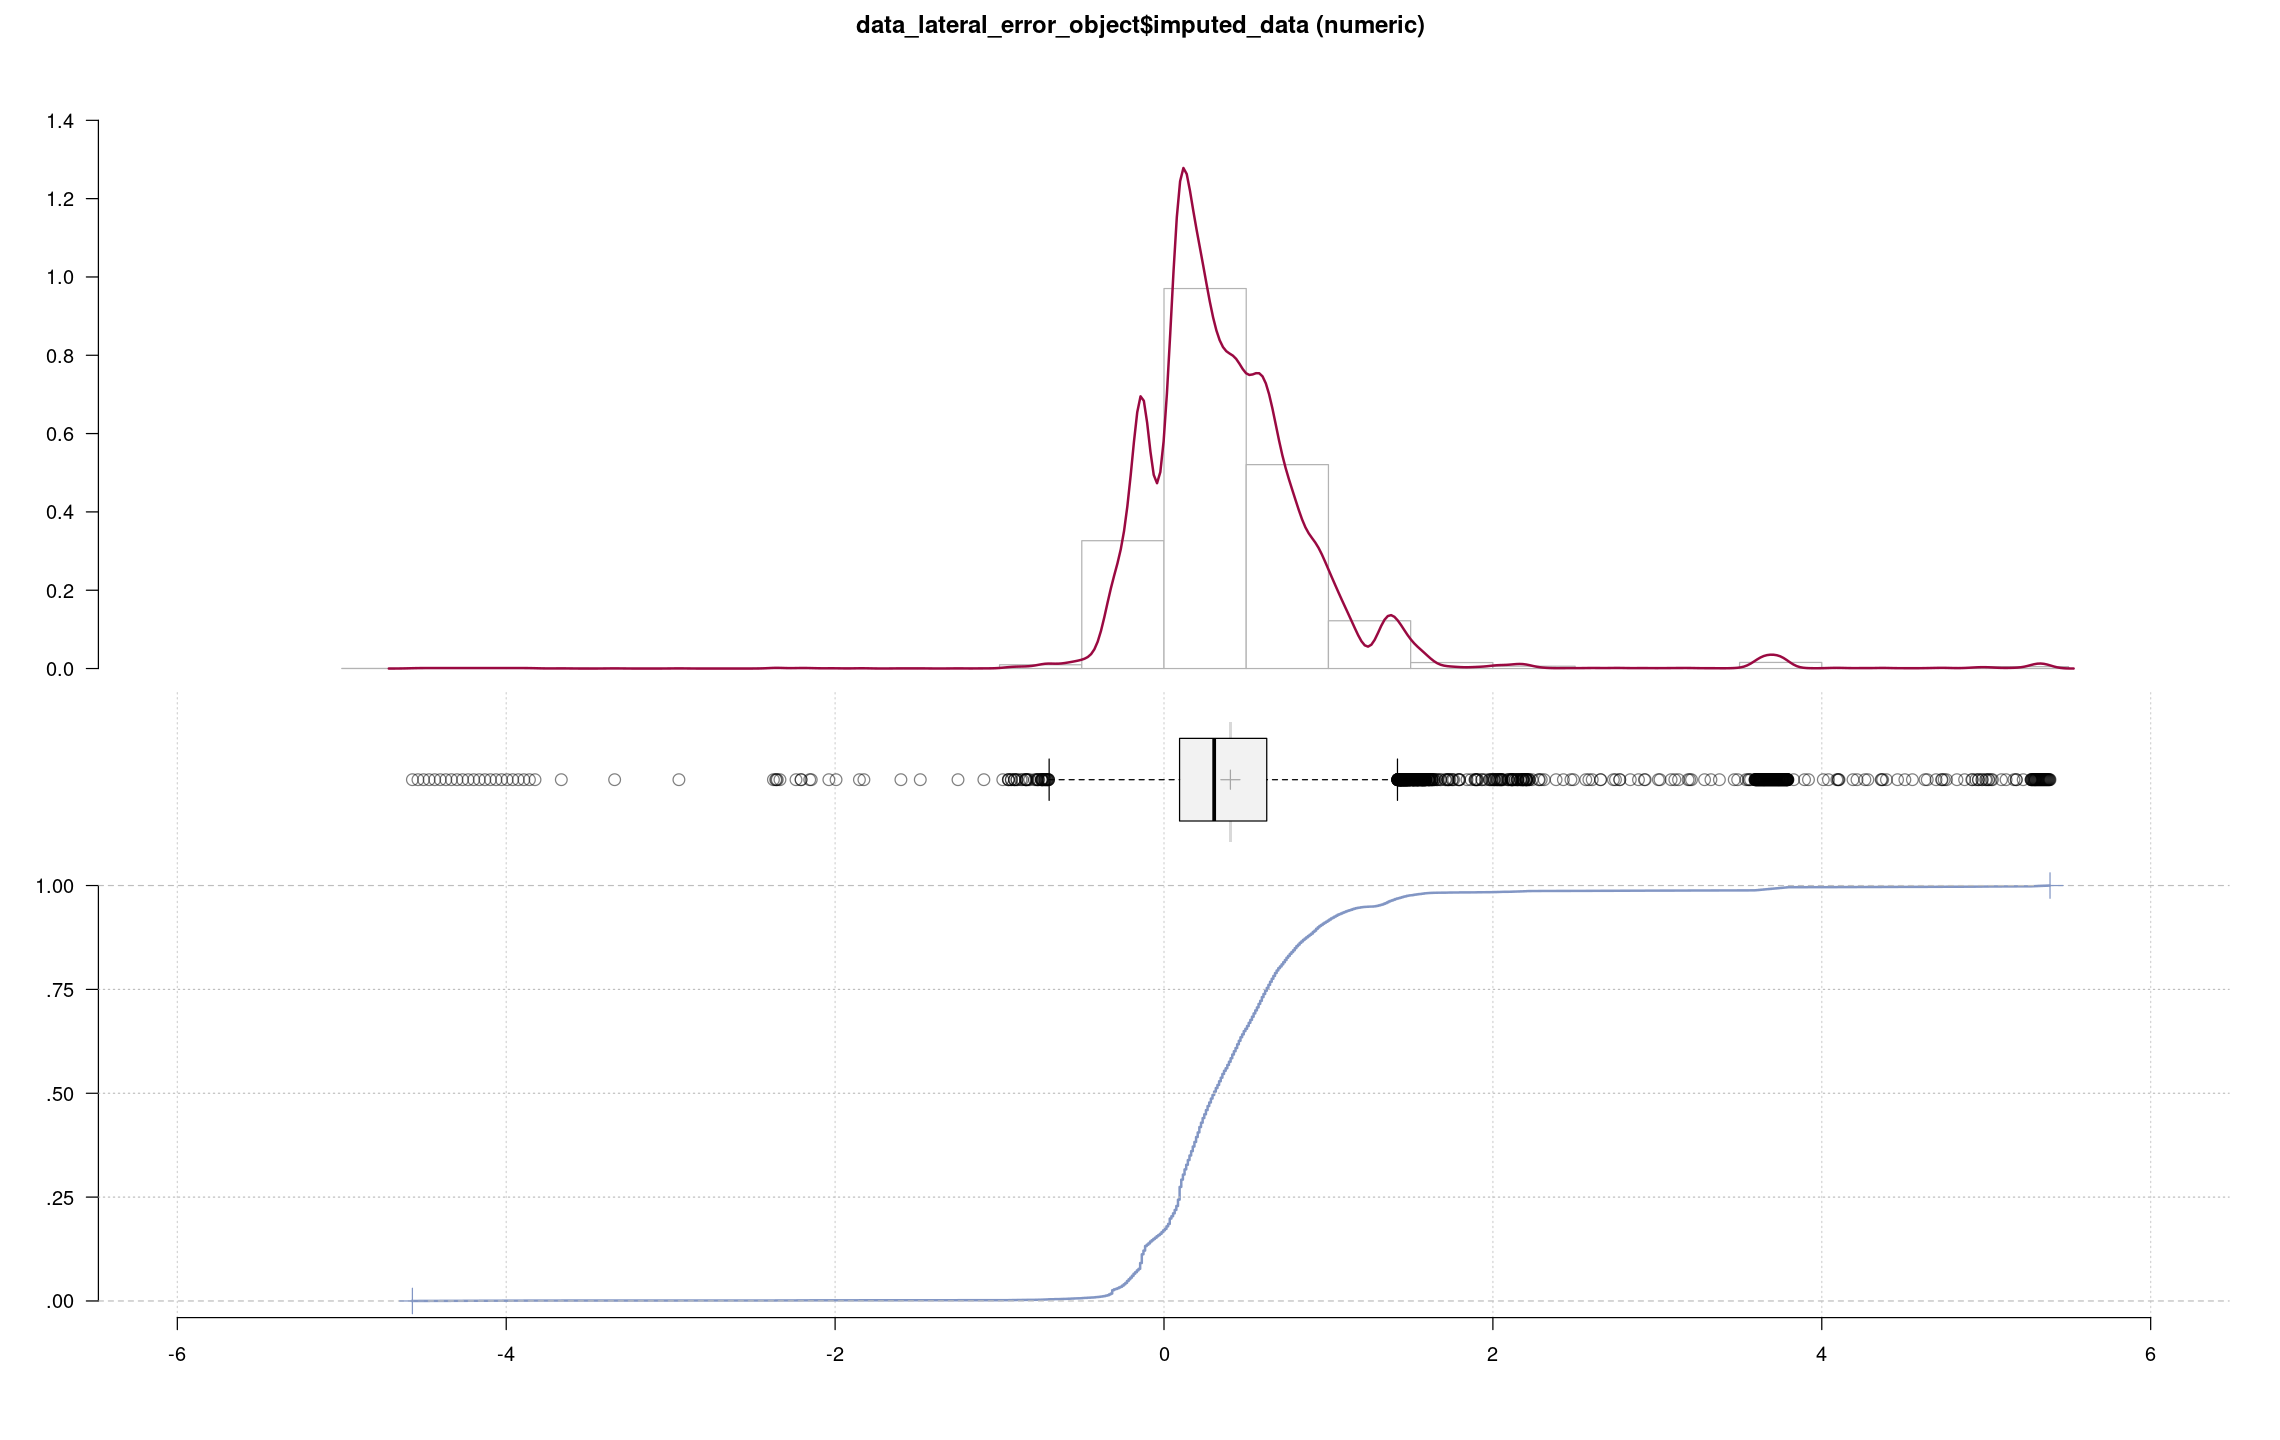

In [16]:
Desc(data_lateral_error_object$imputed_data)

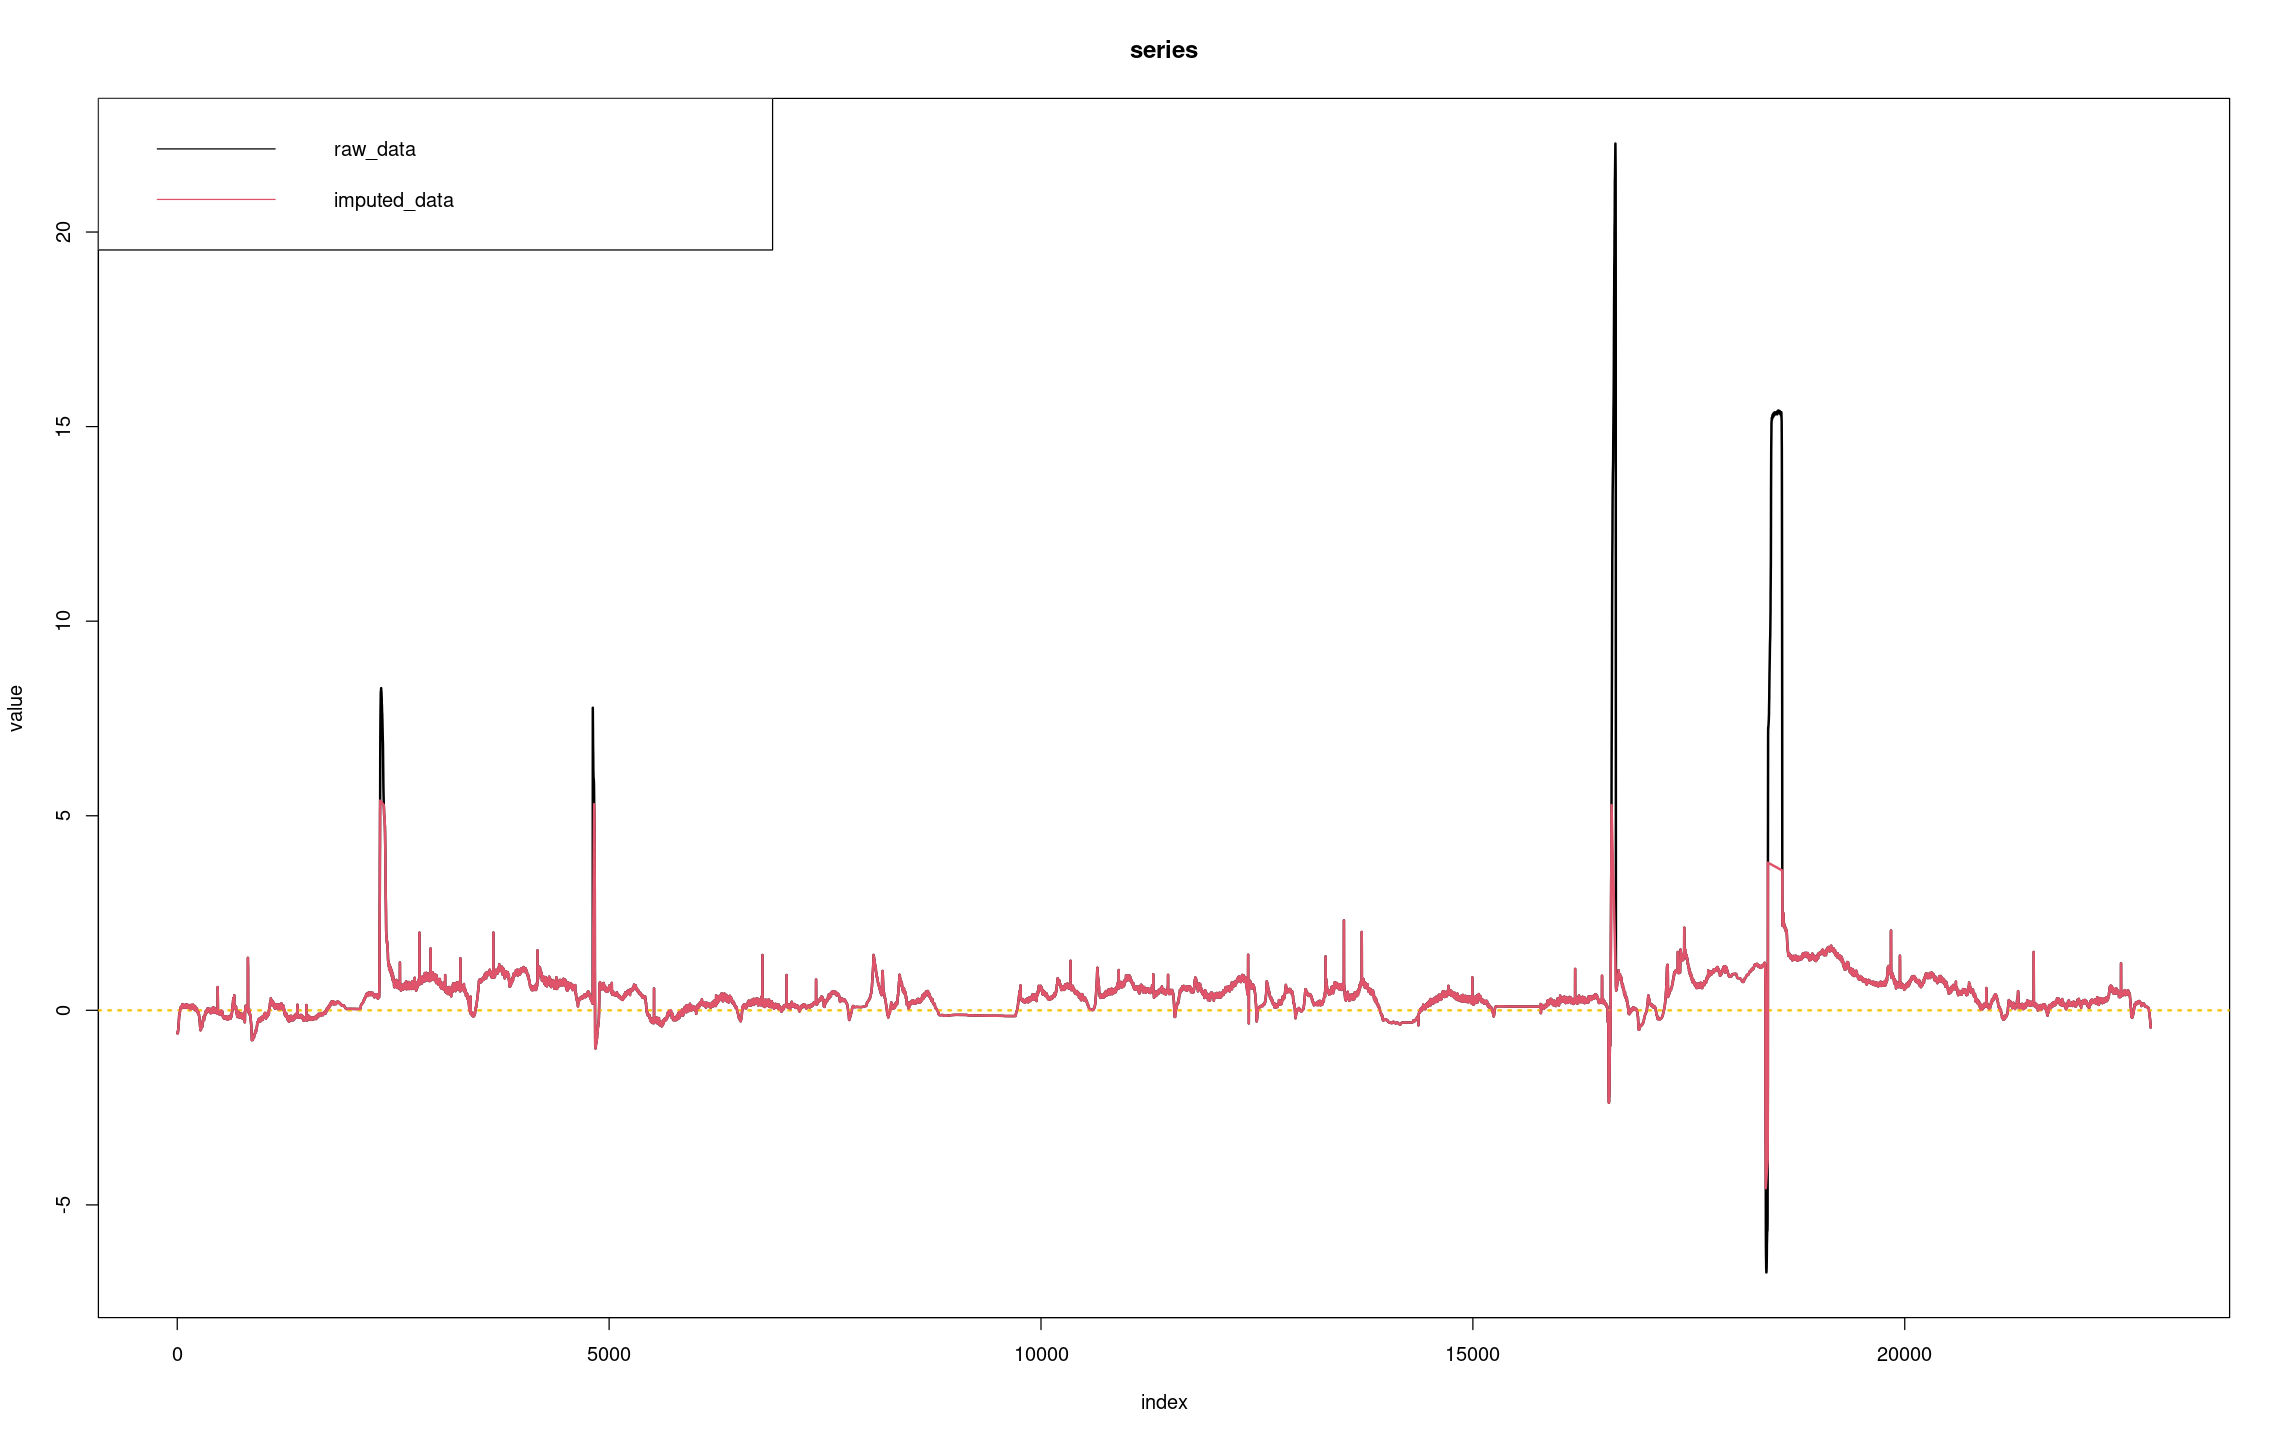

In [17]:
plot(data_lateral_error_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_lateral_error_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## longitudinal_error

In [18]:
data_longitudinal_error_object <- impute_outliers(x = data$longitudinal_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [19]:
print(names(data_longitudinal_error_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [20]:
print(data_longitudinal_error_object$outlier_positions)

 [1]  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820  4821  4822
[13]  4823  4824  4825  4826  4827  4828  4829  4830  4831 16609 16610 16611
[25] 16612 16613 16614 16615 16616 16617 16618 16619 16620 16621 16622 16623
[37] 16624 16625 16626 16627 16628 16629 16630 16631 16632 16633 16634 16635
[49] 16636 16637 16638 16639 16640 16641 16642 16643 16644 16645 16646 16647
[61] 16648 16649 16650 16651 16652 16653 16654 18388 18389 18390 18391 18392
[73] 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404
[85] 18405 18406 18407 18408 18409 18410 18411 18412 18413 18414 18415 18416


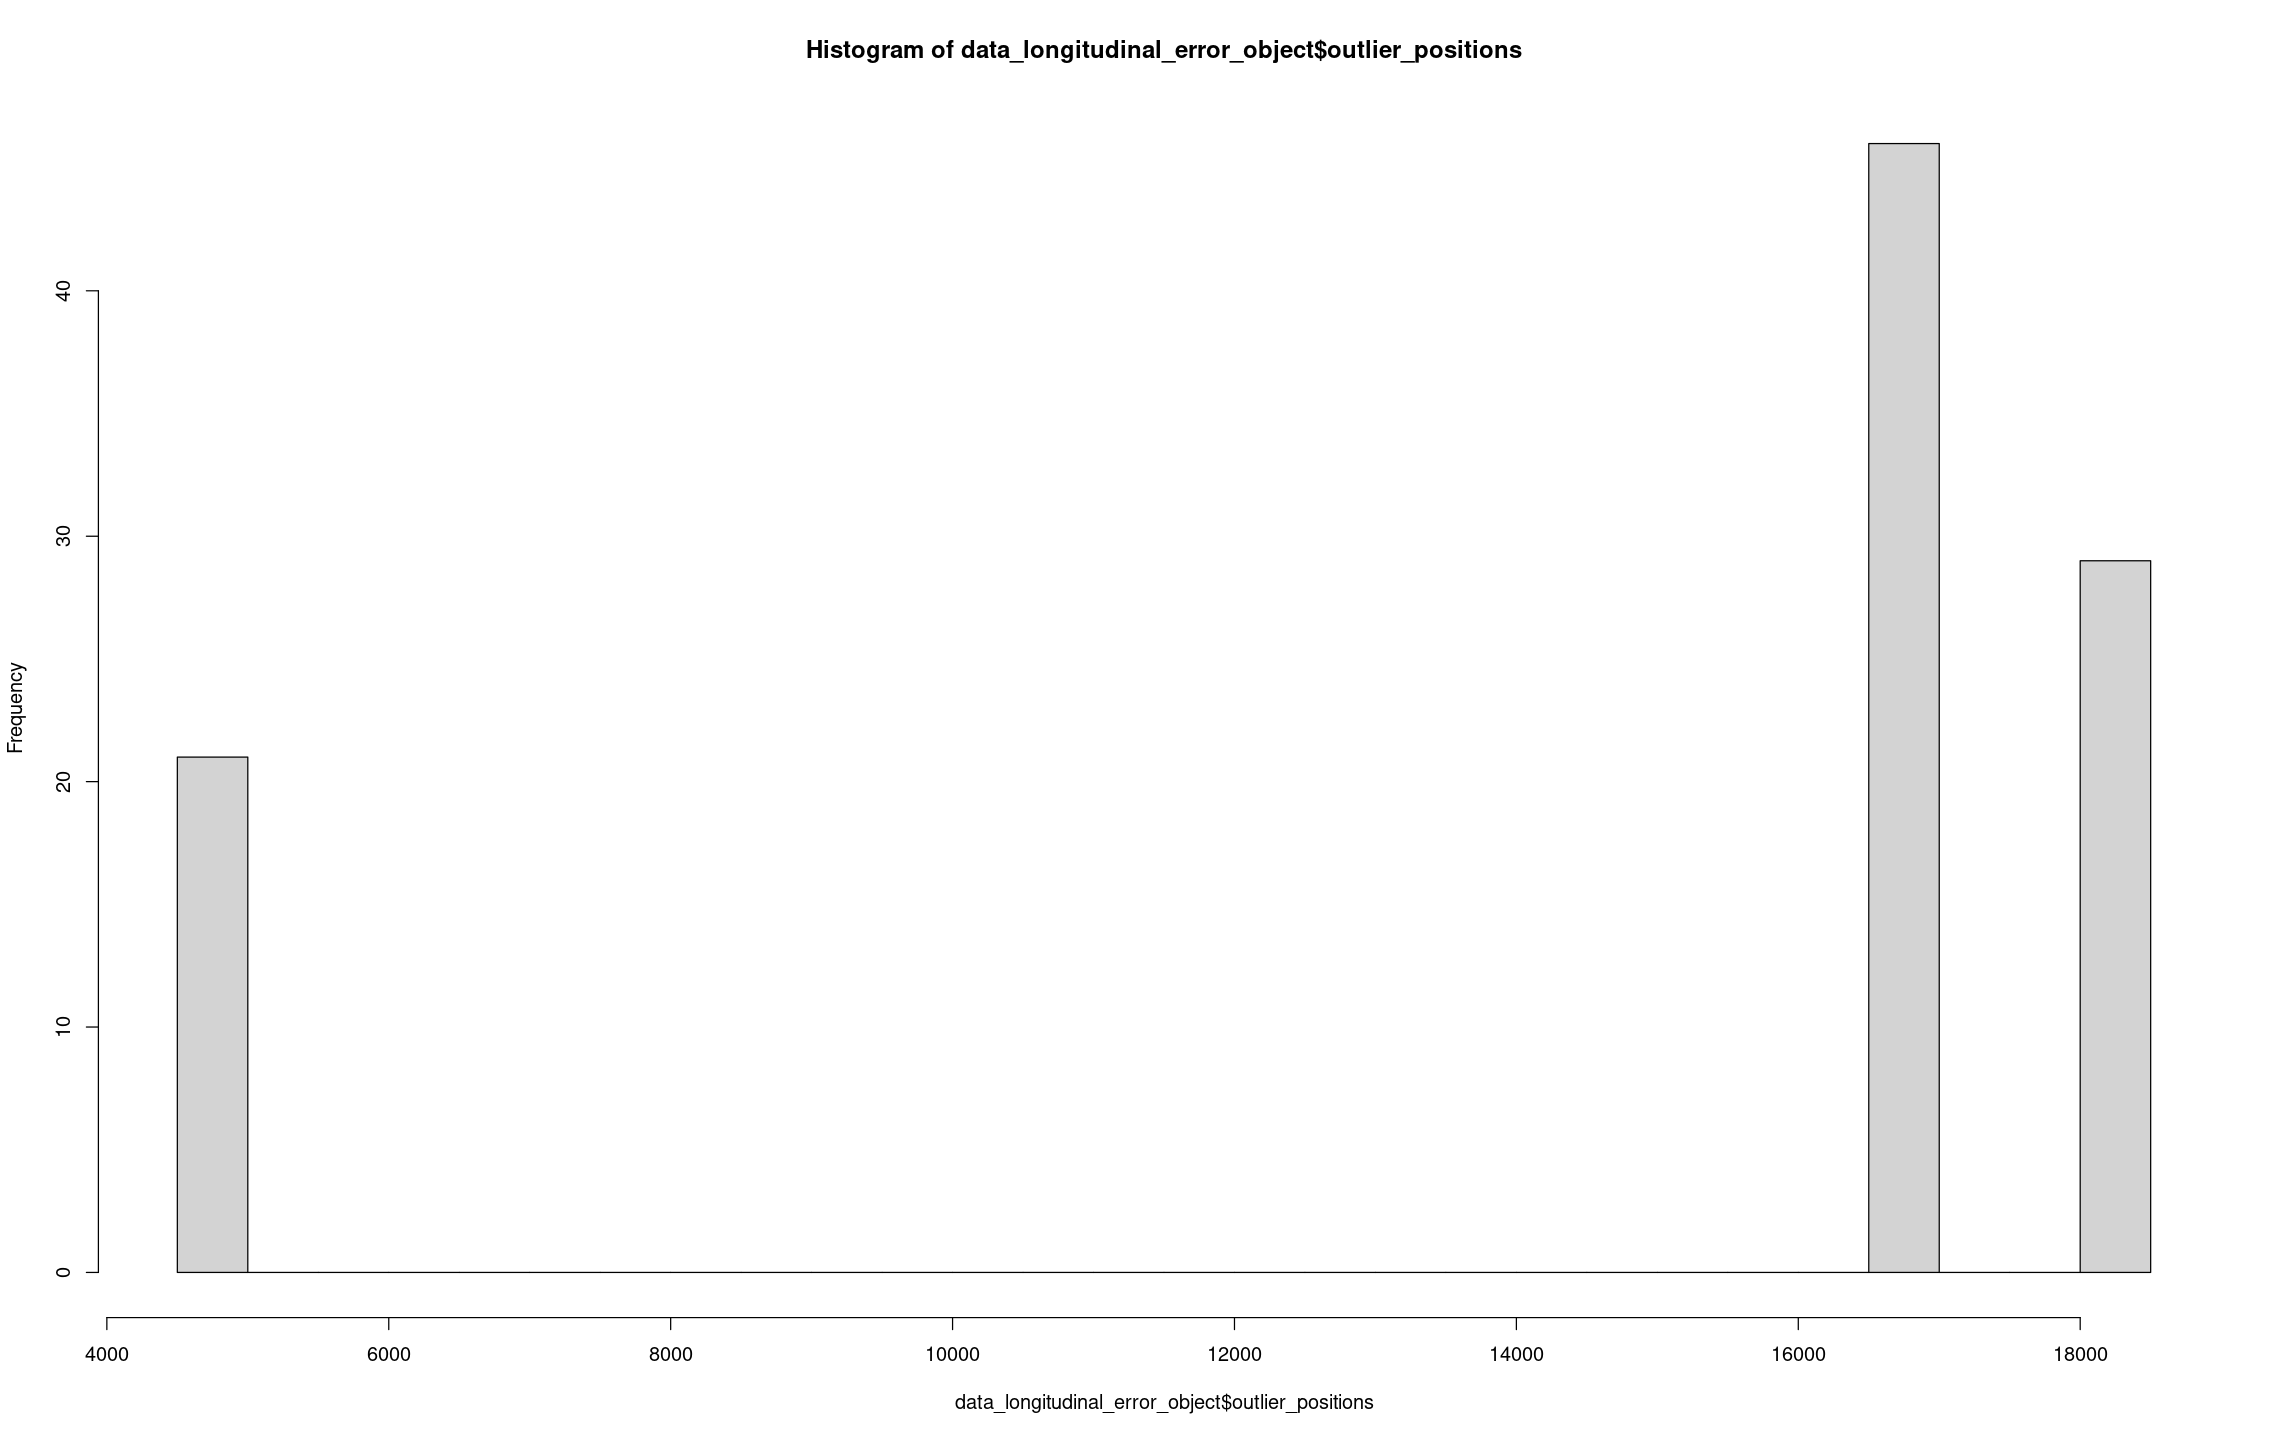

In [21]:
hist(data_longitudinal_error_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_longitudinal_error_object$imputed_data (numeric)

       length            n          NAs      unique          0s         mean'
       22'847       22'847            0      22'584           0   0.02871592
                    100.0%         0.0%                    0.0%             
                                                                            
          .05          .10          .25      median         .75          .90
  -0.50240880  -0.29613398  -0.05847870  0.04122939  0.17910103   0.31280920
                                                                            
        range           sd        vcoef         mad         IQR         skew
   3.80308044   0.28093709   9.78332092  0.17755831  0.23757973  -0.65646917
                                                                            
      meanCI
  0.02507287
  0.03235898
            
         .95
  0.45752030
            
   

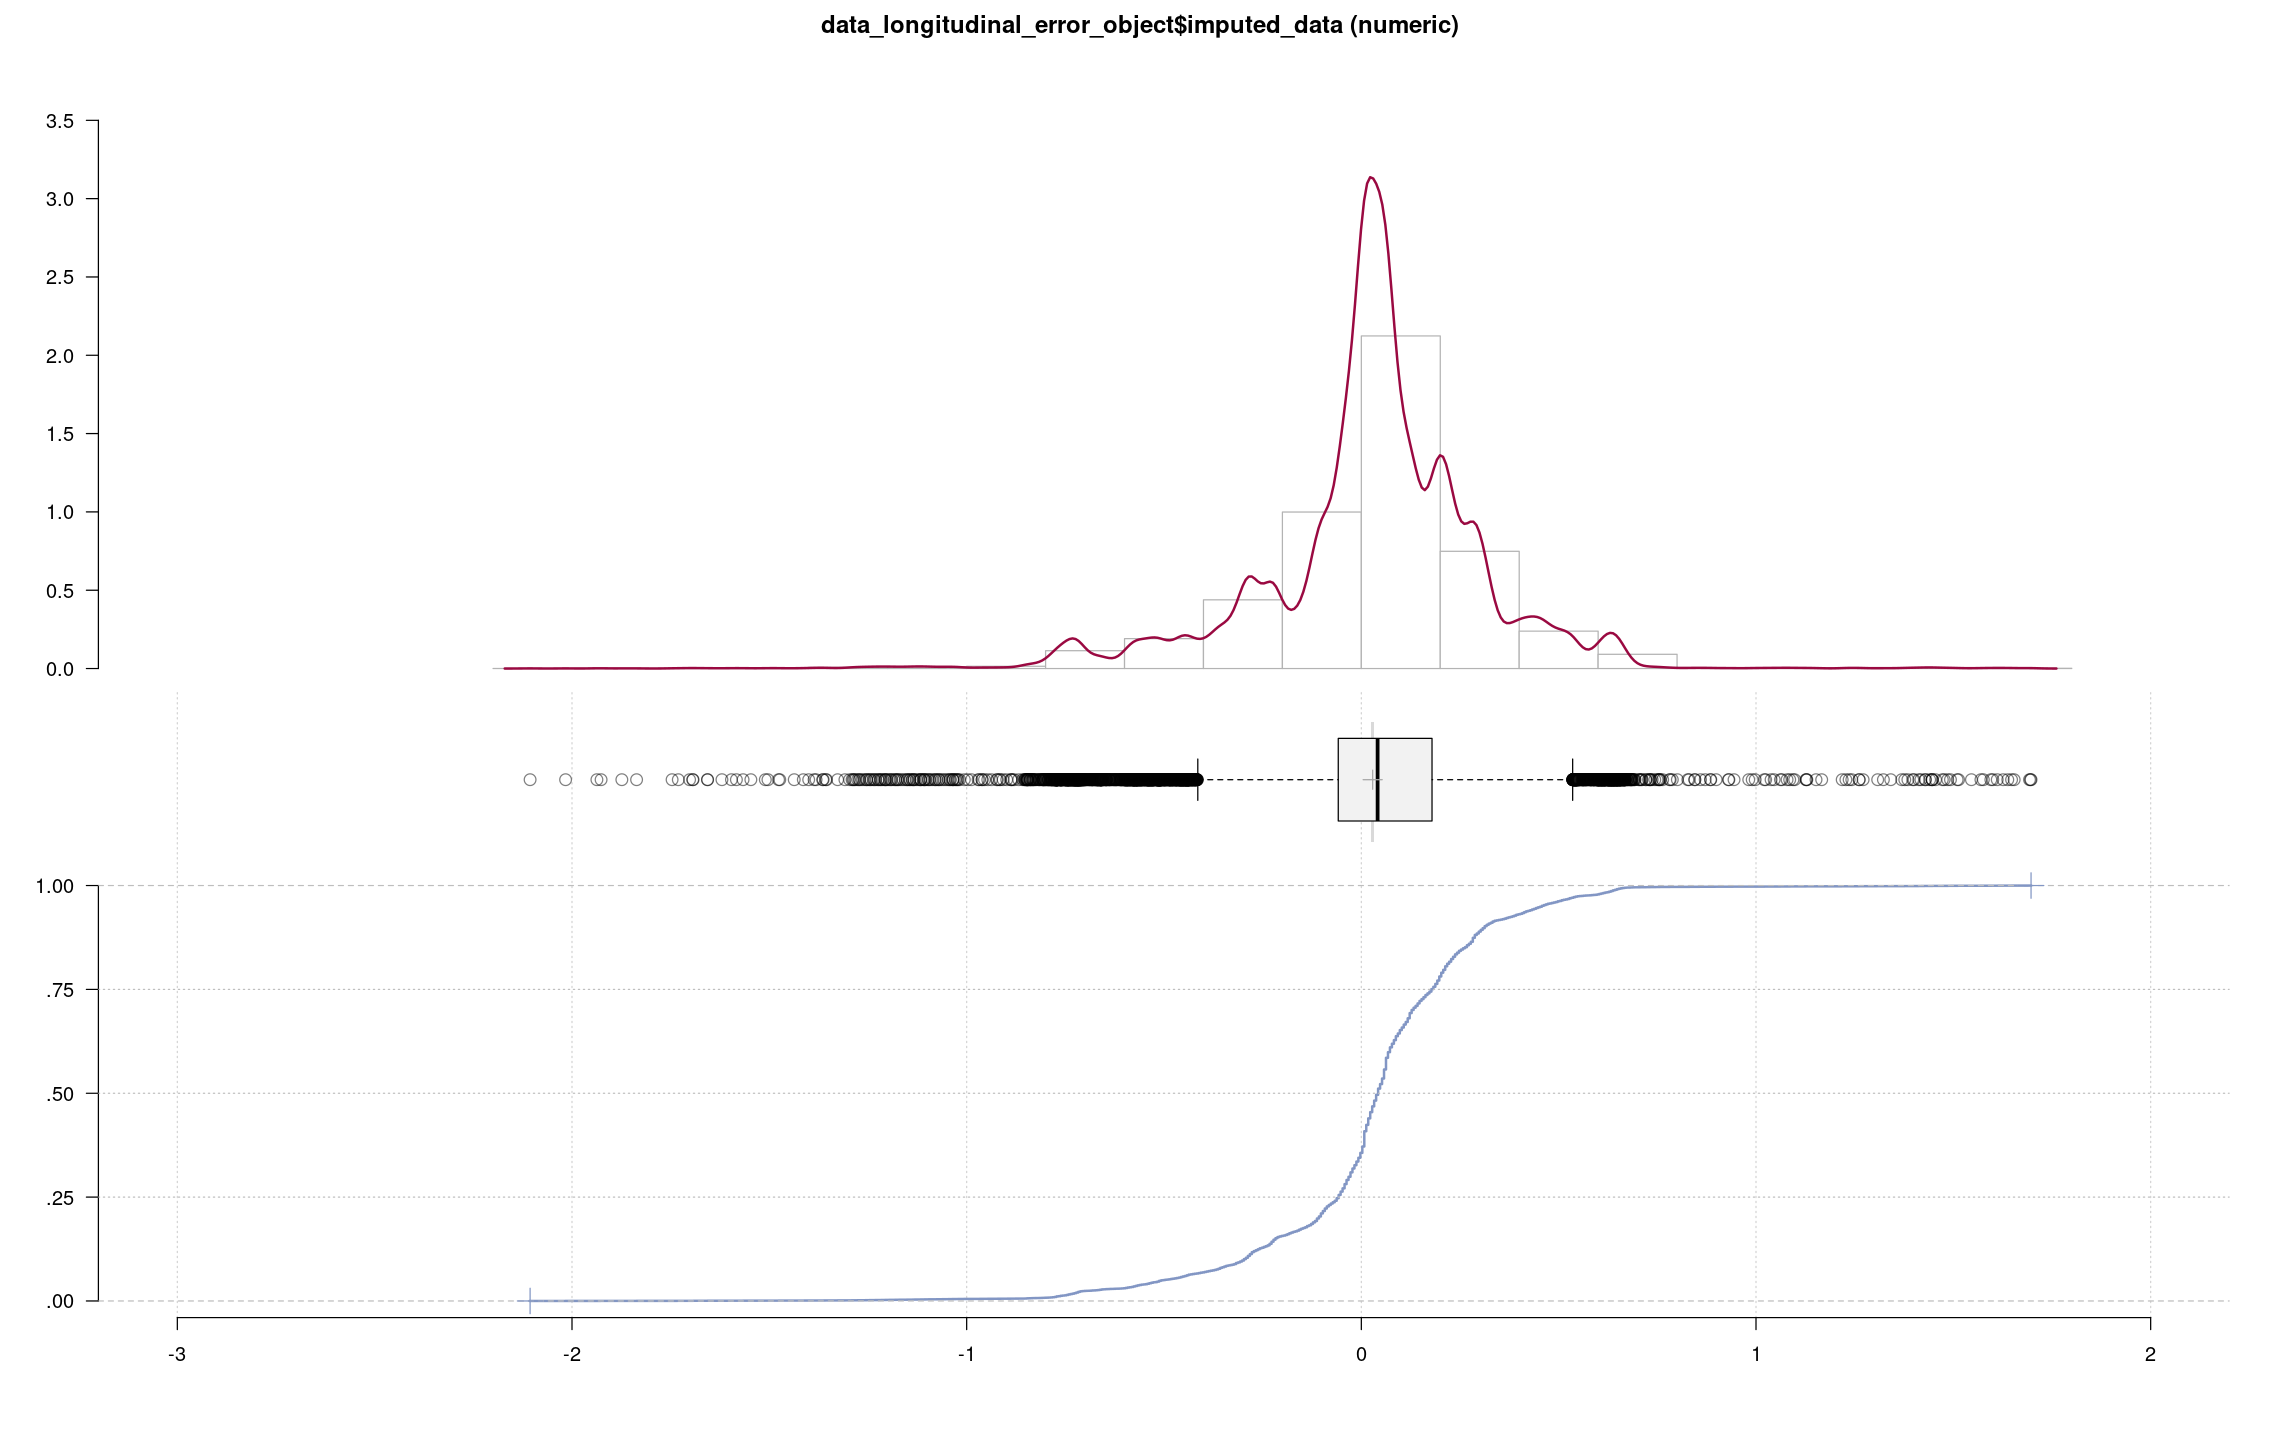

In [22]:
Desc(data_longitudinal_error_object$imputed_data)

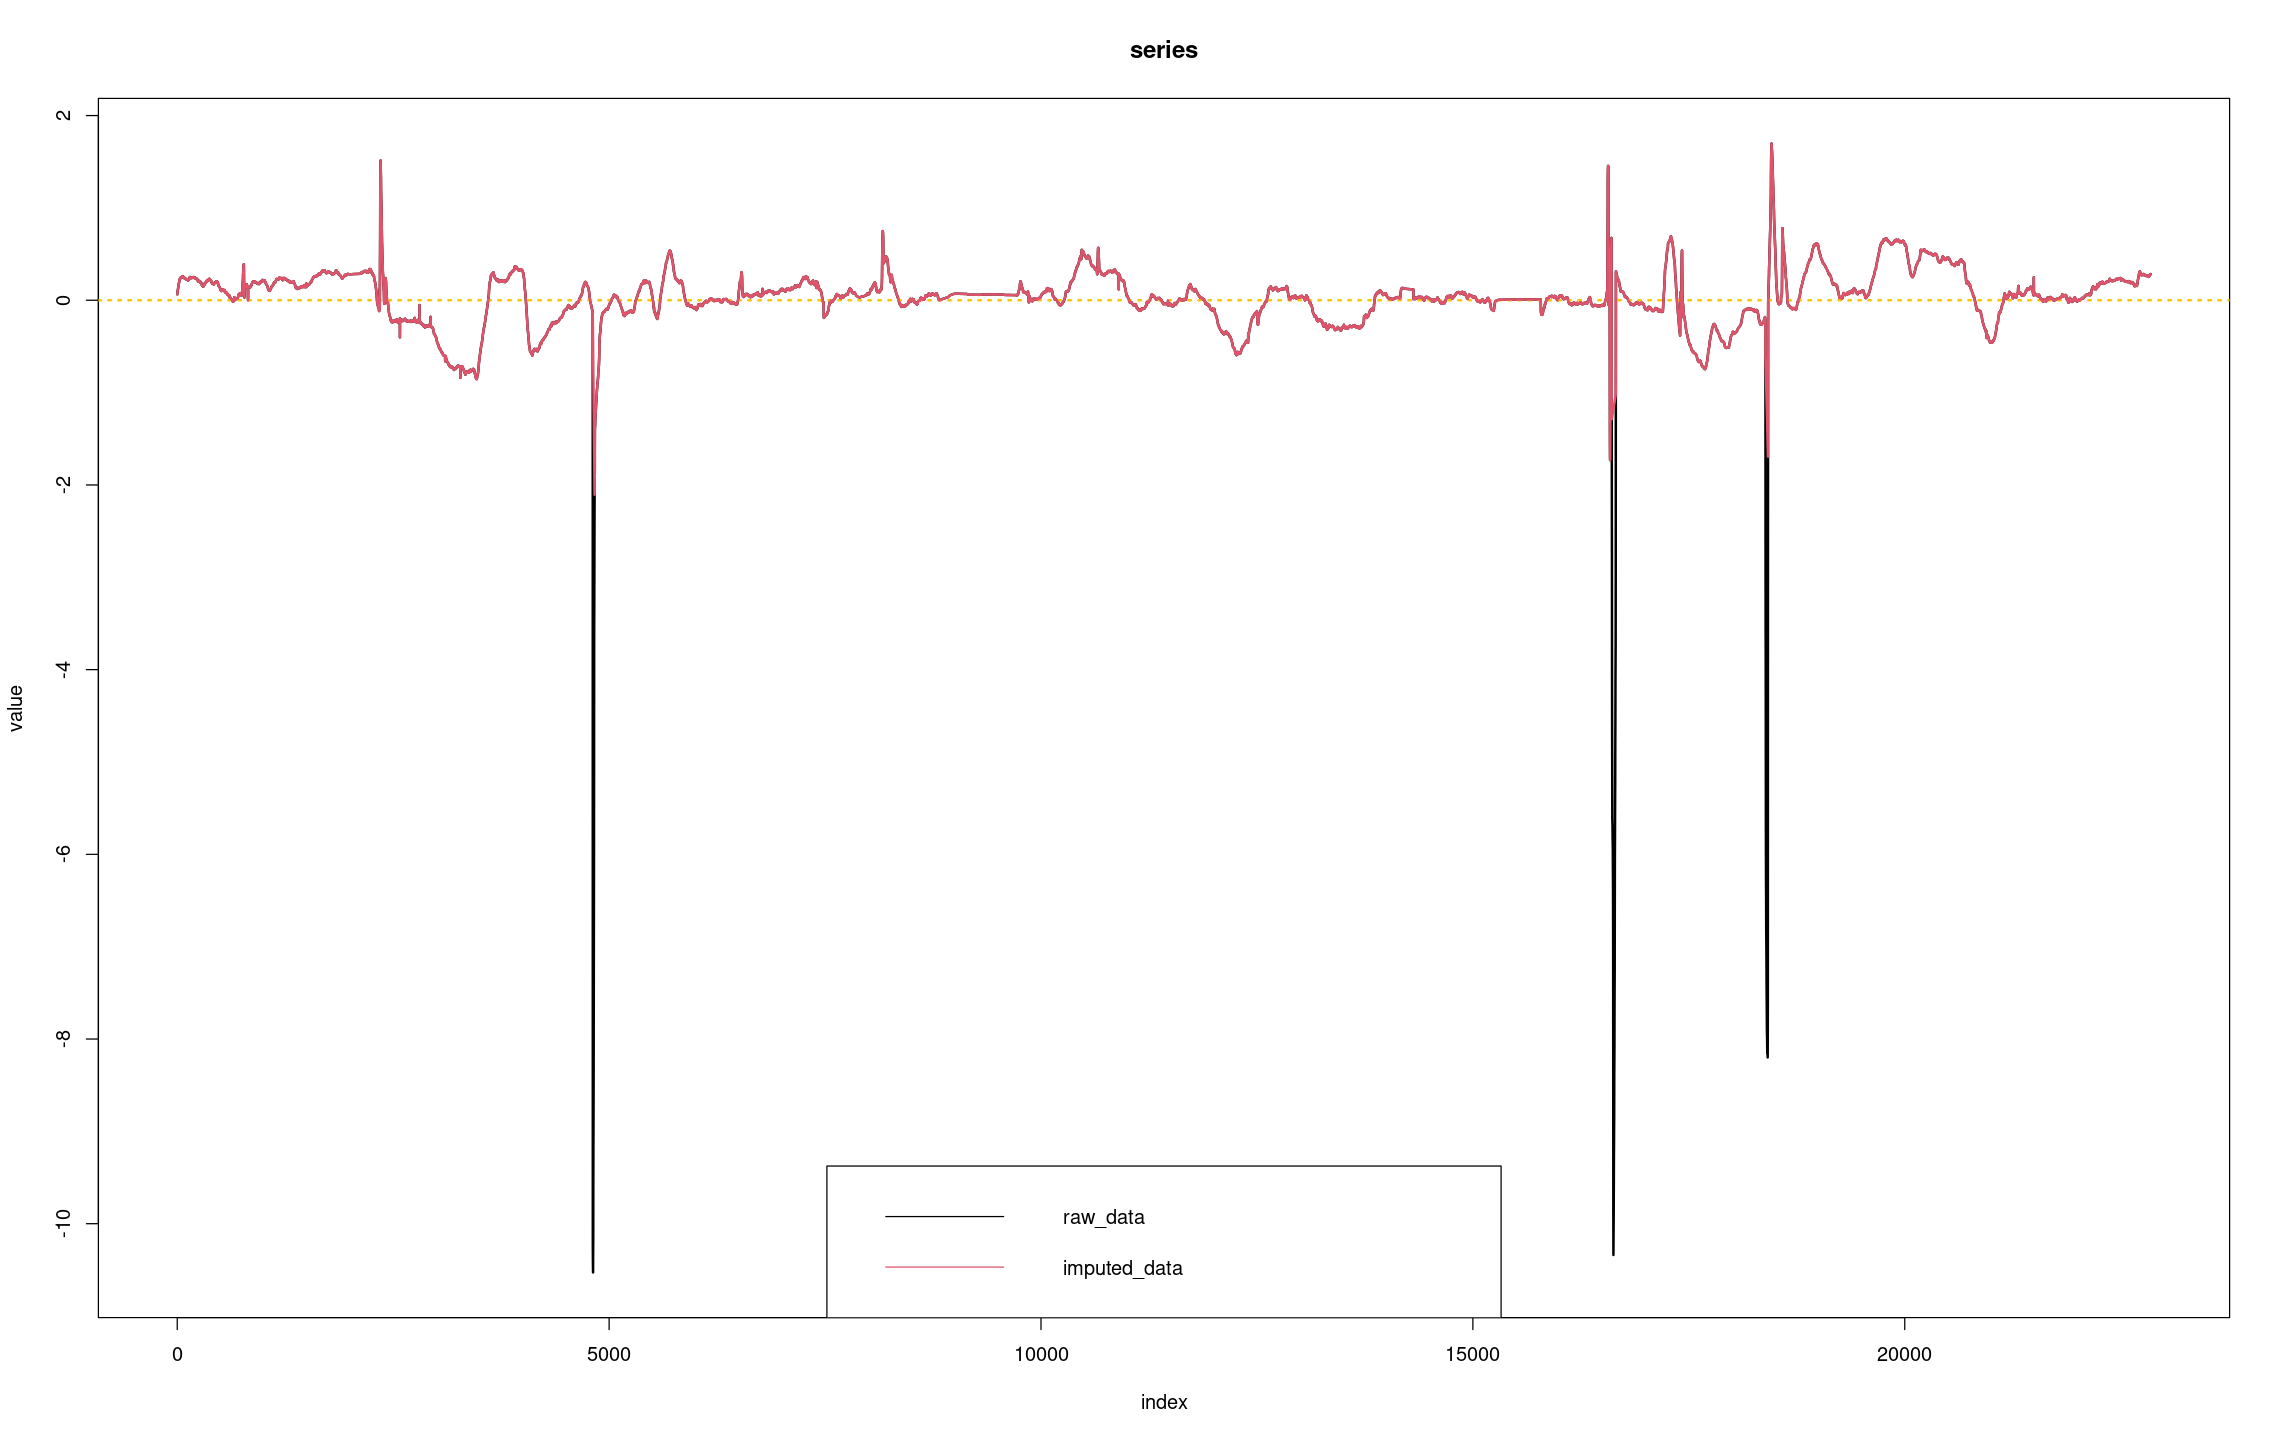

In [23]:
plot(data_longitudinal_error_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_longitudinal_error_object$imputed_data, col = 2, lwd = 2)
legend("bottom", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## haversine_error

In [24]:
data_haversine_error_object <- impute_outliers(x = data$haversine_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [25]:
print(names(data_haversine_error_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [26]:
print(data_haversine_error_object$outlier_positions)

  [1]  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359  2360  2361
 [13]  2362  2363  2364  2365  2366  2367  2368  2369  2370  2371  2372  2373
 [25]  2374  2375  2376  2377  2378  2379  2380  2381  2382  2383  2384  2385
 [37]  2386  2387  2388  2389  4811  4812  4813  4814  4815  4816  4817  4818
 [49]  4819  4820  4821  4822  4823  4824  4825  4826  4827  4828  4829  4830
 [61] 16606 16607 16608 16609 16610 16611 16612 16613 16614 16615 16616 16617
 [73] 16618 16619 16620 16621 16622 16623 16624 16625 16626 16627 16628 16629
 [85] 16630 16631 16632 16633 16634 16635 16636 16637 16638 16639 16640 16641
 [97] 16642 16643 16644 16645 16646 16647 16648 16649 16650 16651 16652 16653
[109] 16654 16655 18391 18392 18393 18394 18395 18396 18397 18398 18399 18400
[121] 18401 18402 18403 18404 18405 18406 18407 18408 18409 18410 18411 18412
[133] 18413 18414 18415 18417 18418 18419 18420 18421 18422 18423 18424 18425
[145] 18426 18427 18428 18429 18430 18431 18432 18433 18434 1843

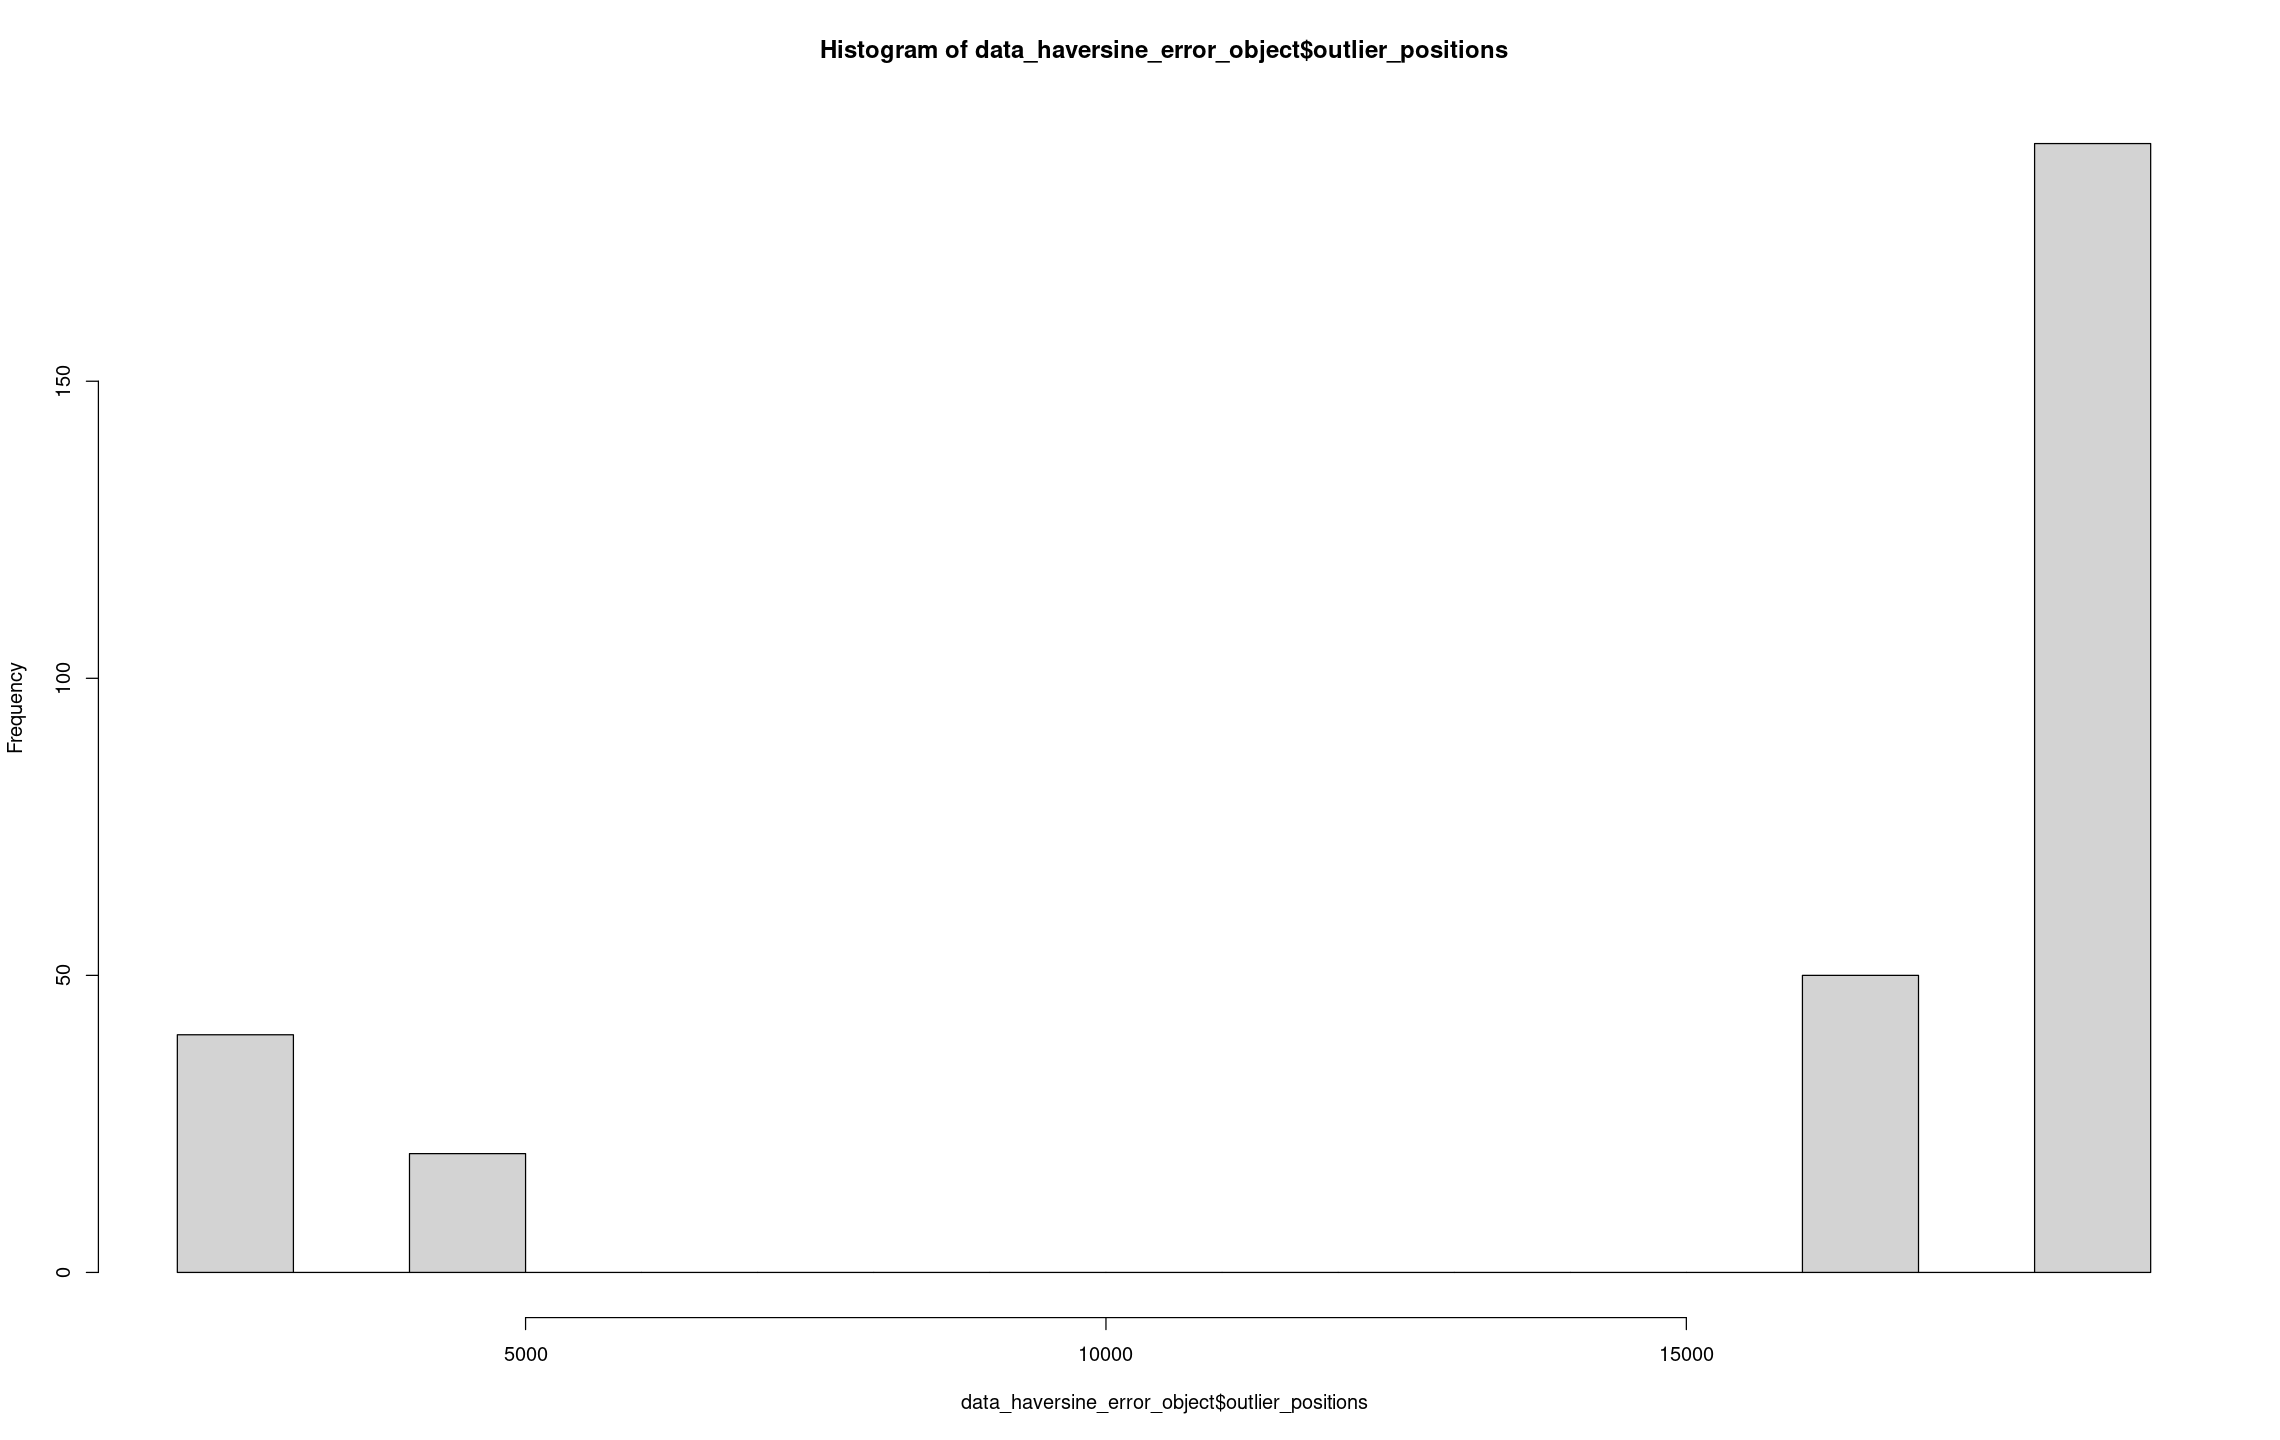

In [27]:
hist(data_haversine_error_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_haversine_error_object$imputed_data (numeric)

       length            n          NAs       unique           0s         mean'
       22'847       22'847            0       22'574            0  0.547726068
                    100.0%         0.0%                      0.0%             
                                                                              
          .05          .10          .25       median          .75          .90
  0.097783819  0.133217523  0.215461470  0.371185601  0.737071246  1.024090862
                                                                              
        range           sd        vcoef          mad          IQR         skew
  5.411560112  0.598098511  1.091966488  0.316389942  0.521609776  4.483500310
                                                                              
        meanCI
   0.539970221
   0.555481915
              
           .95
  

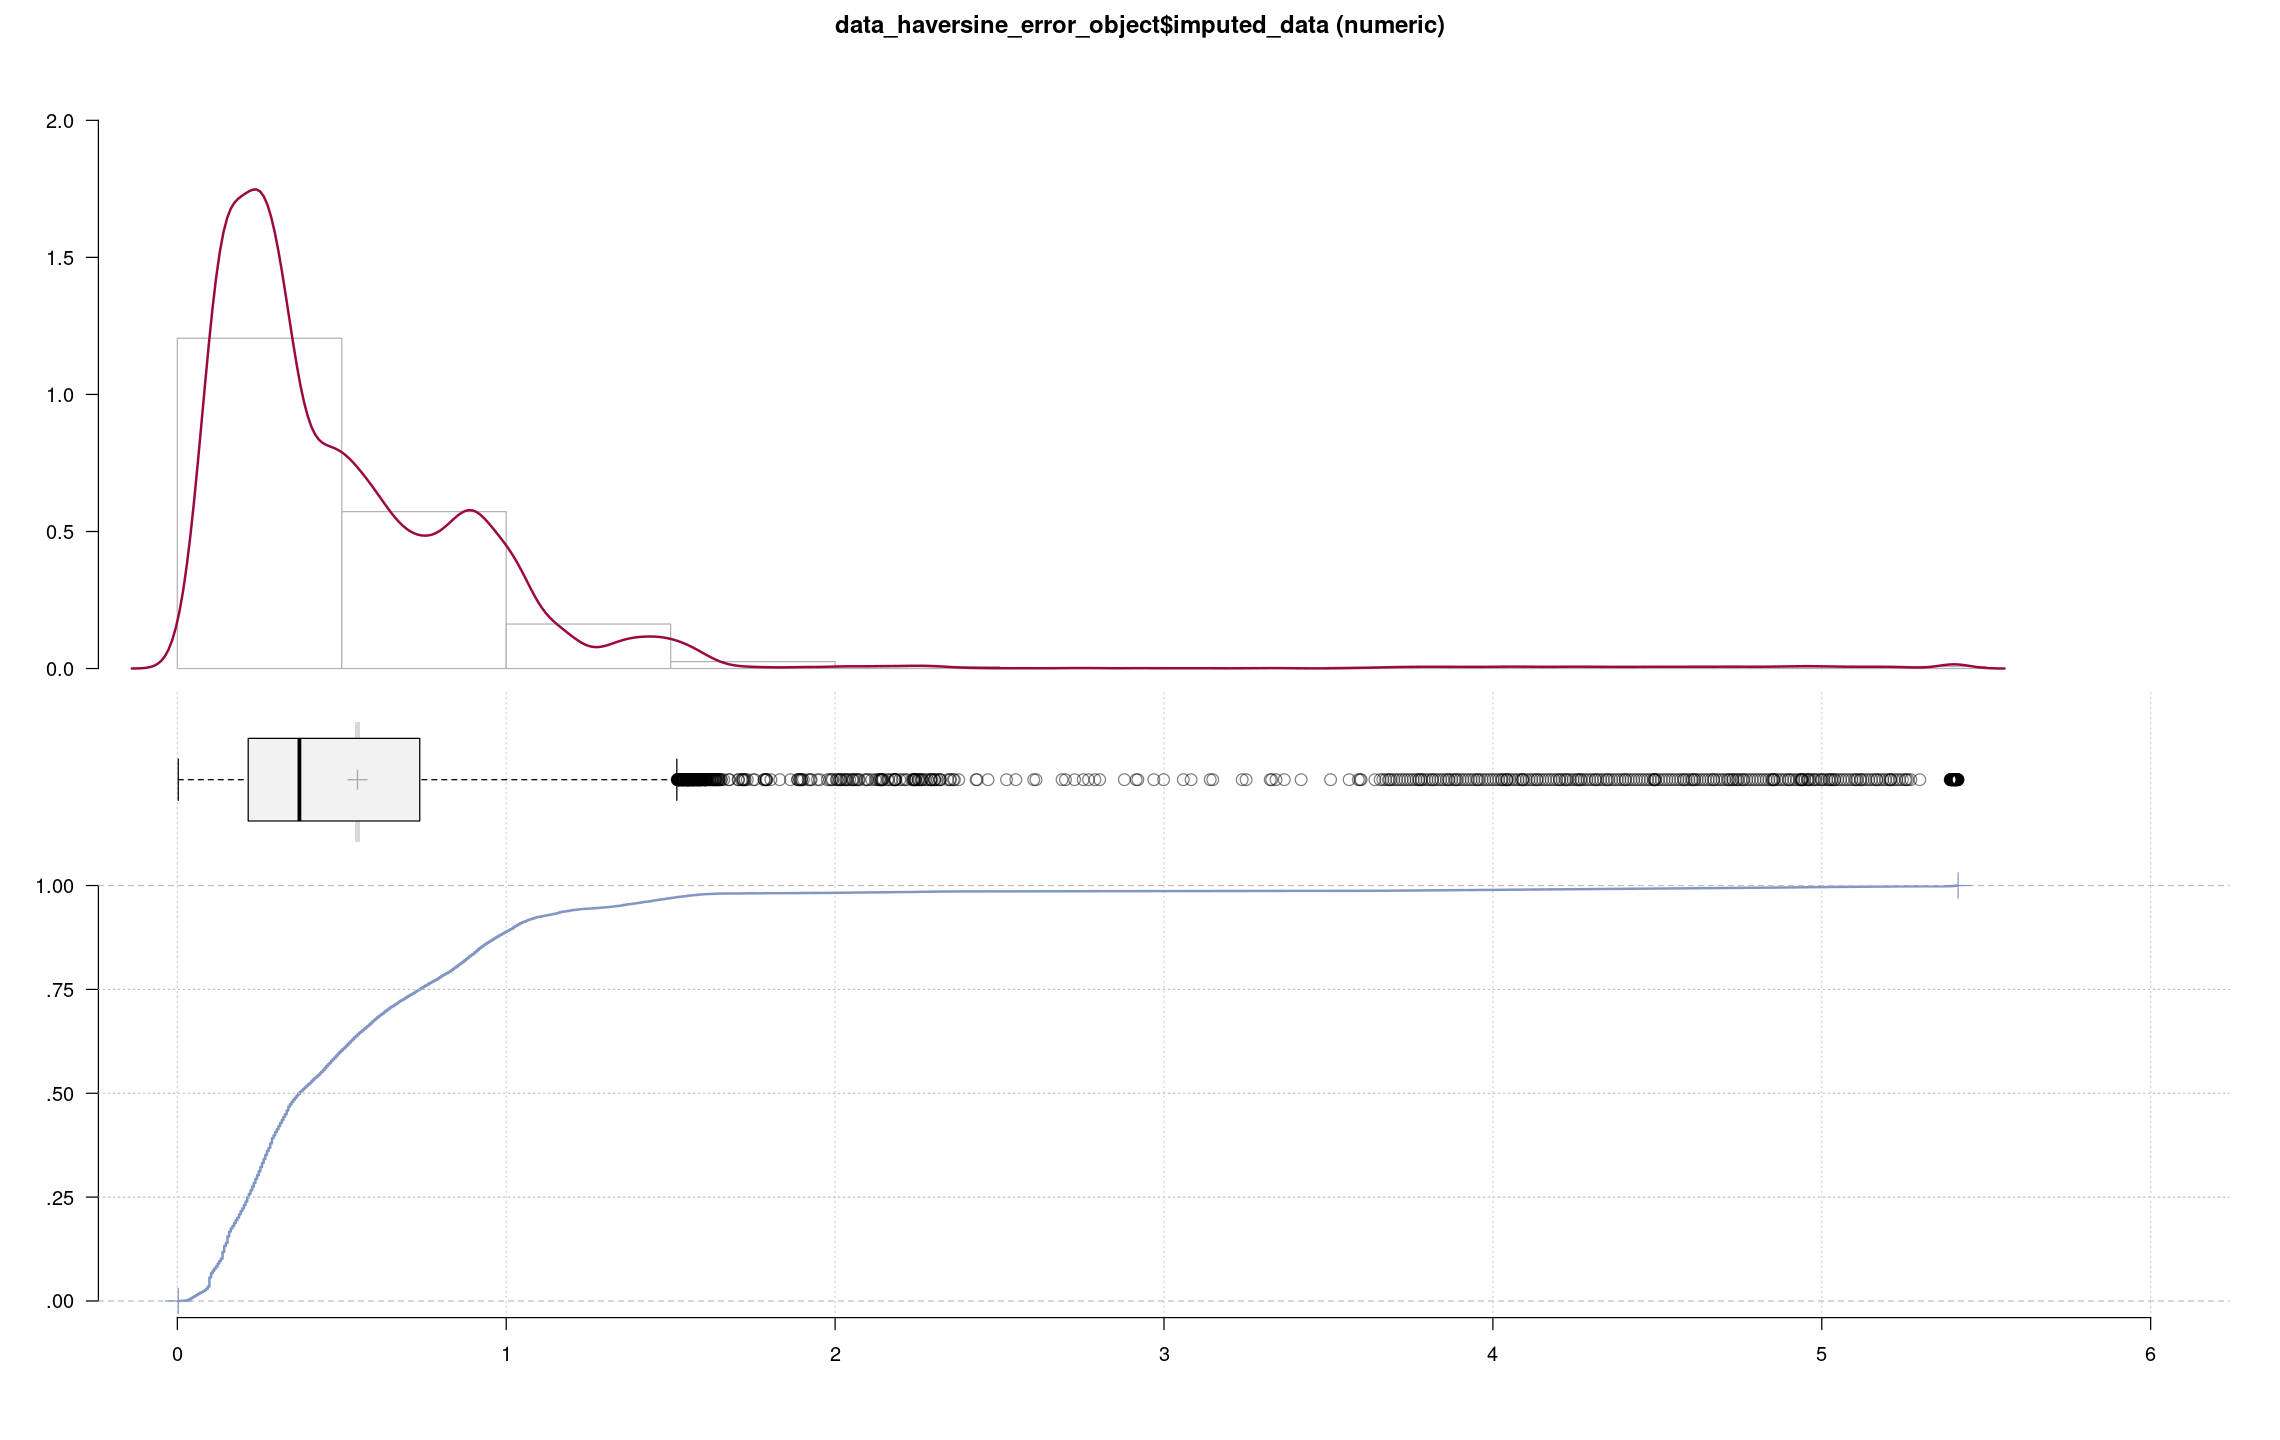

In [28]:
Desc(data_haversine_error_object$imputed_data)

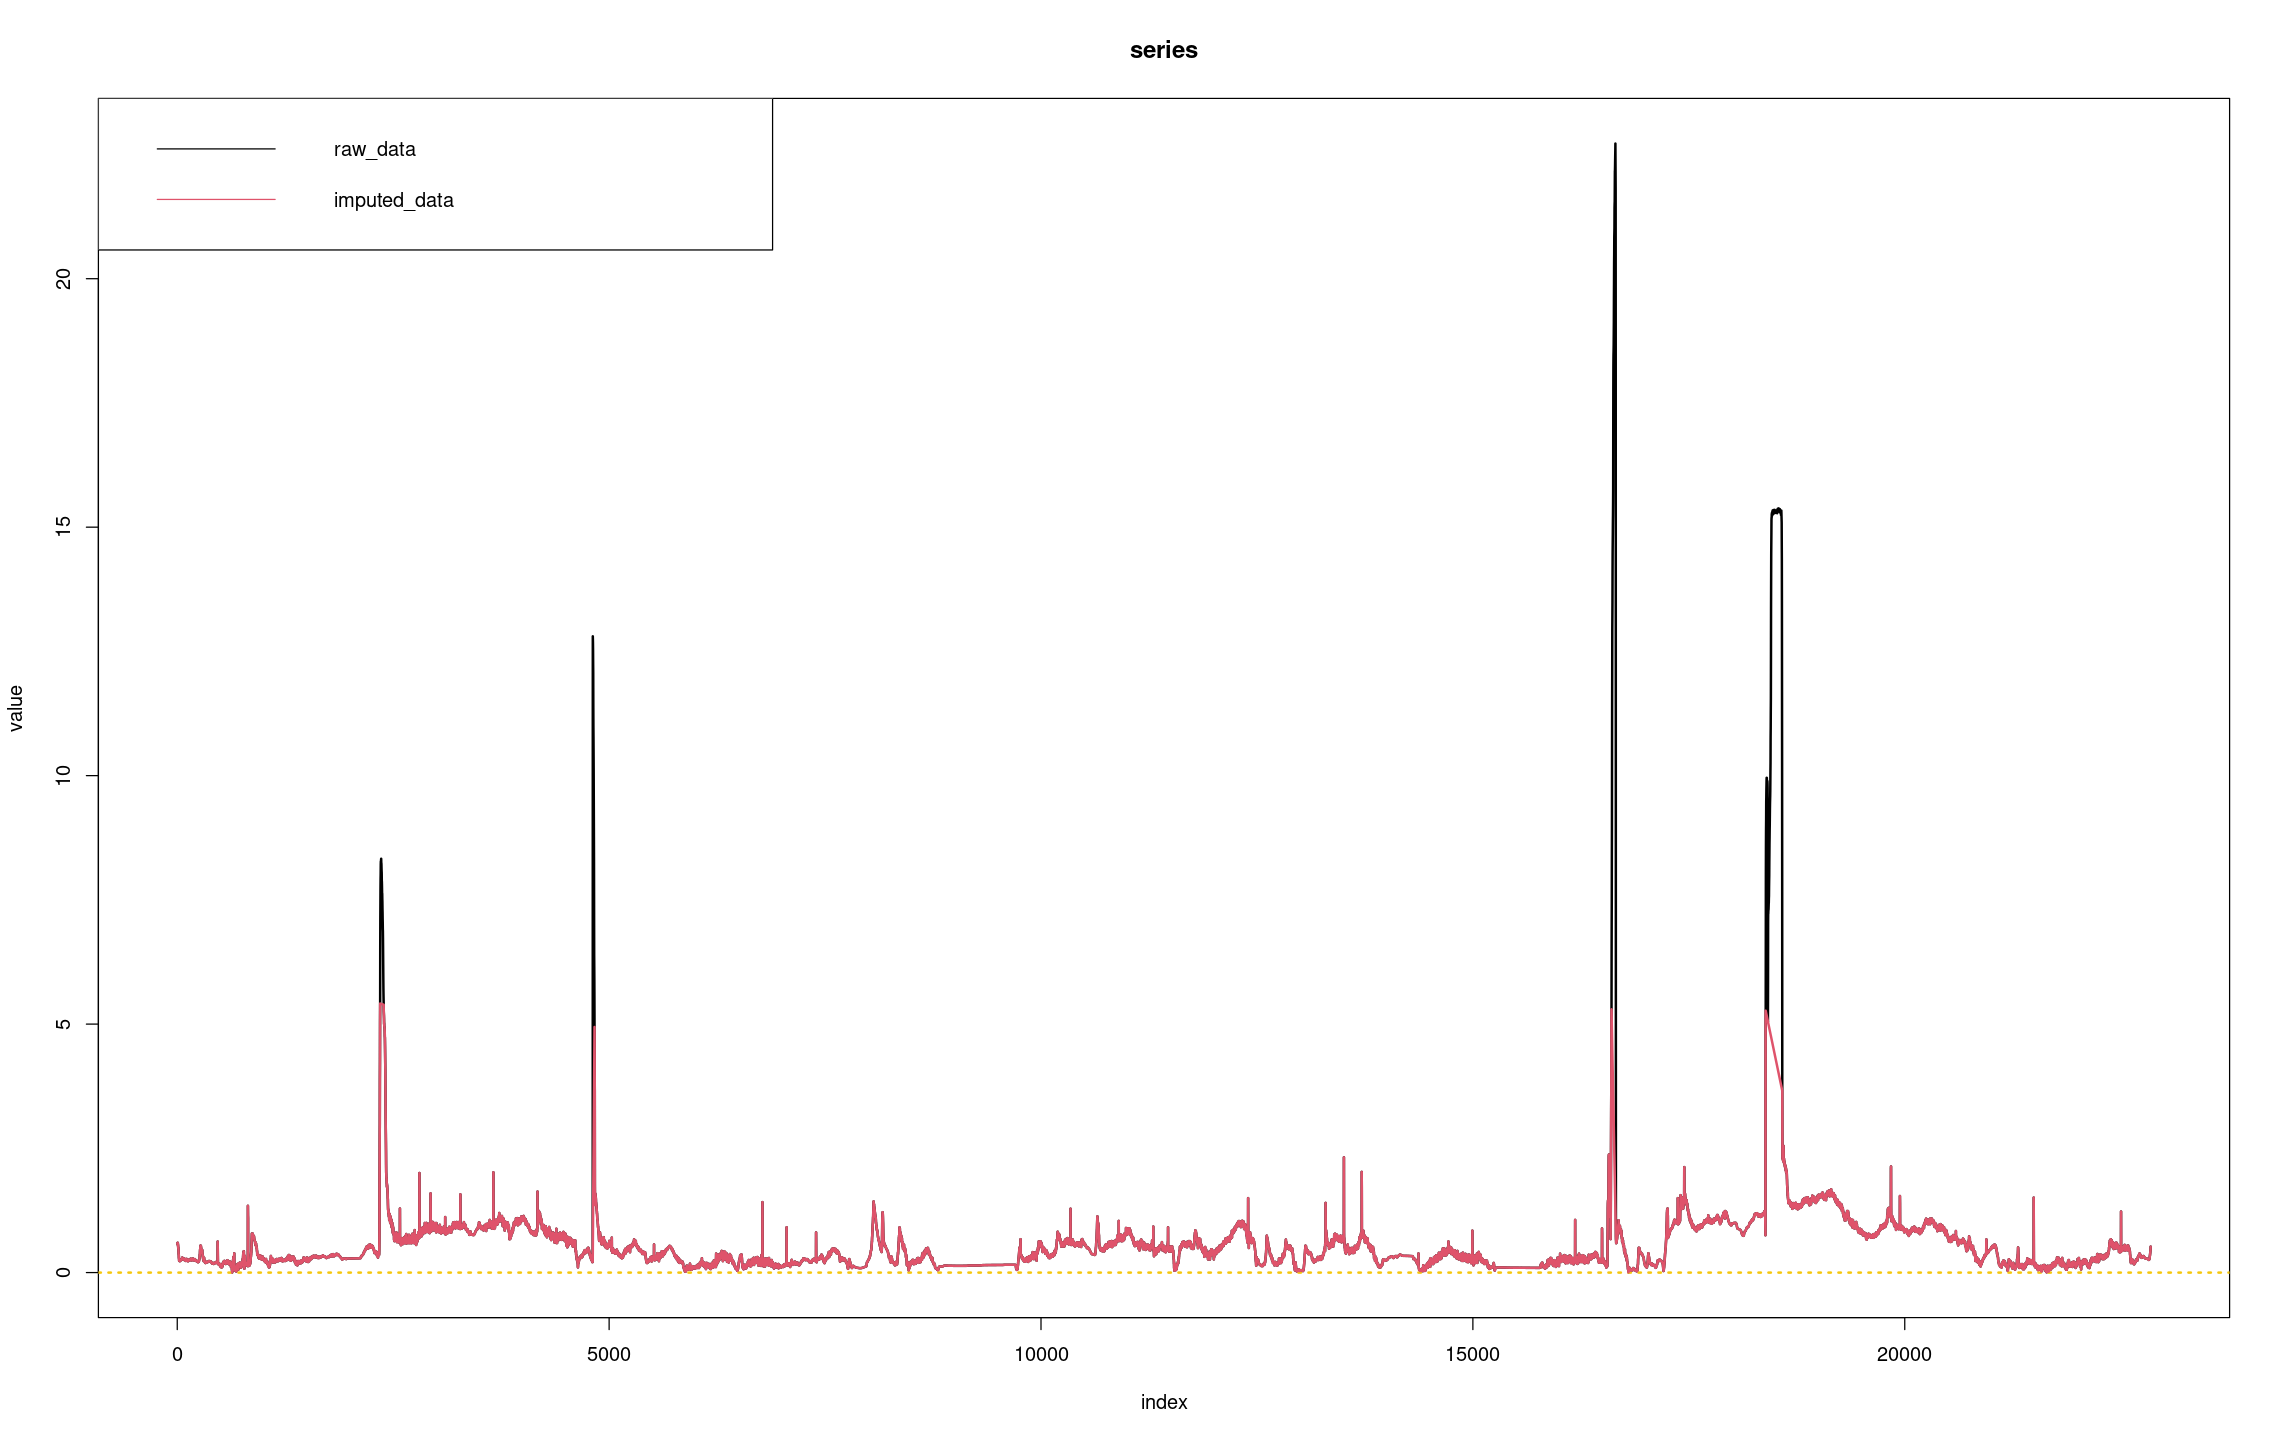

In [29]:
plot(data_haversine_error_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_haversine_error_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## lateral_error_abs

In [30]:
data_lateral_error_abs_object <- impute_outliers(x = data$lateral_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [31]:
print(names(data_lateral_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [32]:
print(data_lateral_error_abs_object$outlier_positions)

  [1]  2348  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359
 [13]  2360  2361  2362  2363  2364  2365  2366  2367  2368  2369  2370  2371
 [25]  2372  2373  2374  2375  2376  2377  2378  2379  2380  2381  2382  2383
 [37]  2384  2385  2386  2387  2388  2389  2390  2391  2392  2393  2394  2395
 [49]  2396  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820  4821
 [61]  4822  4823  4824  4825  4826  4827  4828  4829 16605 16606 16607 16608
 [73] 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619 16620
 [85] 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631 16632
 [97] 16633 16634 16635 16636 16637 16638 16639 16640 16641 16642 16643 16644
[109] 16645 16646 16647 16648 16649 16650 16651 16652 16653 16654 16655 18392
[121] 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404
[133] 18405 18406 18407 18408 18409 18410 18411 18412 18417 18418 18419 18420
[145] 18421 18422 18423 18424 18425 18426 18427 18428 18429 1843

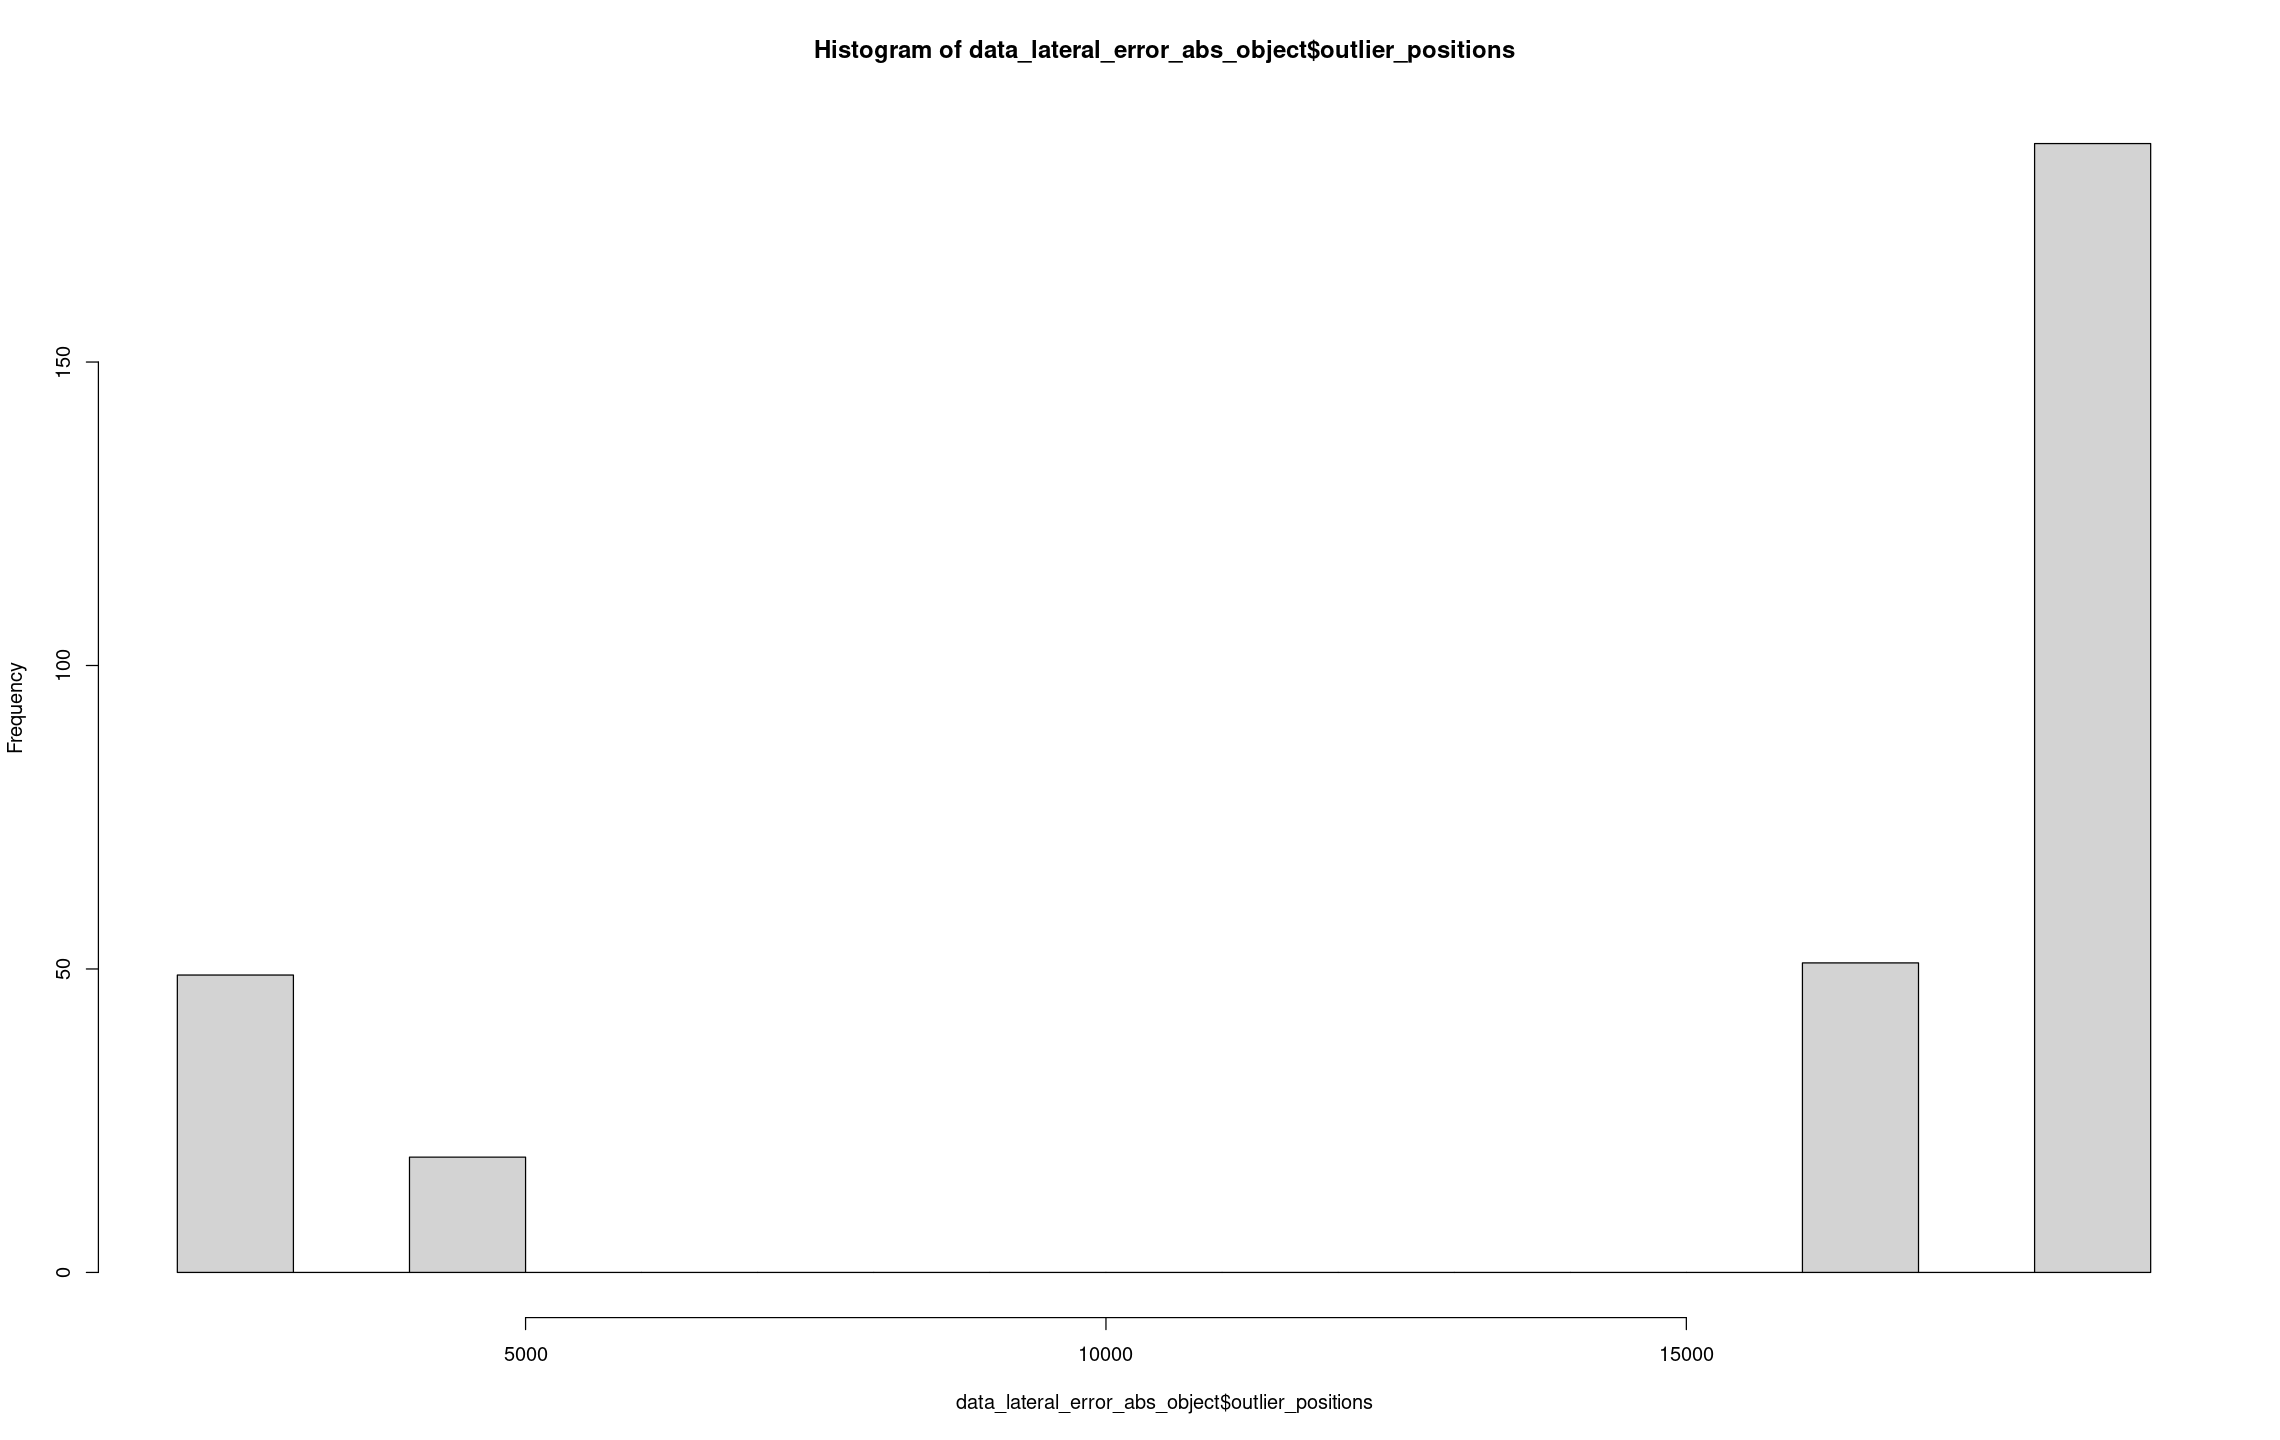

In [33]:
hist(data_lateral_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_lateral_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        22'847        22'847             0        22'581             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0481907140  0.0872328416  0.1457234174  0.3255223632  0.6312972605
                                                                      
         range            sd         vcoef           mad           IQR
  4.9767084120  0.5421689620  1.1428336973  0.3094048472  0.4855738431
                                                                      
          mean         meanCI
  0.4744075742   0.4673769941
                 0.4814381543
                             
           .90            .95
  0.9

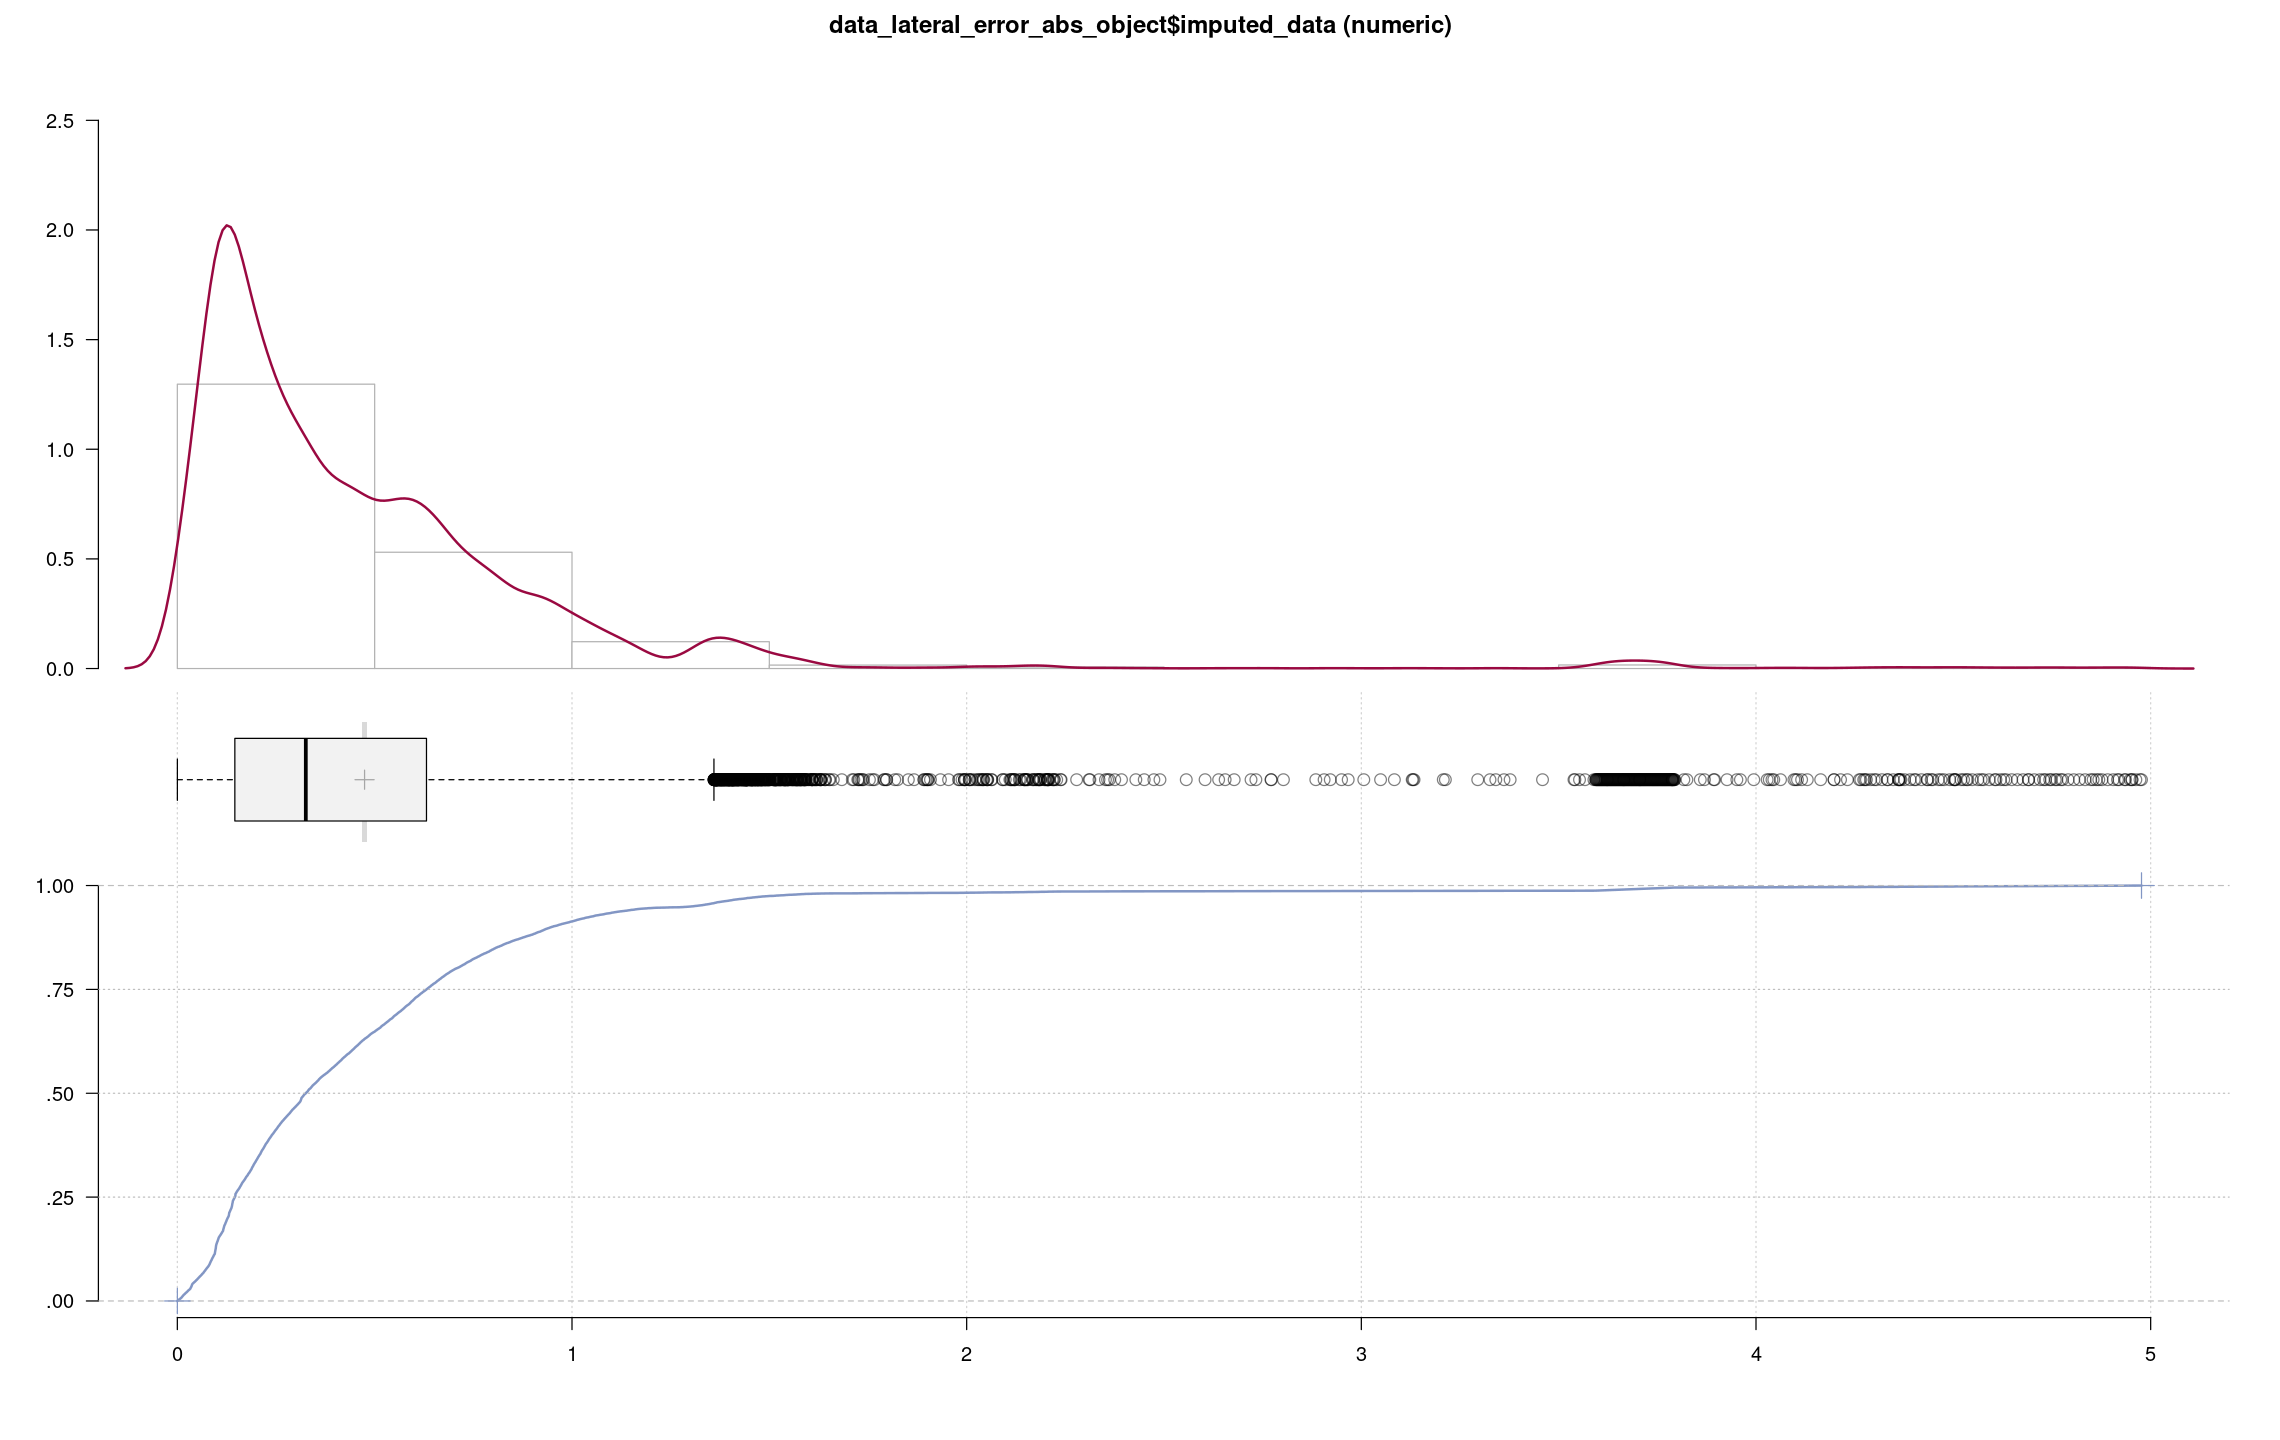

In [34]:
Desc(data_lateral_error_abs_object$imputed_data)

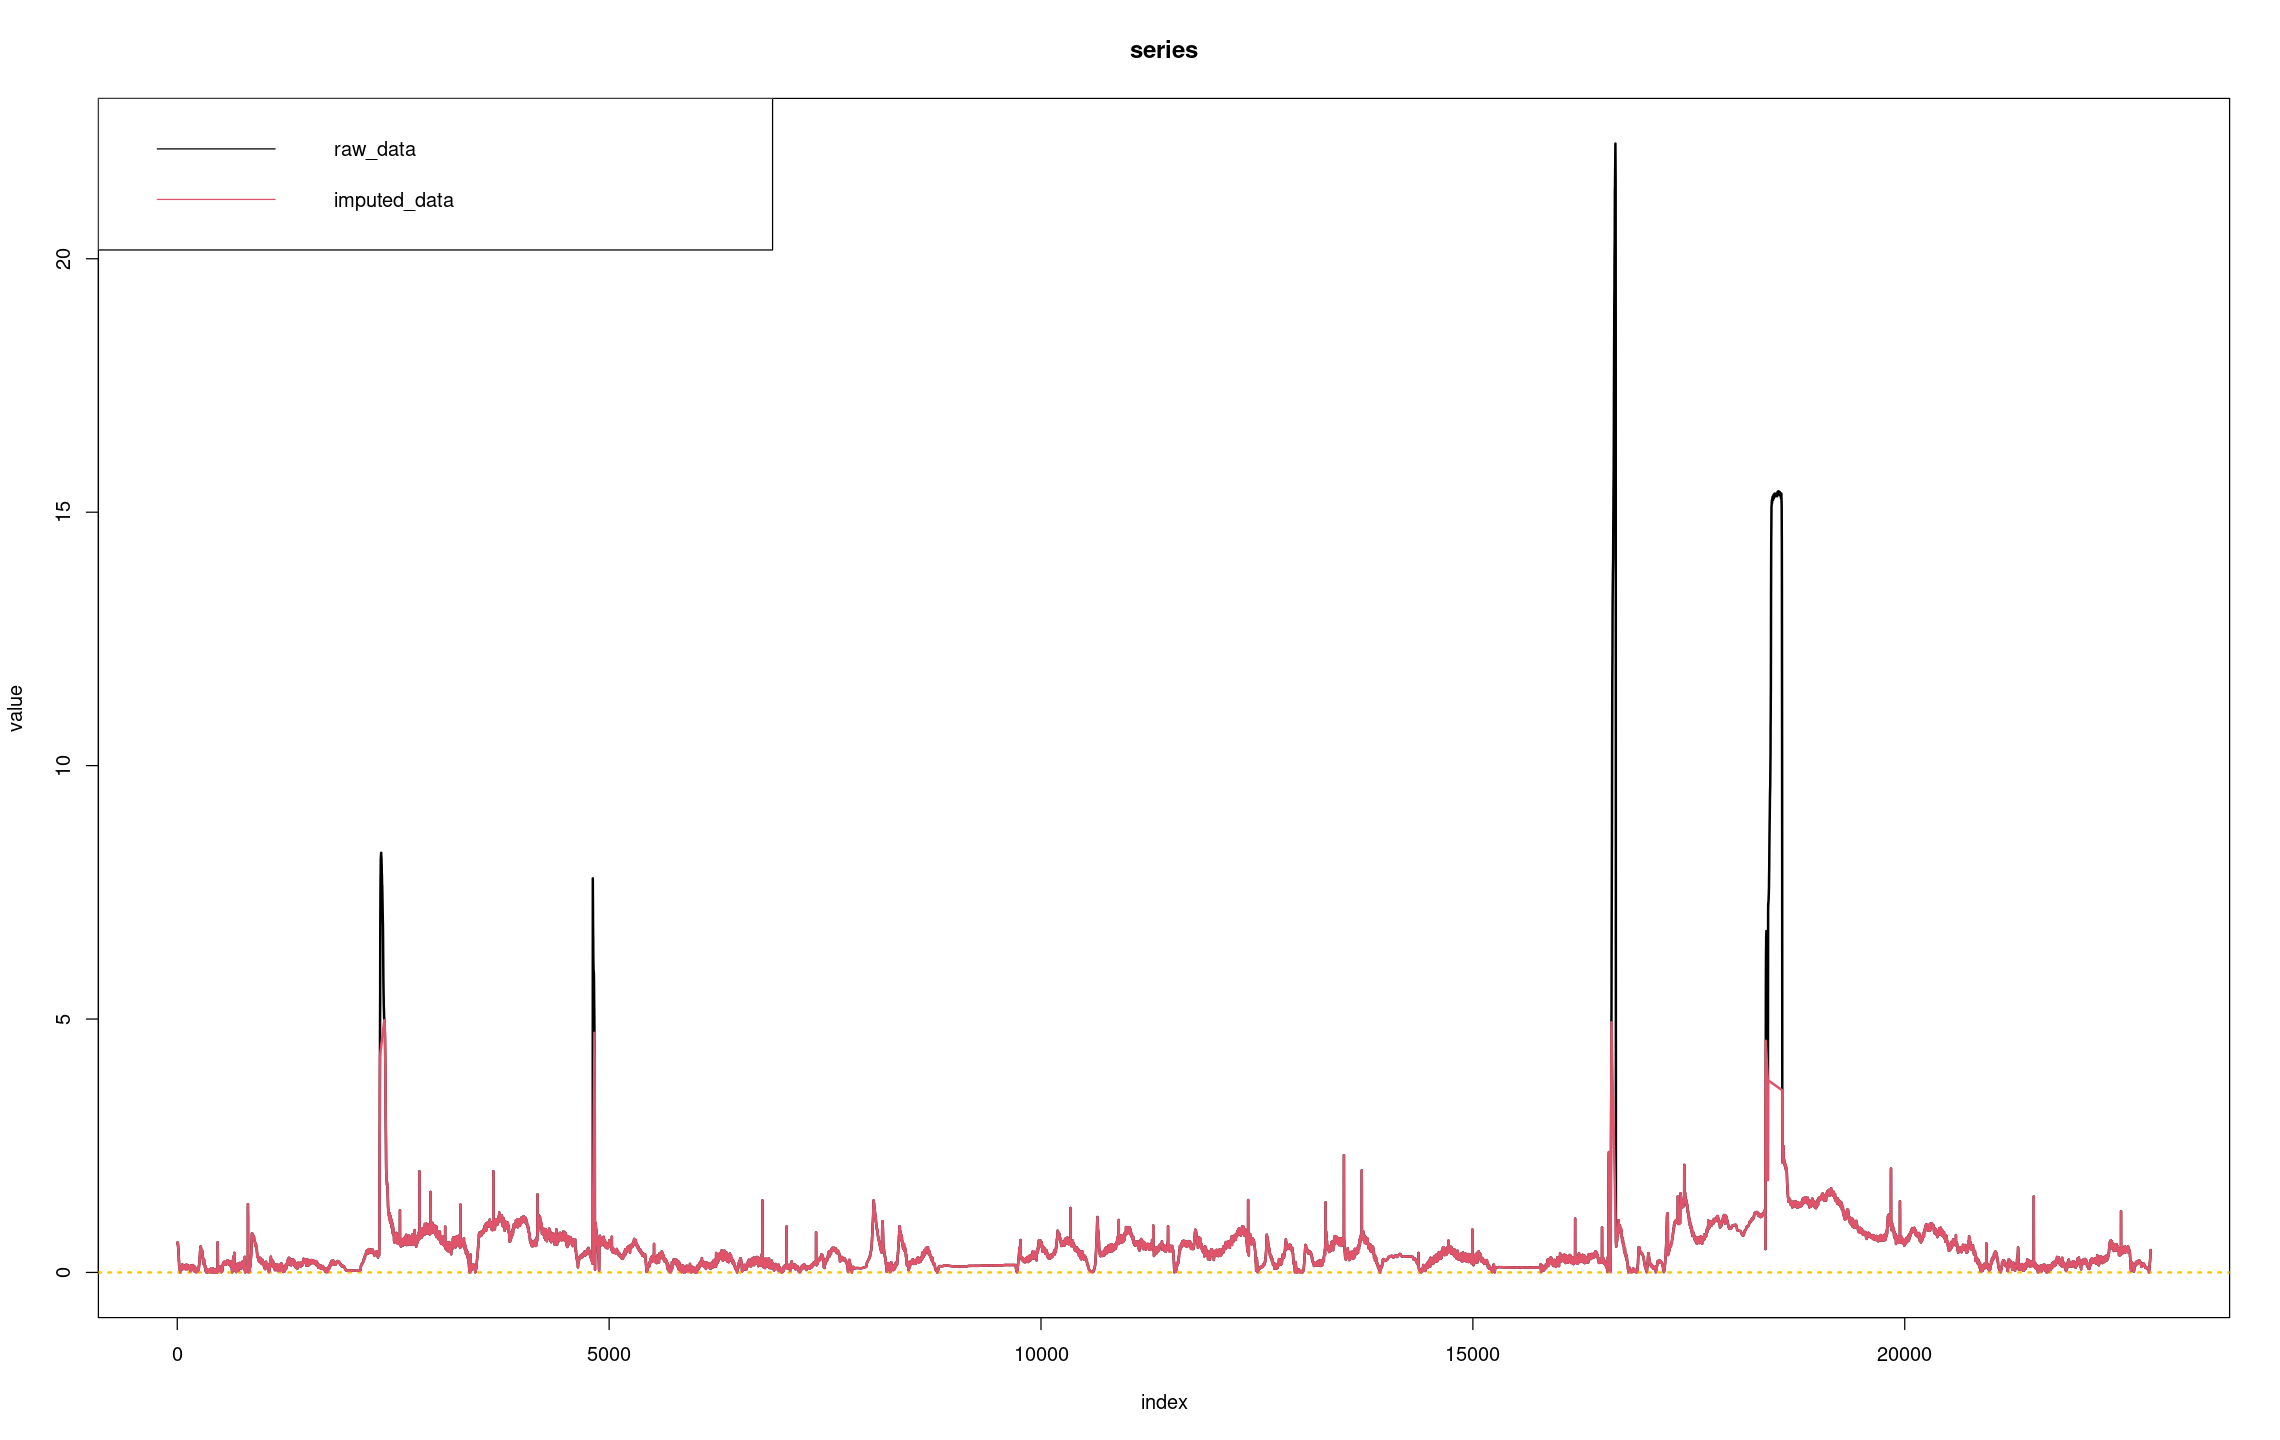

In [35]:
plot(data_lateral_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_lateral_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## longitudinal_error_abs

In [36]:
data_longitudinal_error_abs_object <- impute_outliers(x = data$longitudinal_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [37]:
print(names(data_longitudinal_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [38]:
print(data_longitudinal_error_abs_object$outlier_positions)

 [1]  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820  4821  4822
[13]  4823  4824  4825  4826  4827  4828  4829  4830 16610 16611 16612 16613
[25] 16614 16615 16616 16617 16618 16619 16620 16621 16622 16623 16624 16625
[37] 16626 16627 16628 16629 16630 16631 16632 16633 16634 16635 16636 16637
[49] 16638 16639 16640 16641 16642 16643 16644 16645 16646 16647 16648 16649
[61] 16650 16651 16652 16653 16654 18388 18389 18390 18391 18392 18393 18394
[73] 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404 18405 18406
[85] 18407 18408 18409 18410 18411 18412 18413 18414 18415 18416


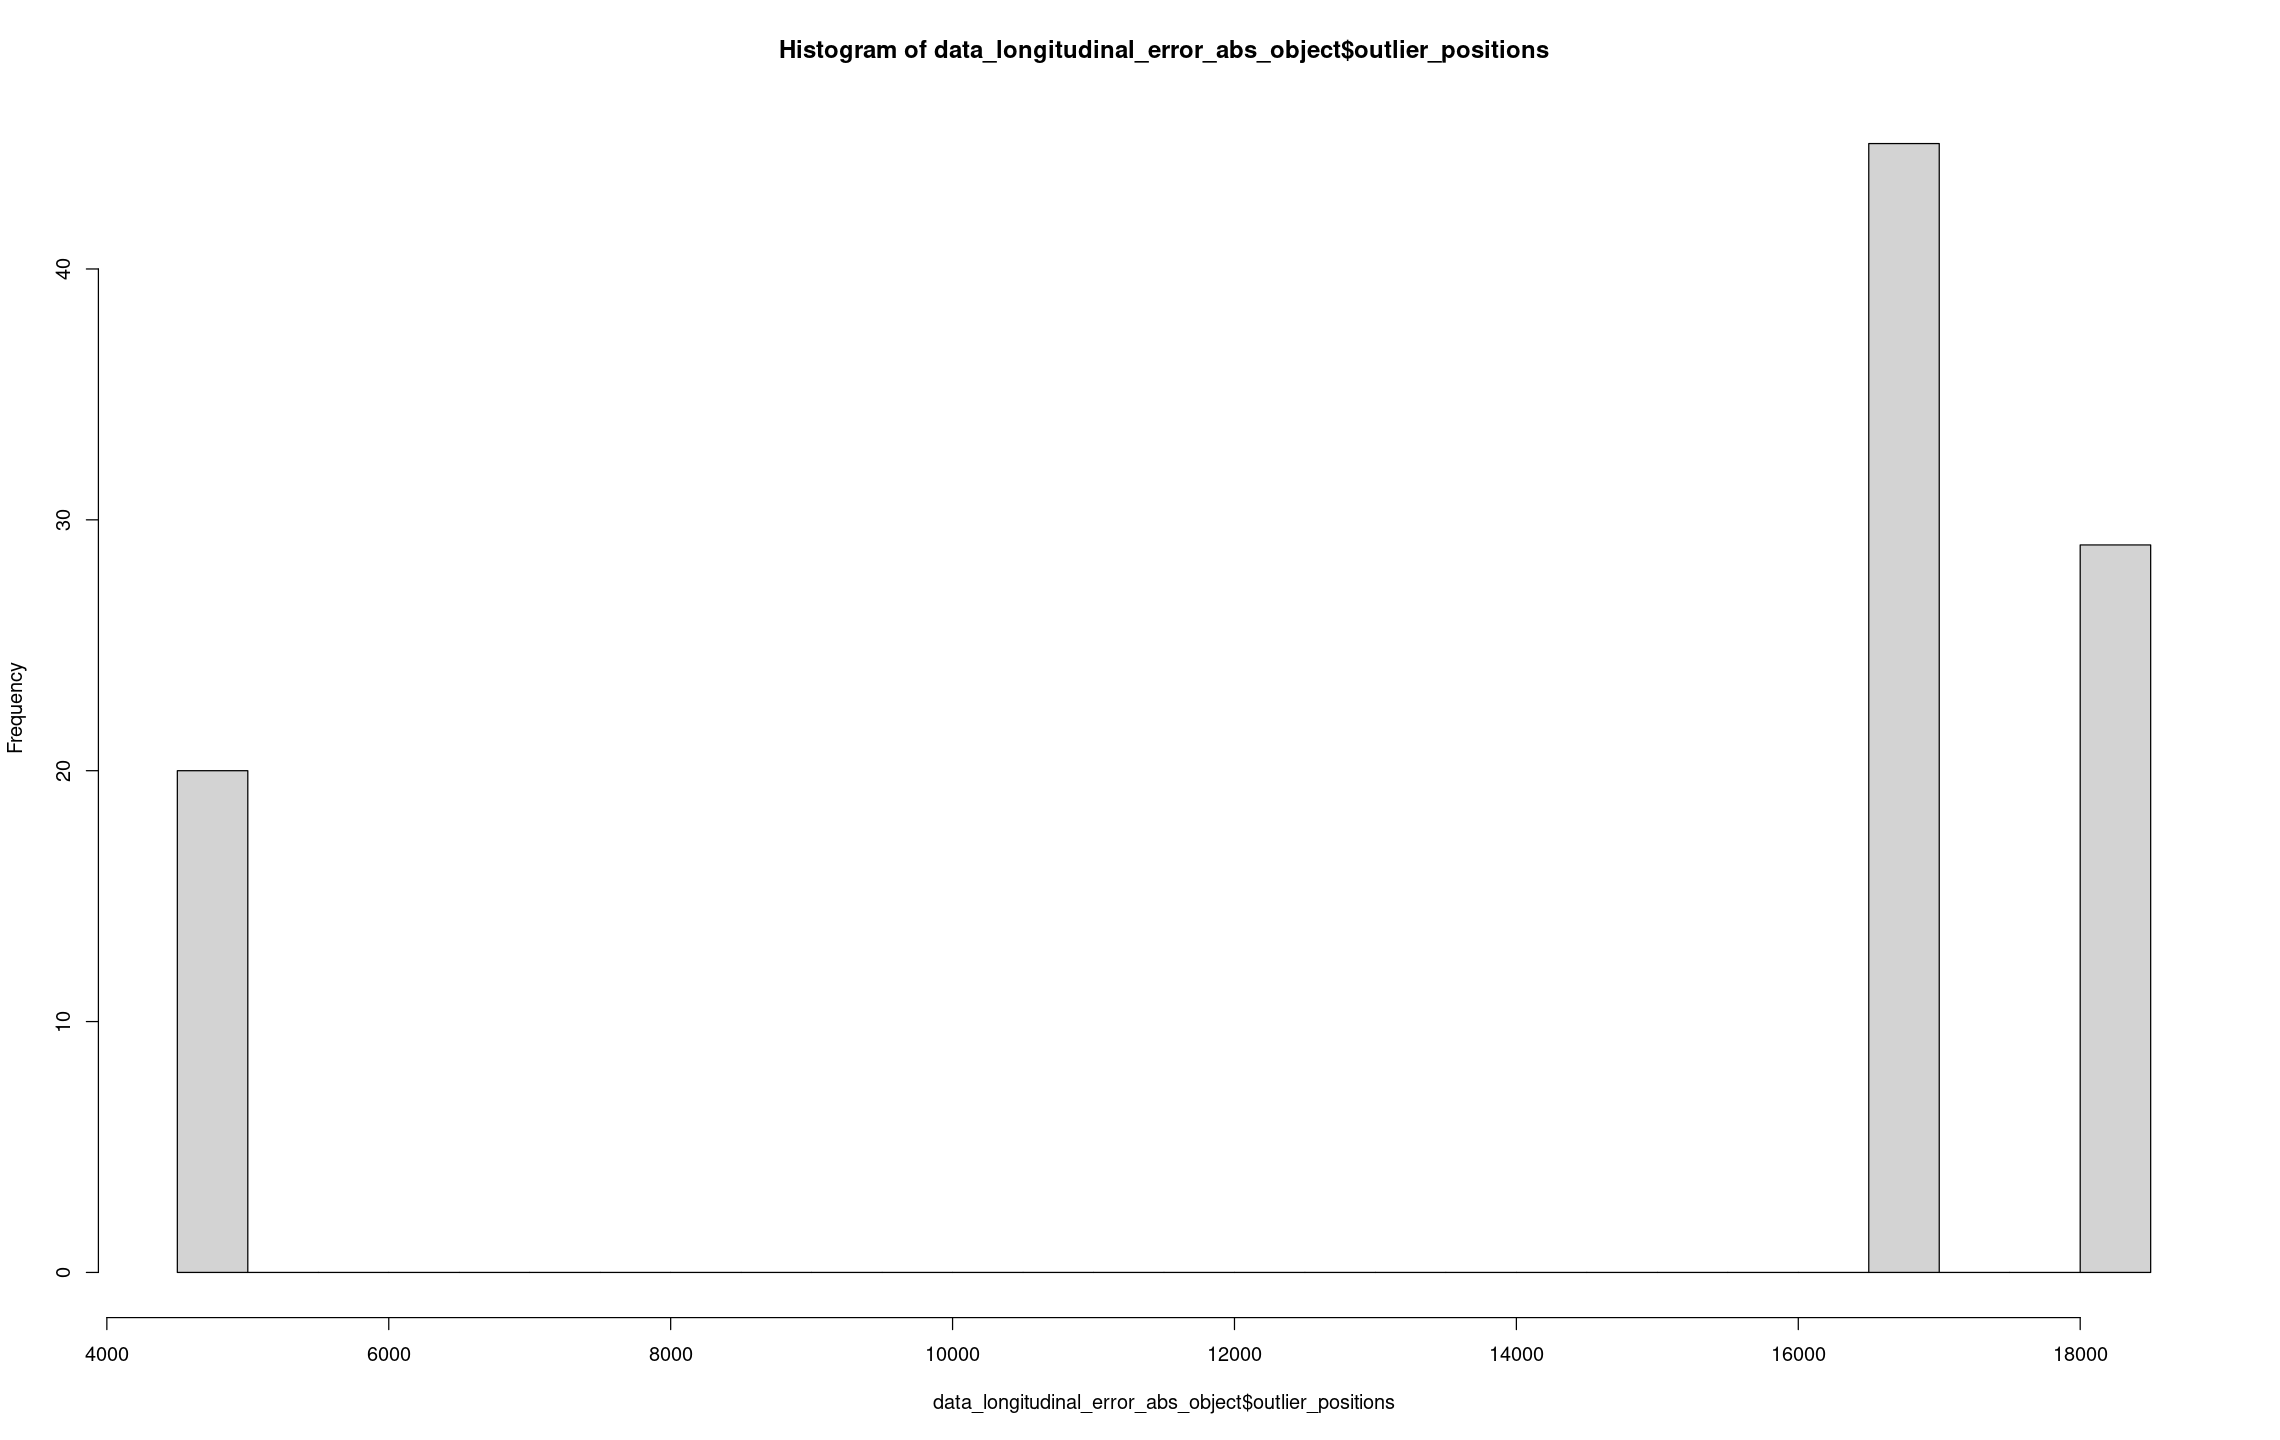

In [39]:
hist(data_longitudinal_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_longitudinal_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        22'847        22'847             0        22'577             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0074603134  0.0154925453  0.0475802422  0.1227819473  0.2790789753
                                                                      
         range            sd         vcoef           mad           IQR
  2.3340343712  0.2128492393  1.0922352690  0.1407655986  0.2314987332
                                                                      
          mean         meanCI
  0.1948749005   0.1921147763
                 0.1976350246
                             
           .90            .95


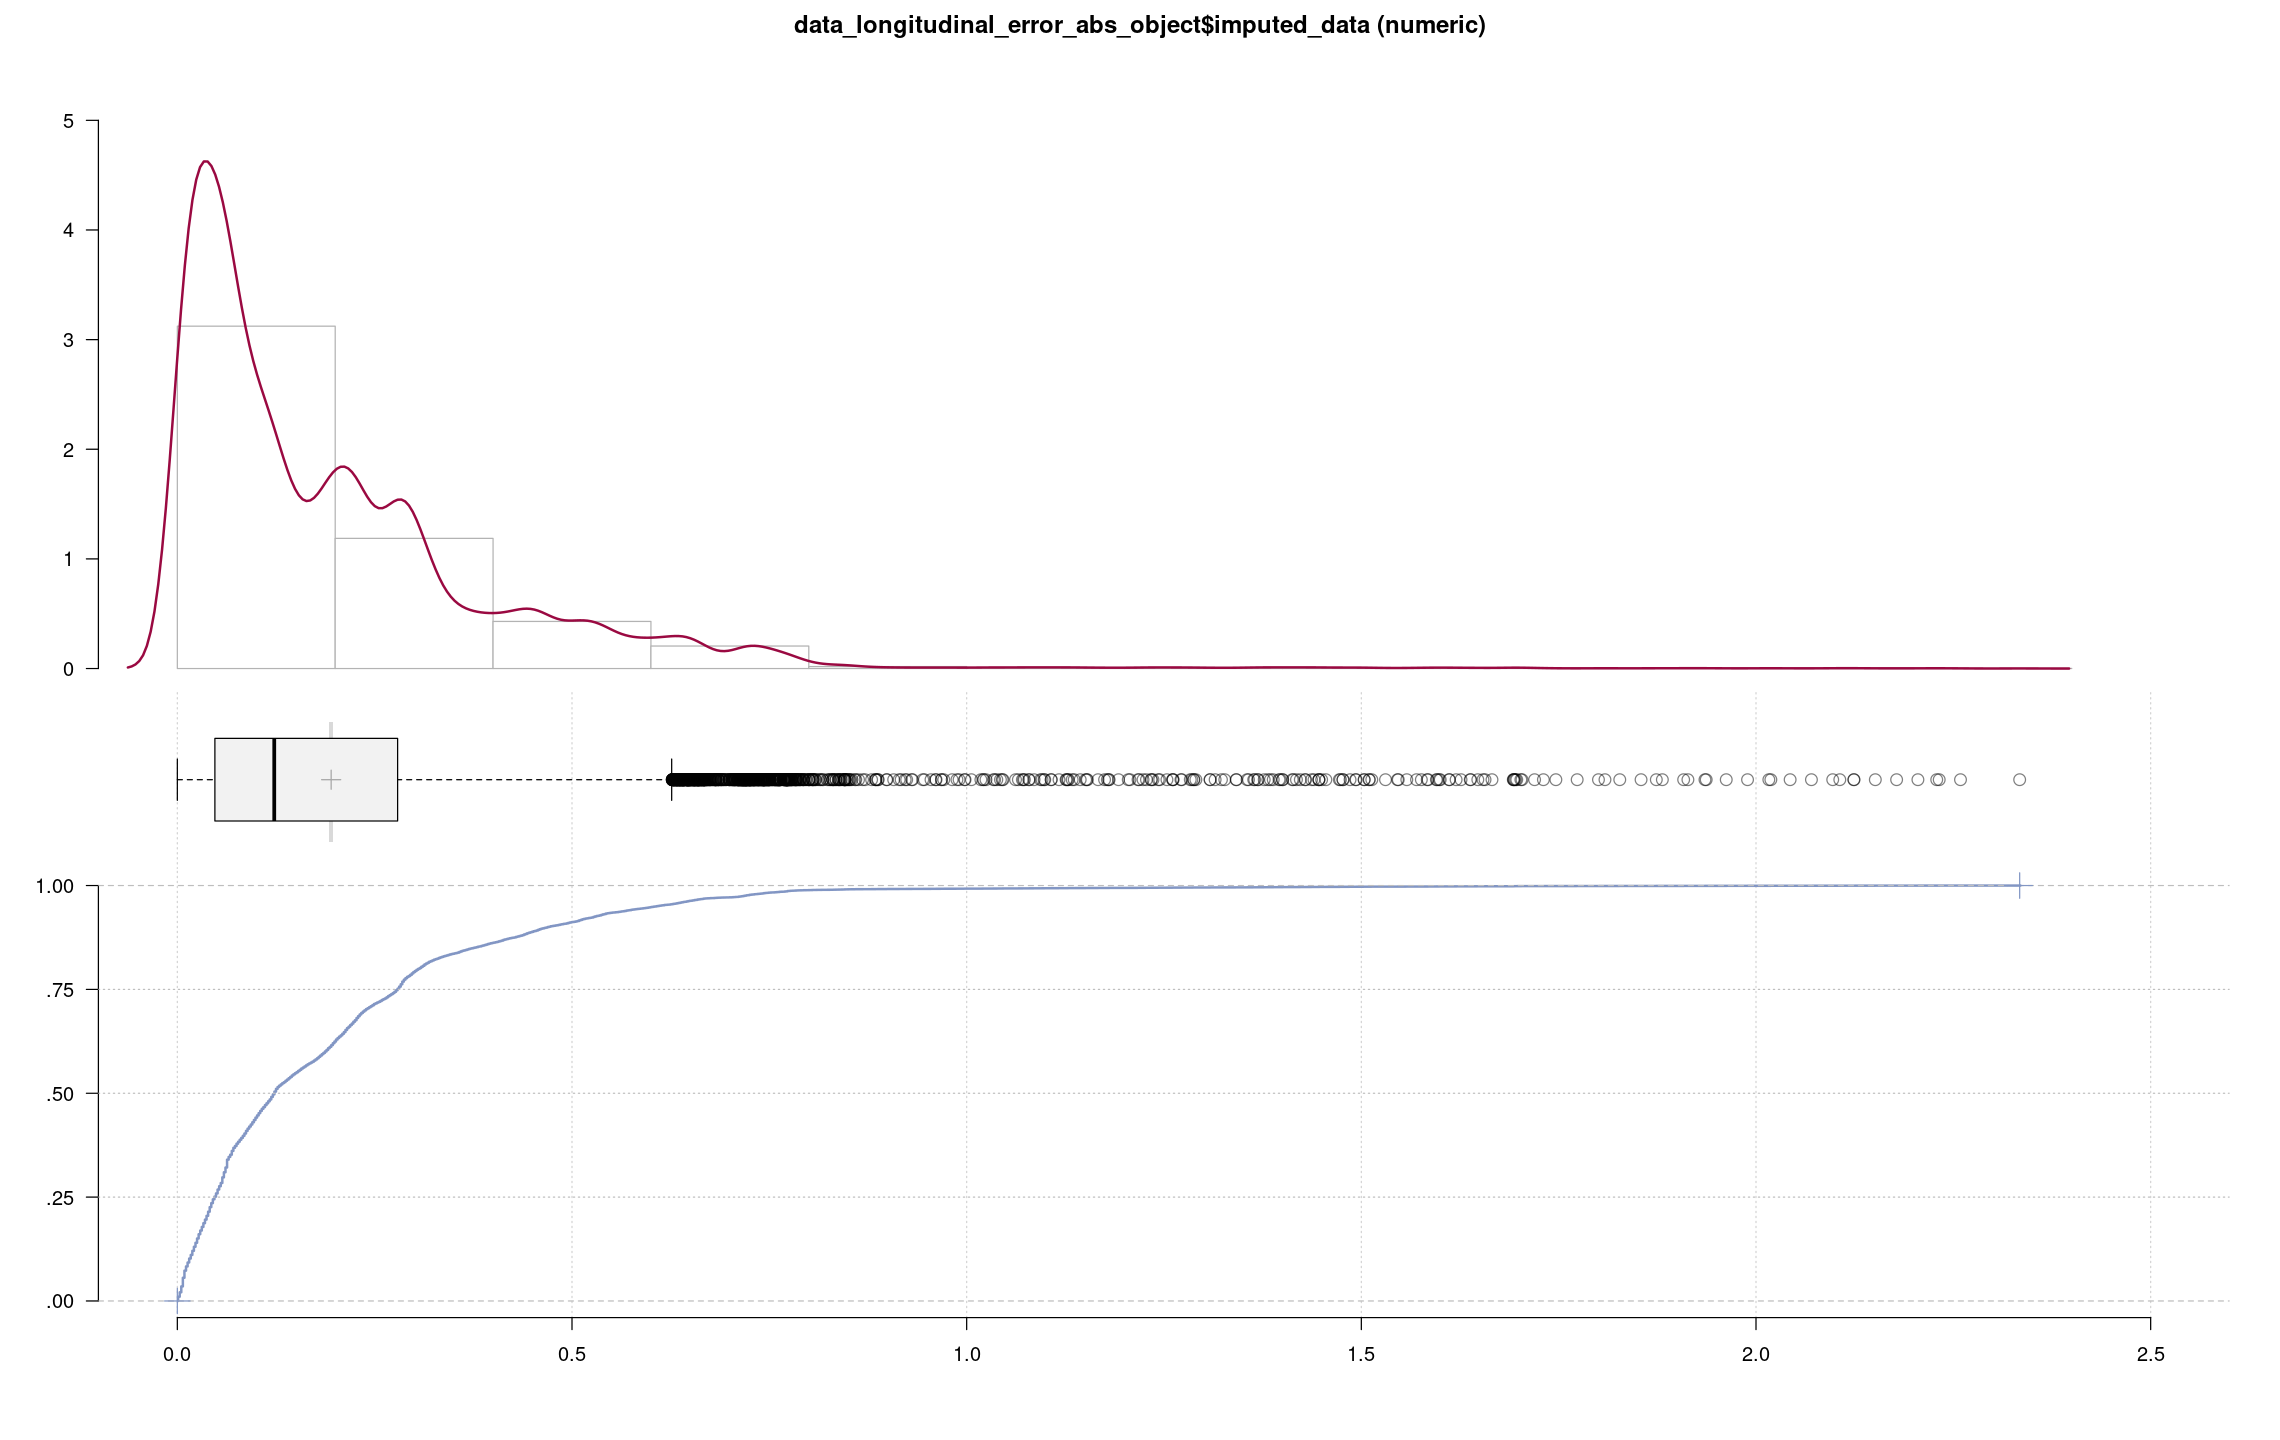

In [40]:
Desc(data_longitudinal_error_abs_object$imputed_data)

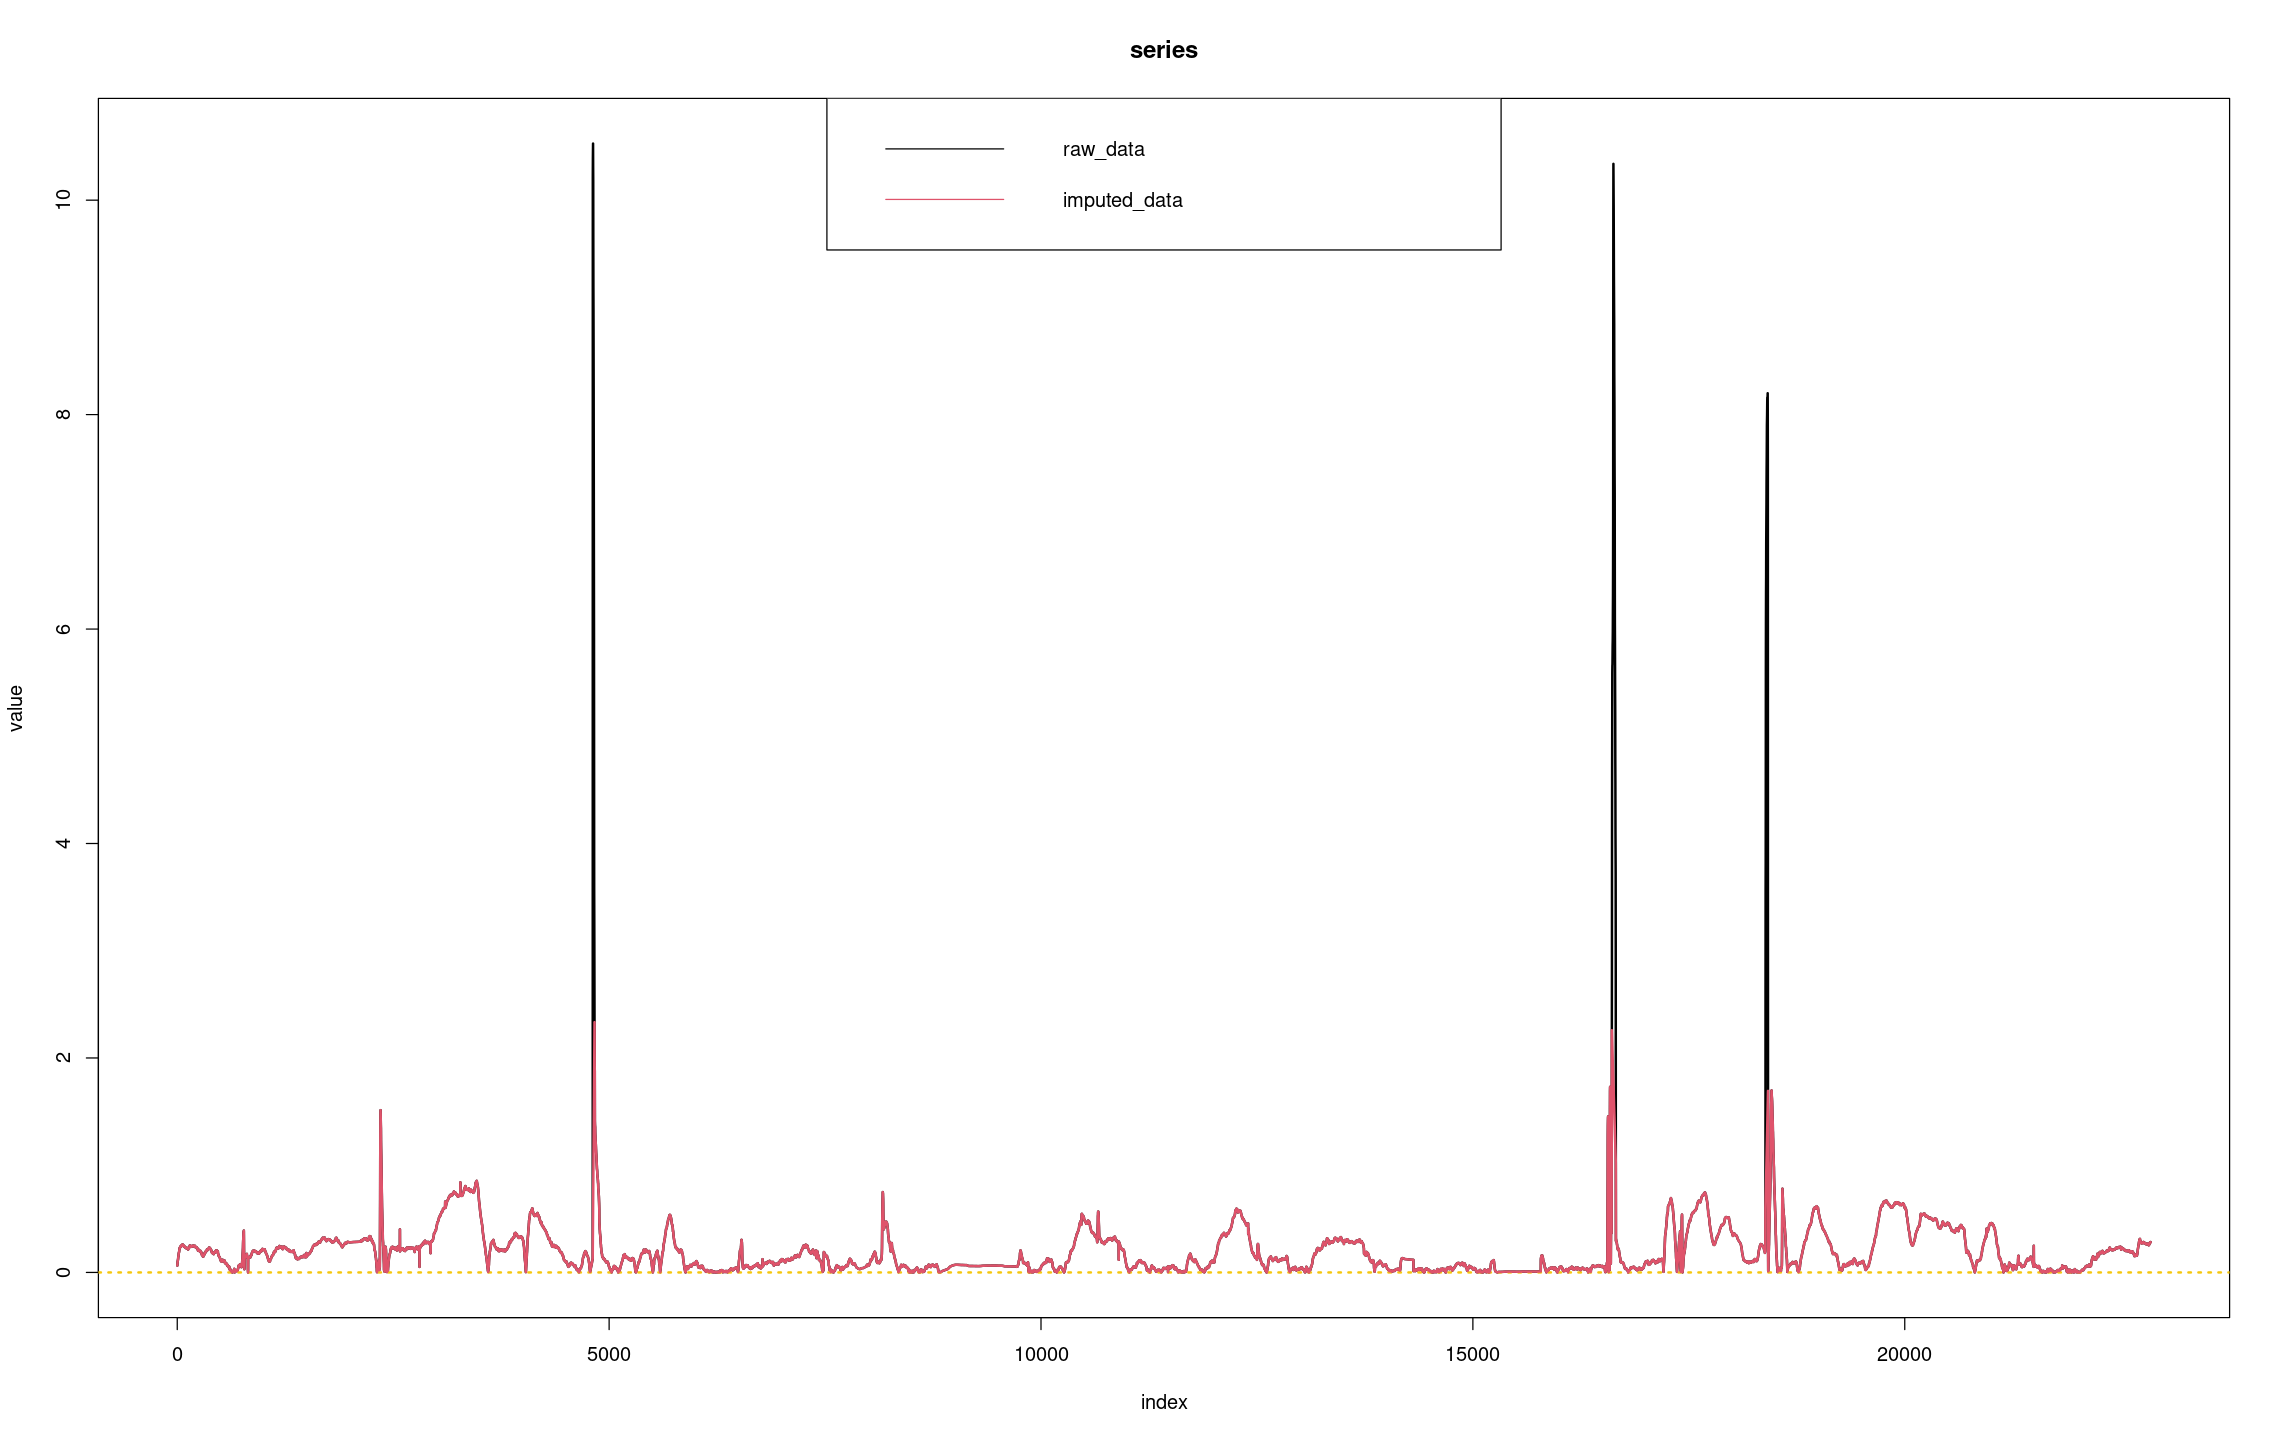

In [41]:
plot(data_longitudinal_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_longitudinal_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("top", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)


## haversine_error_abs

In [42]:
data_haversine_error_abs_object <- impute_outliers(x = data$haversine_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [43]:
print(names(data_haversine_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [44]:
print(data_haversine_error_abs_object$outlier_positions)

  [1]  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359  2360  2361
 [13]  2362  2363  2364  2365  2366  2367  2368  2369  2370  2371  2372  2373
 [25]  2374  2375  2376  2377  2378  2379  2380  2381  2382  2383  2384  2385
 [37]  2386  2387  2388  2389  4811  4812  4813  4814  4815  4816  4817  4818
 [49]  4819  4820  4821  4822  4823  4824  4825  4826  4827  4828  4829  4830
 [61] 16606 16607 16608 16609 16610 16611 16612 16613 16614 16615 16616 16617
 [73] 16618 16619 16620 16621 16622 16623 16624 16625 16626 16627 16628 16629
 [85] 16630 16631 16632 16633 16634 16635 16636 16637 16638 16639 16640 16641
 [97] 16642 16643 16644 16645 16646 16647 16648 16649 16650 16651 16652 16653
[109] 16654 16655 18391 18392 18393 18394 18395 18396 18397 18398 18399 18400
[121] 18401 18402 18403 18404 18405 18406 18407 18408 18409 18410 18411 18412
[133] 18413 18414 18415 18417 18418 18419 18420 18421 18422 18423 18424 18425
[145] 18426 18427 18428 18429 18430 18431 18432 18433 18434 1843

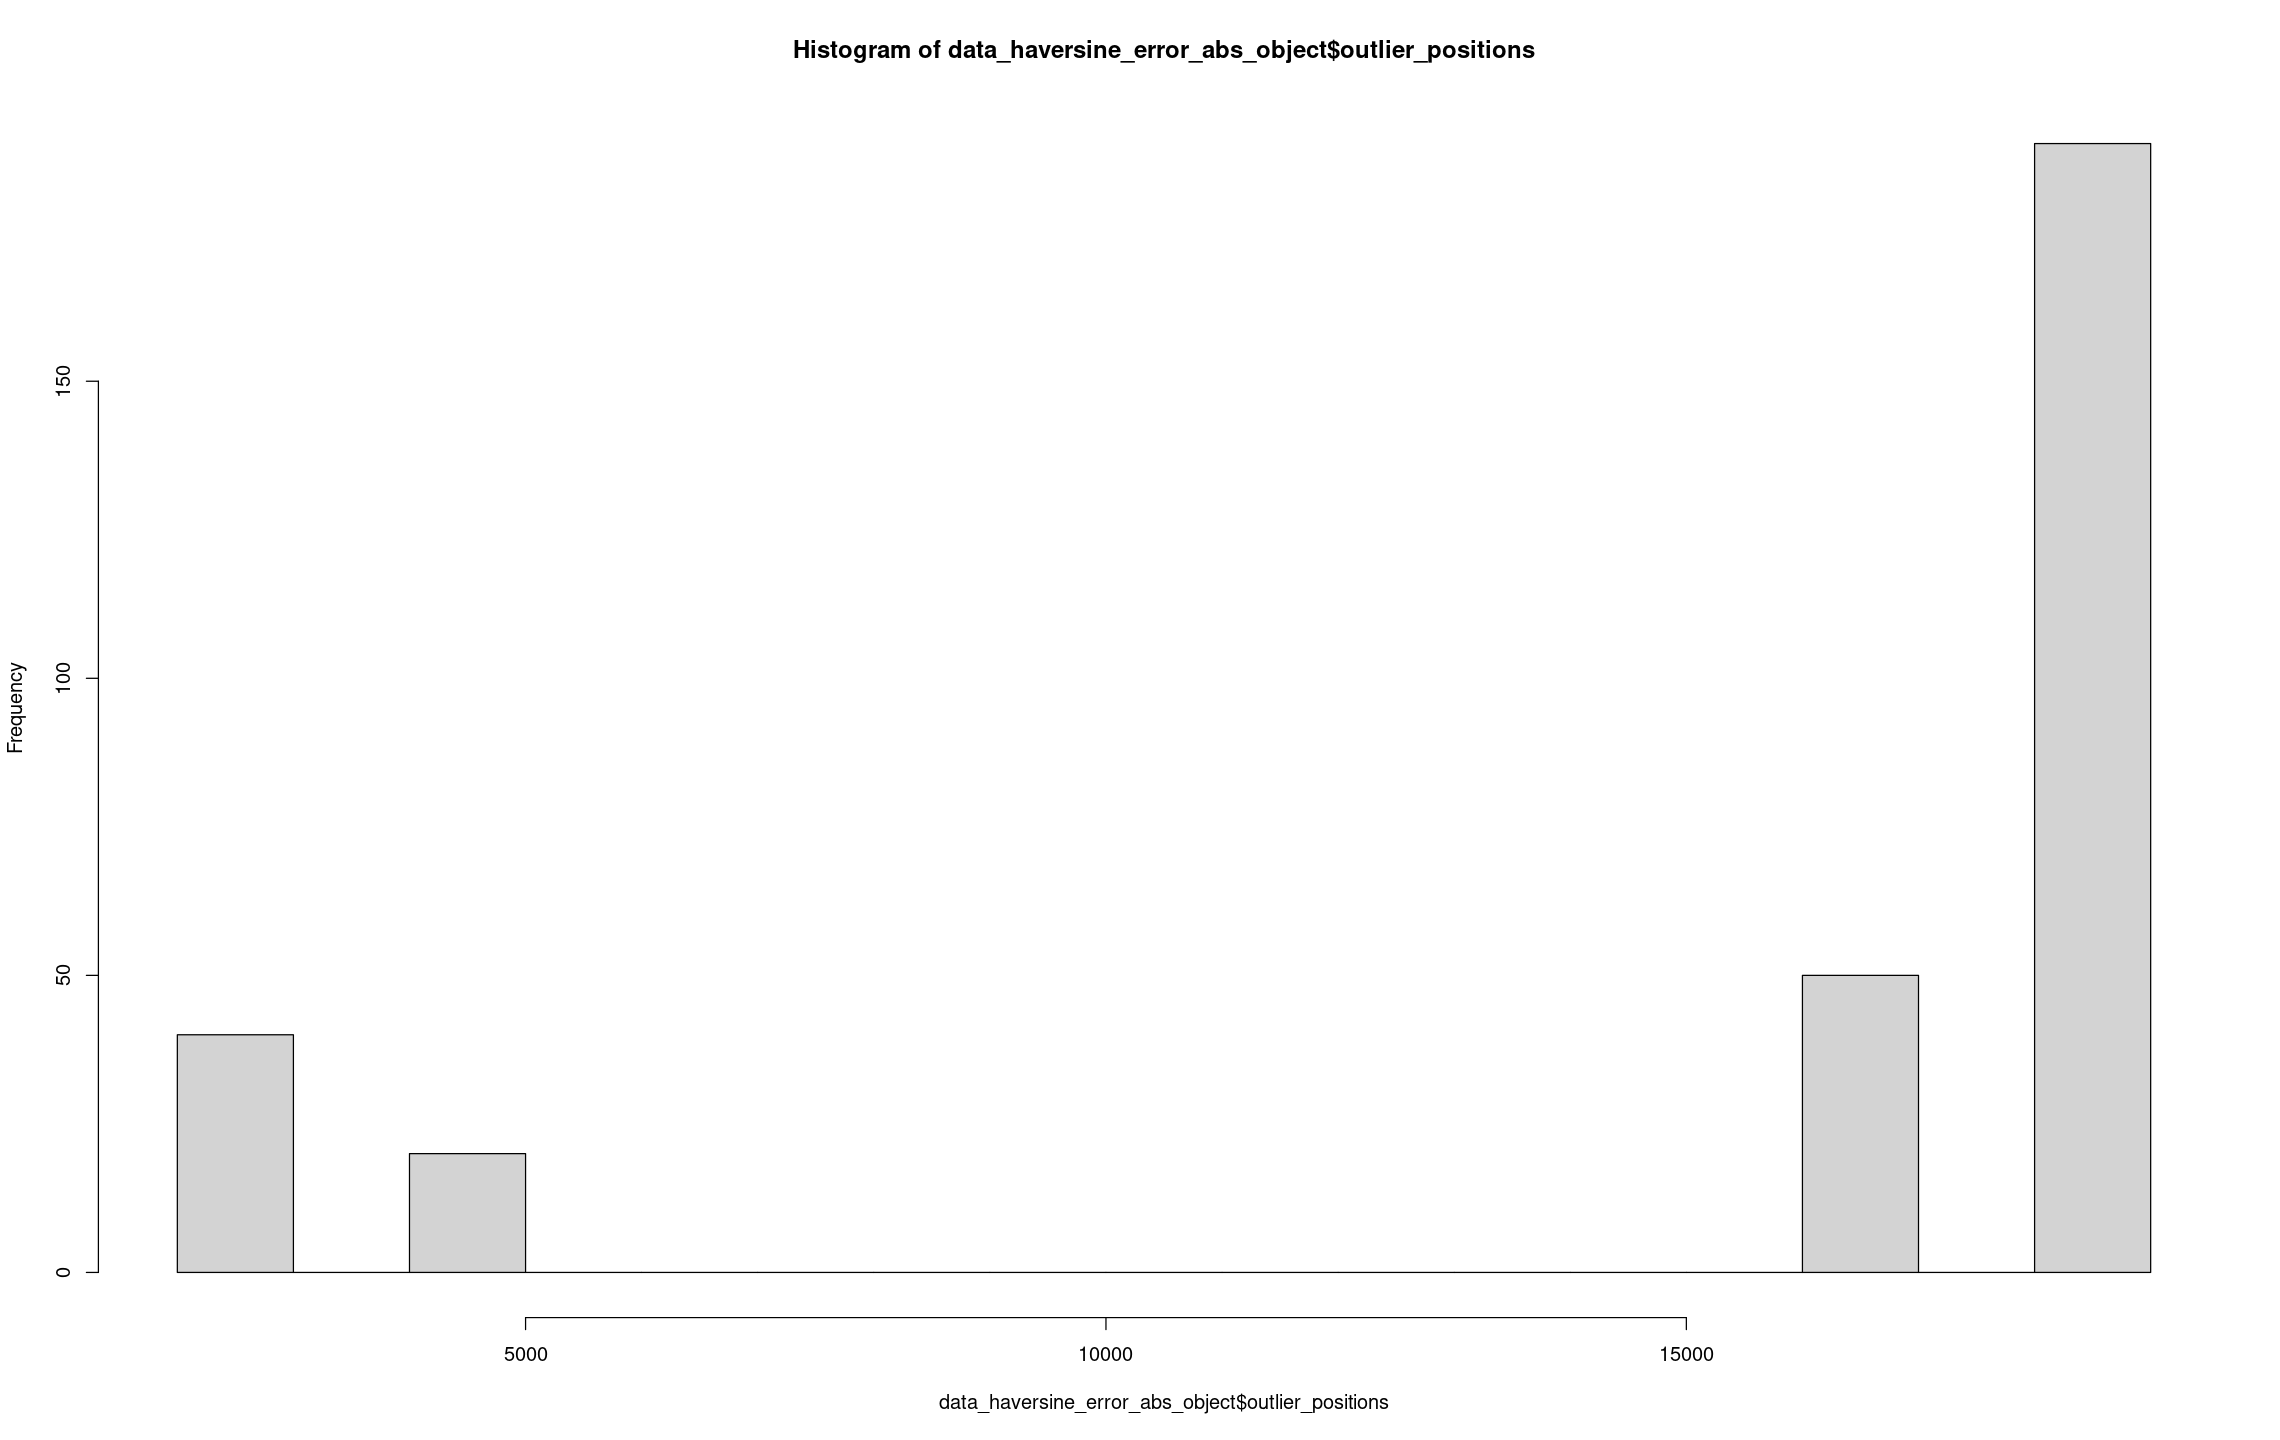

In [45]:
hist(data_haversine_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_haversine_error_abs_object$imputed_data (numeric)

       length            n          NAs       unique           0s         mean'
       22'847       22'847            0       22'574            0  0.547726068
                    100.0%         0.0%                      0.0%             
                                                                              
          .05          .10          .25       median          .75          .90
  0.097783819  0.133217523  0.215461470  0.371185601  0.737071246  1.024090862
                                                                              
        range           sd        vcoef          mad          IQR         skew
  5.411560112  0.598098511  1.091966488  0.316389942  0.521609776  4.483500310
                                                                              
        meanCI
   0.539970221
   0.555481915
              
           .9

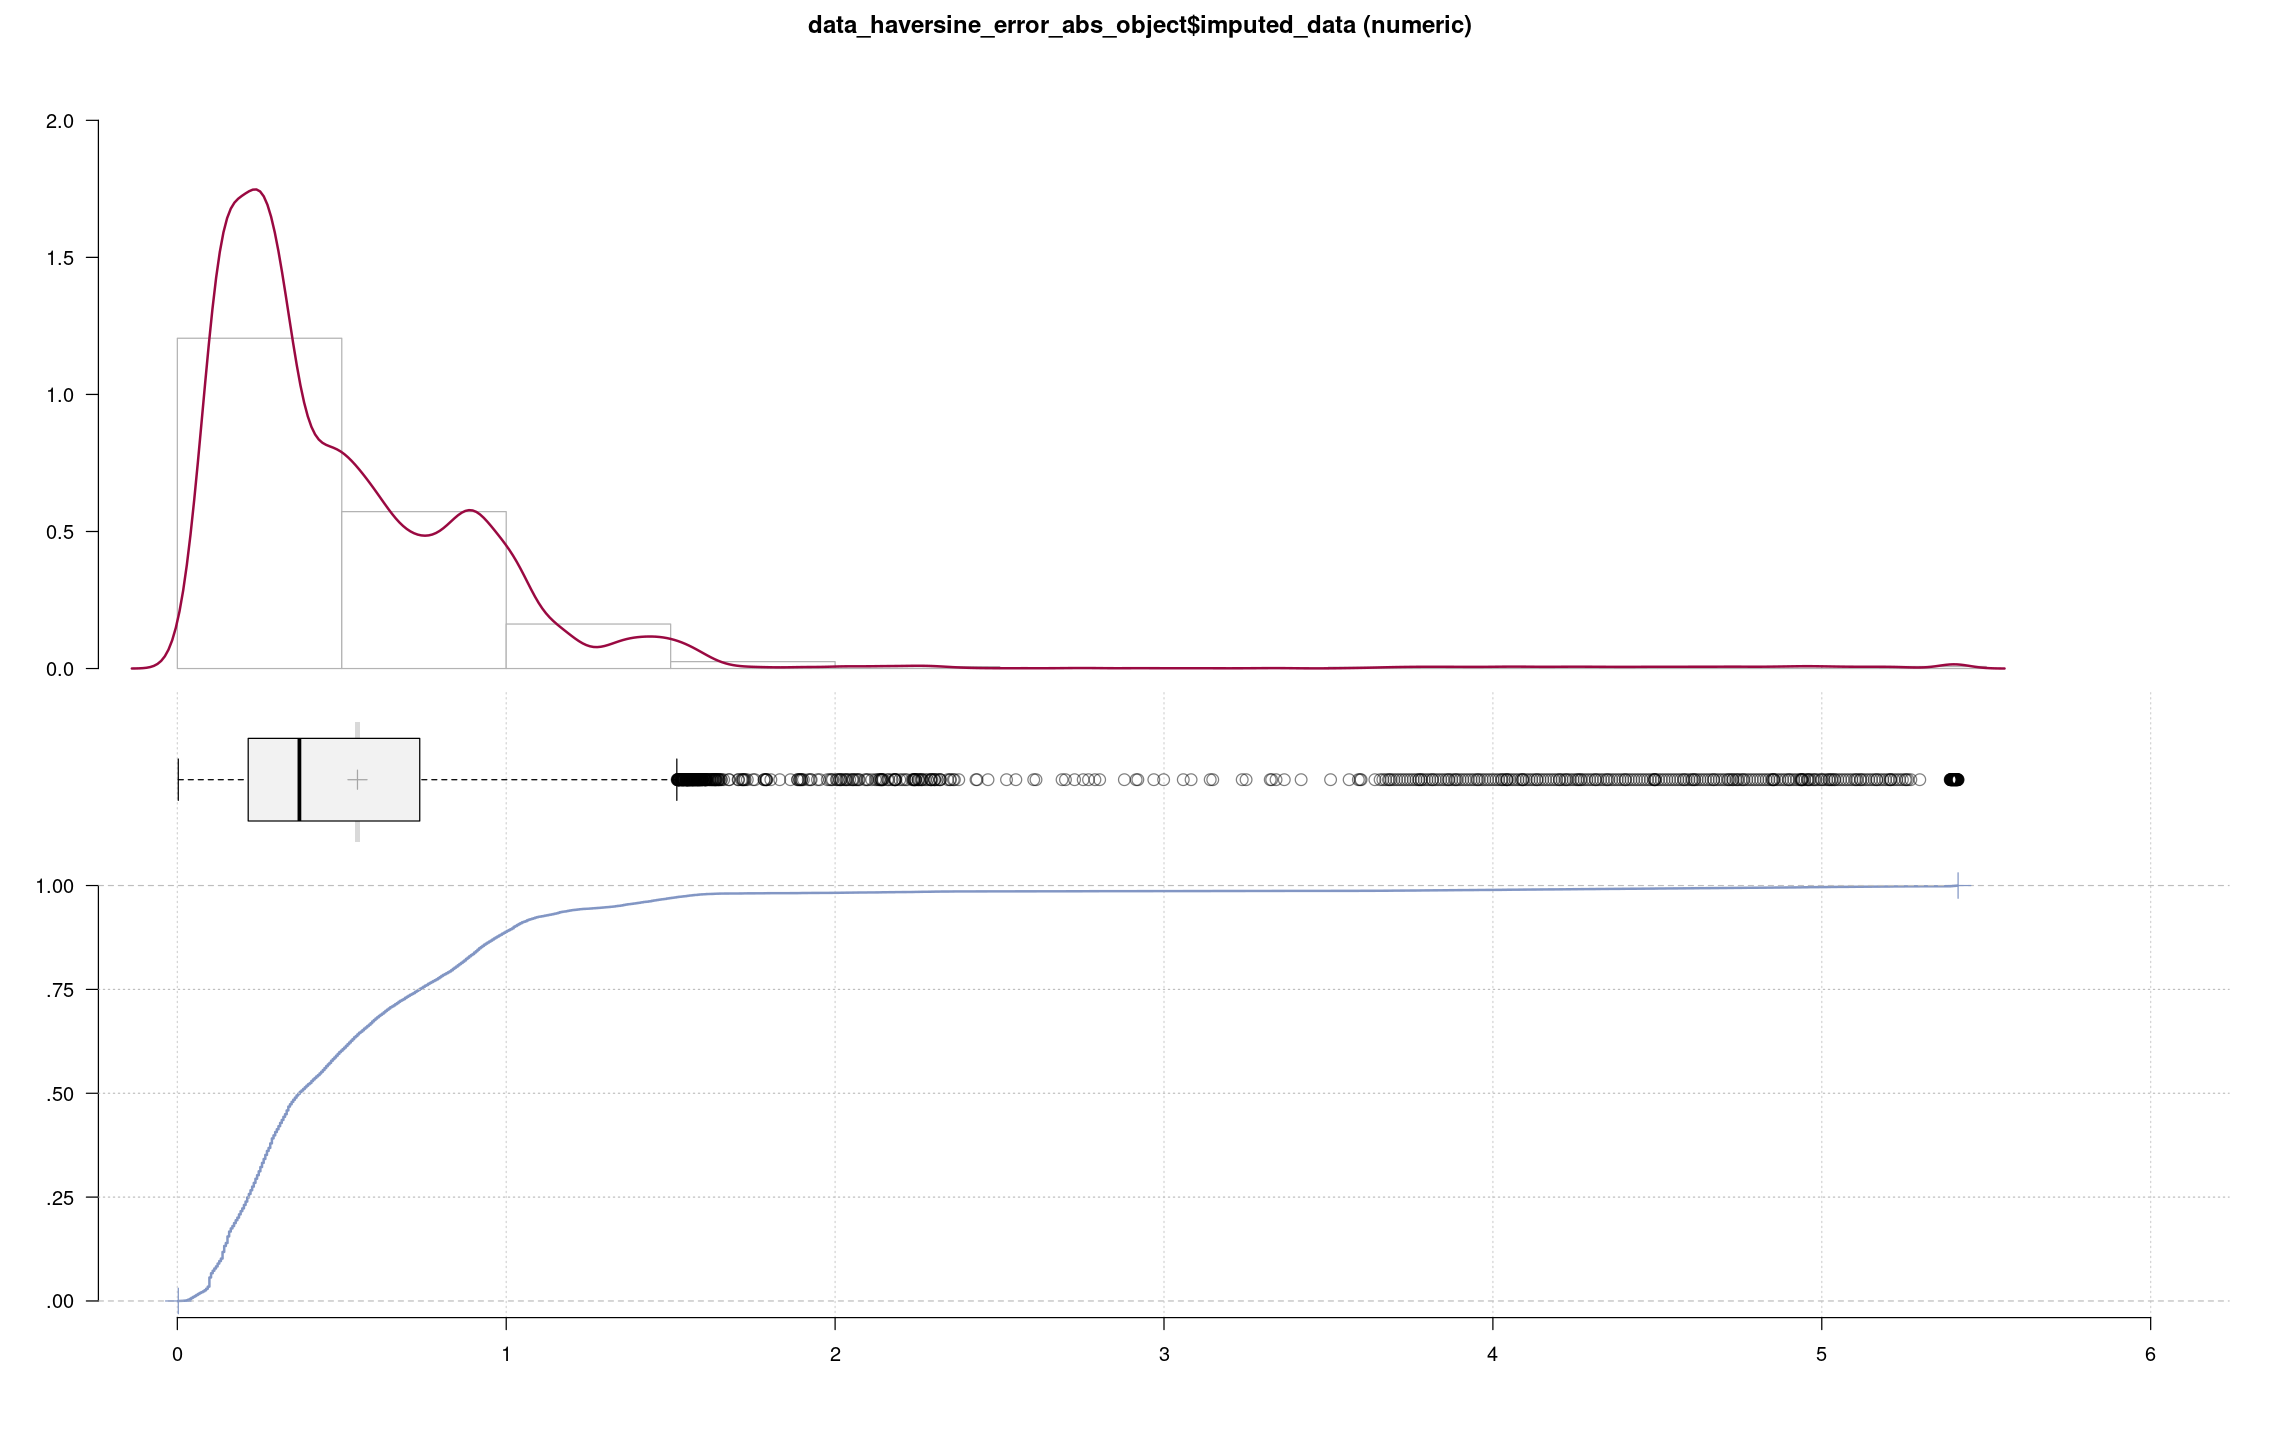

In [46]:
Desc(data_haversine_error_abs_object$imputed_data)

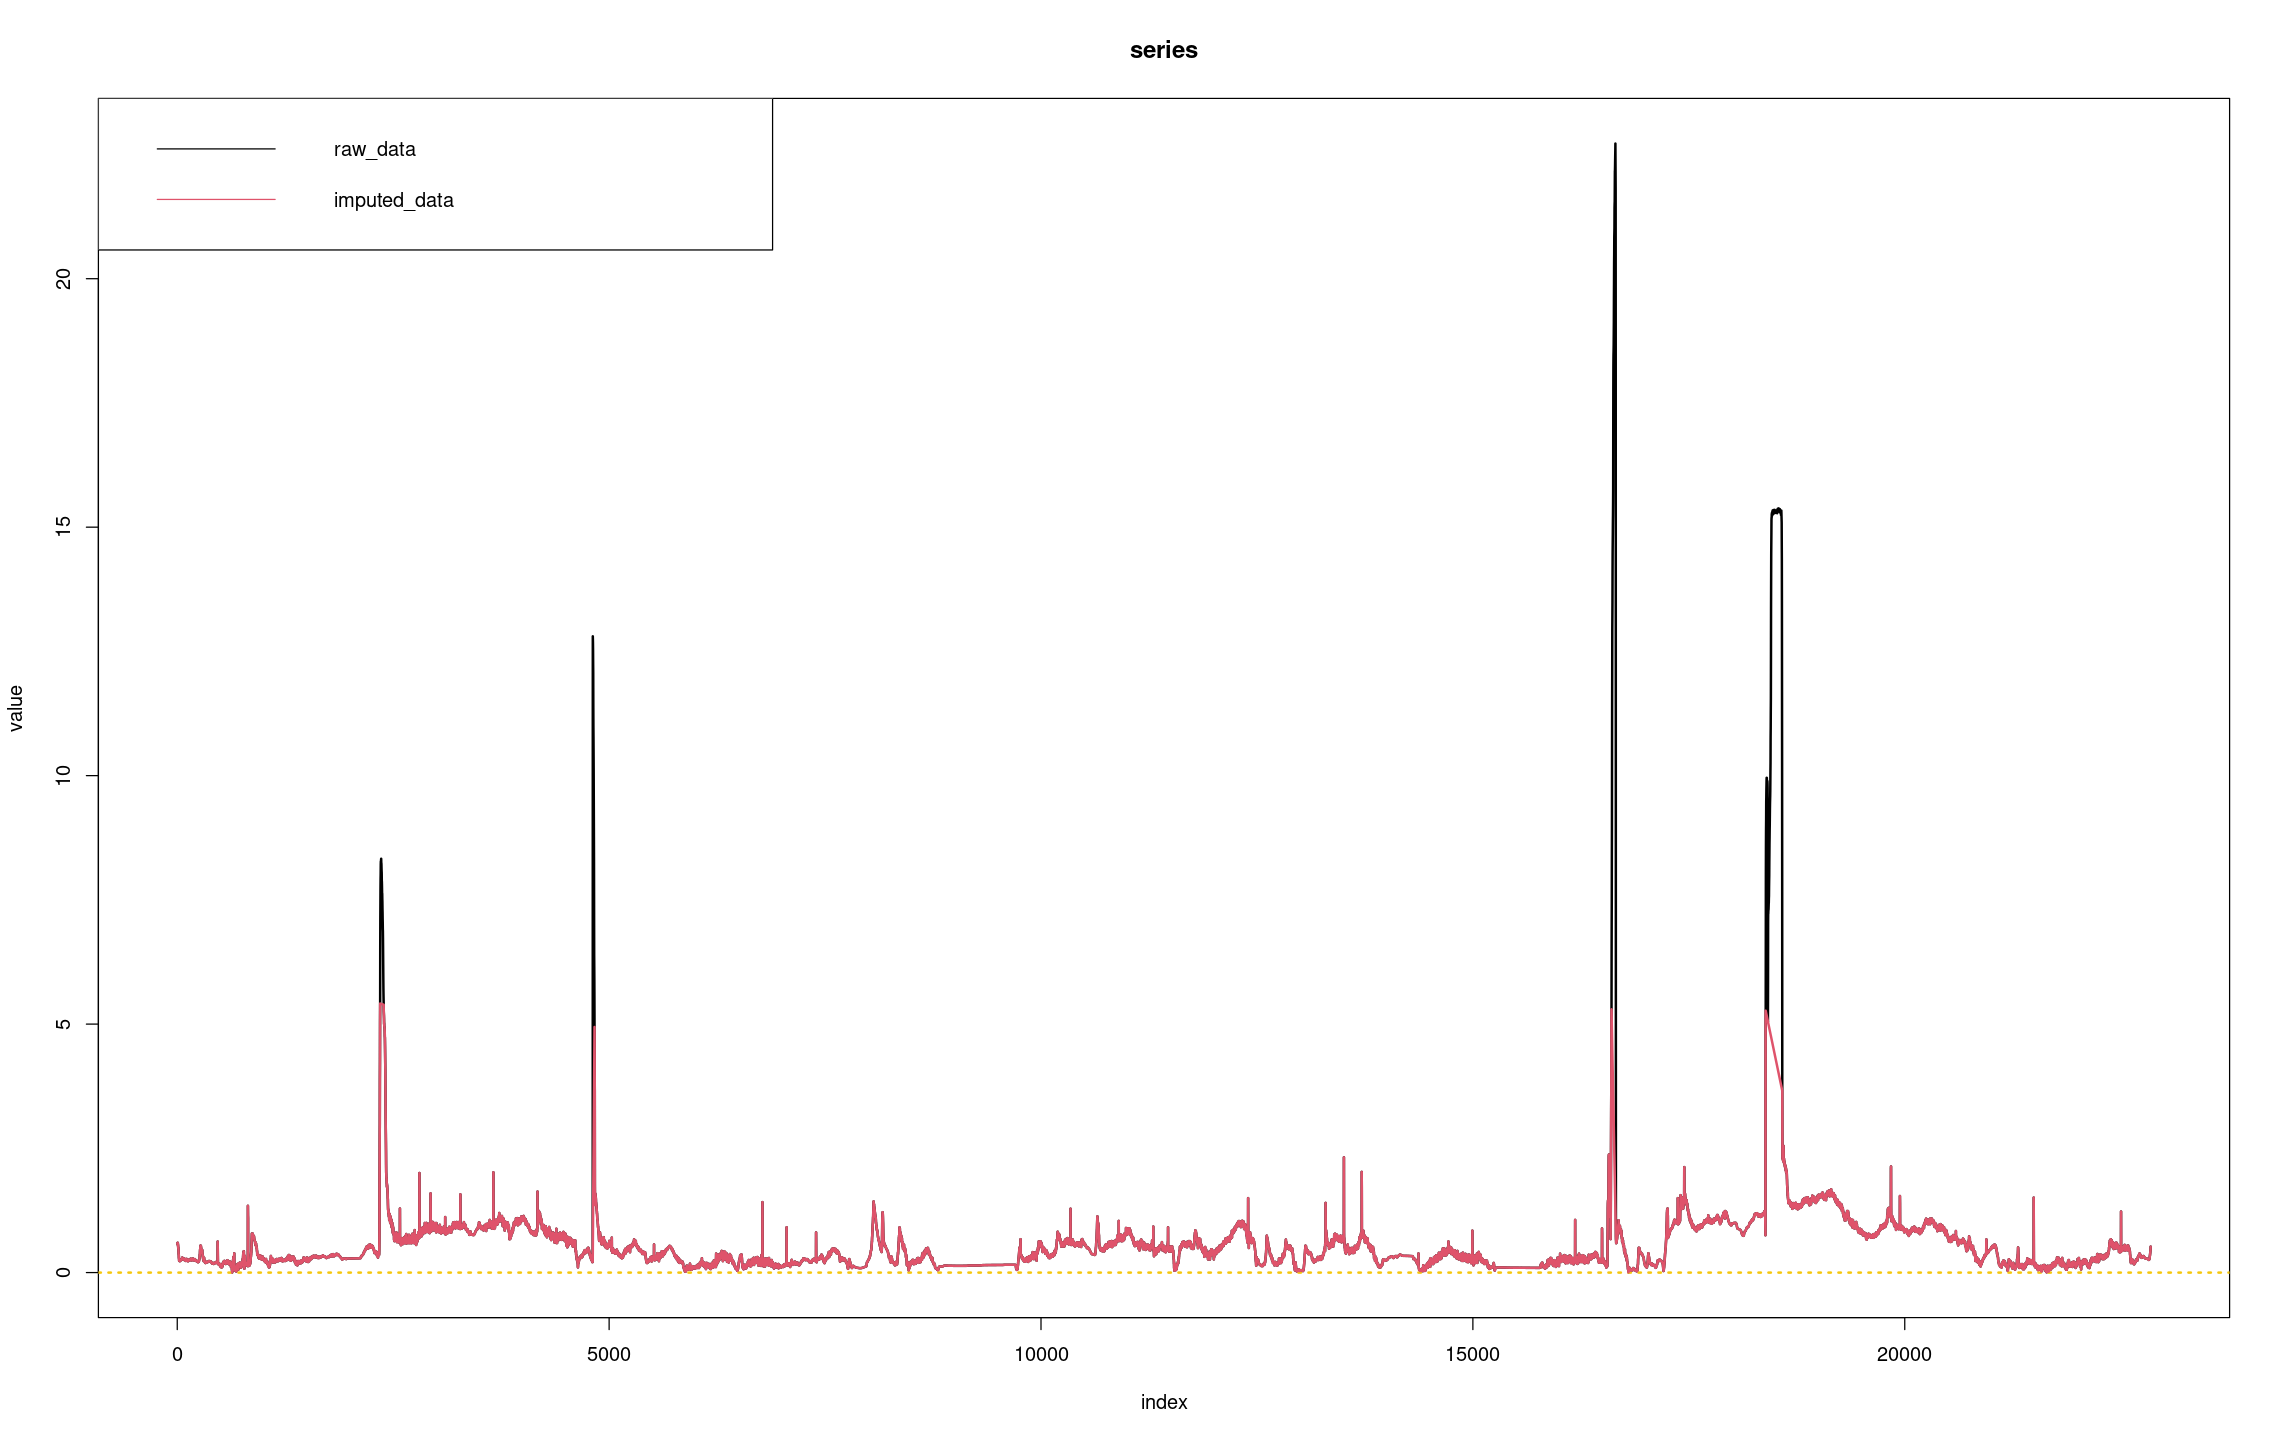

In [47]:
plot(data_haversine_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_haversine_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## Outlier positions

In [48]:
outlier_positions <- c(data_lateral_error_object$outlier_positions,
                      data_longitudinal_error_object$outlier_positions,
                      data_haversine_error_object$outlier_positions,
                      data_lateral_error_abs_object$outlier_positions,
                      data_longitudinal_error_abs_object$outlier_positions,
                      data_haversine_error_abs_object$outlier_positions)

outlier_positions <- sort(unique(outlier_positions))

In [49]:
print(outlier_positions)

  [1]  2348  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359
 [13]  2360  2361  2362  2363  2364  2365  2366  2367  2368  2369  2370  2371
 [25]  2372  2373  2374  2375  2376  2377  2378  2379  2380  2381  2382  2383
 [37]  2384  2385  2386  2387  2388  2389  2390  2391  2392  2393  2394  2395
 [49]  2396  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820  4821
 [61]  4822  4823  4824  4825  4826  4827  4828  4829  4830  4831 16605 16606
 [73] 16607 16608 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618
 [85] 16619 16620 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630
 [97] 16631 16632 16633 16634 16635 16636 16637 16638 16639 16640 16641 16642
[109] 16643 16644 16645 16646 16647 16648 16649 16650 16651 16652 16653 16654
[121] 16655 18388 18389 18390 18391 18392 18393 18394 18395 18396 18397 18398
[133] 18399 18400 18401 18402 18403 18404 18405 18406 18407 18408 18409 18410
[145] 18411 18412 18413 18414 18415 18416 18417 18418 18419 1842

# Updated dataset

In [50]:
data$lateral_error_imputed <- data_lateral_error_object$imputed_data

In [51]:
data$longitudinal_error_imputed <- data_longitudinal_error_object$imputed_data

In [52]:
data$haversine_error_imputed <- data_haversine_error_object$imputed_data

In [53]:
data$lateral_error_abs_imputed <- data_lateral_error_abs_object$imputed_data

In [54]:
data$longitudinal_error_abs_imputed <- data_longitudinal_error_abs_object$imputed_data

In [55]:
data$haversine_error_abs_imputed <- data_haversine_error_abs_object$imputed_data

In [56]:
print(names(data))

 [1] "timestamp"                      "latitude"                      
 [3] "longitude"                      "velocity_latitude"             
 [5] "velocity_longitude"             "velocity"                      
 [7] "lateral_error"                  "longitudinal_error"            
 [9] "haversine_error"                "latitude_error"                
[11] "longitude_error"                "heading_error"                 
[13] "lateral_error_abs"              "longitudinal_error_abs"        
[15] "haversine_error_abs"            "latitude_error_abs"            
[17] "longitude_error_abs"            "heading_error_abs"             
[19] "area"                           "object"                        
[21] "name_airplane"                  "name_bench"                    
[23] "name_bench..group."             "name_bicycle"                  
[25] "name_bird"                      "name_bird..group."             
[27] "name_boat"                      "name_bus"                      
[29] "

In [57]:
destination <- "./applications/final_dataset_with_outliers_imputed_using_coefficient_iqr_9.csv"

In [58]:
xfun::in_dir(dir = path, expr = write.csv(x = data, file = destination, row.names = FALSE))

# Histograms of imputed variables

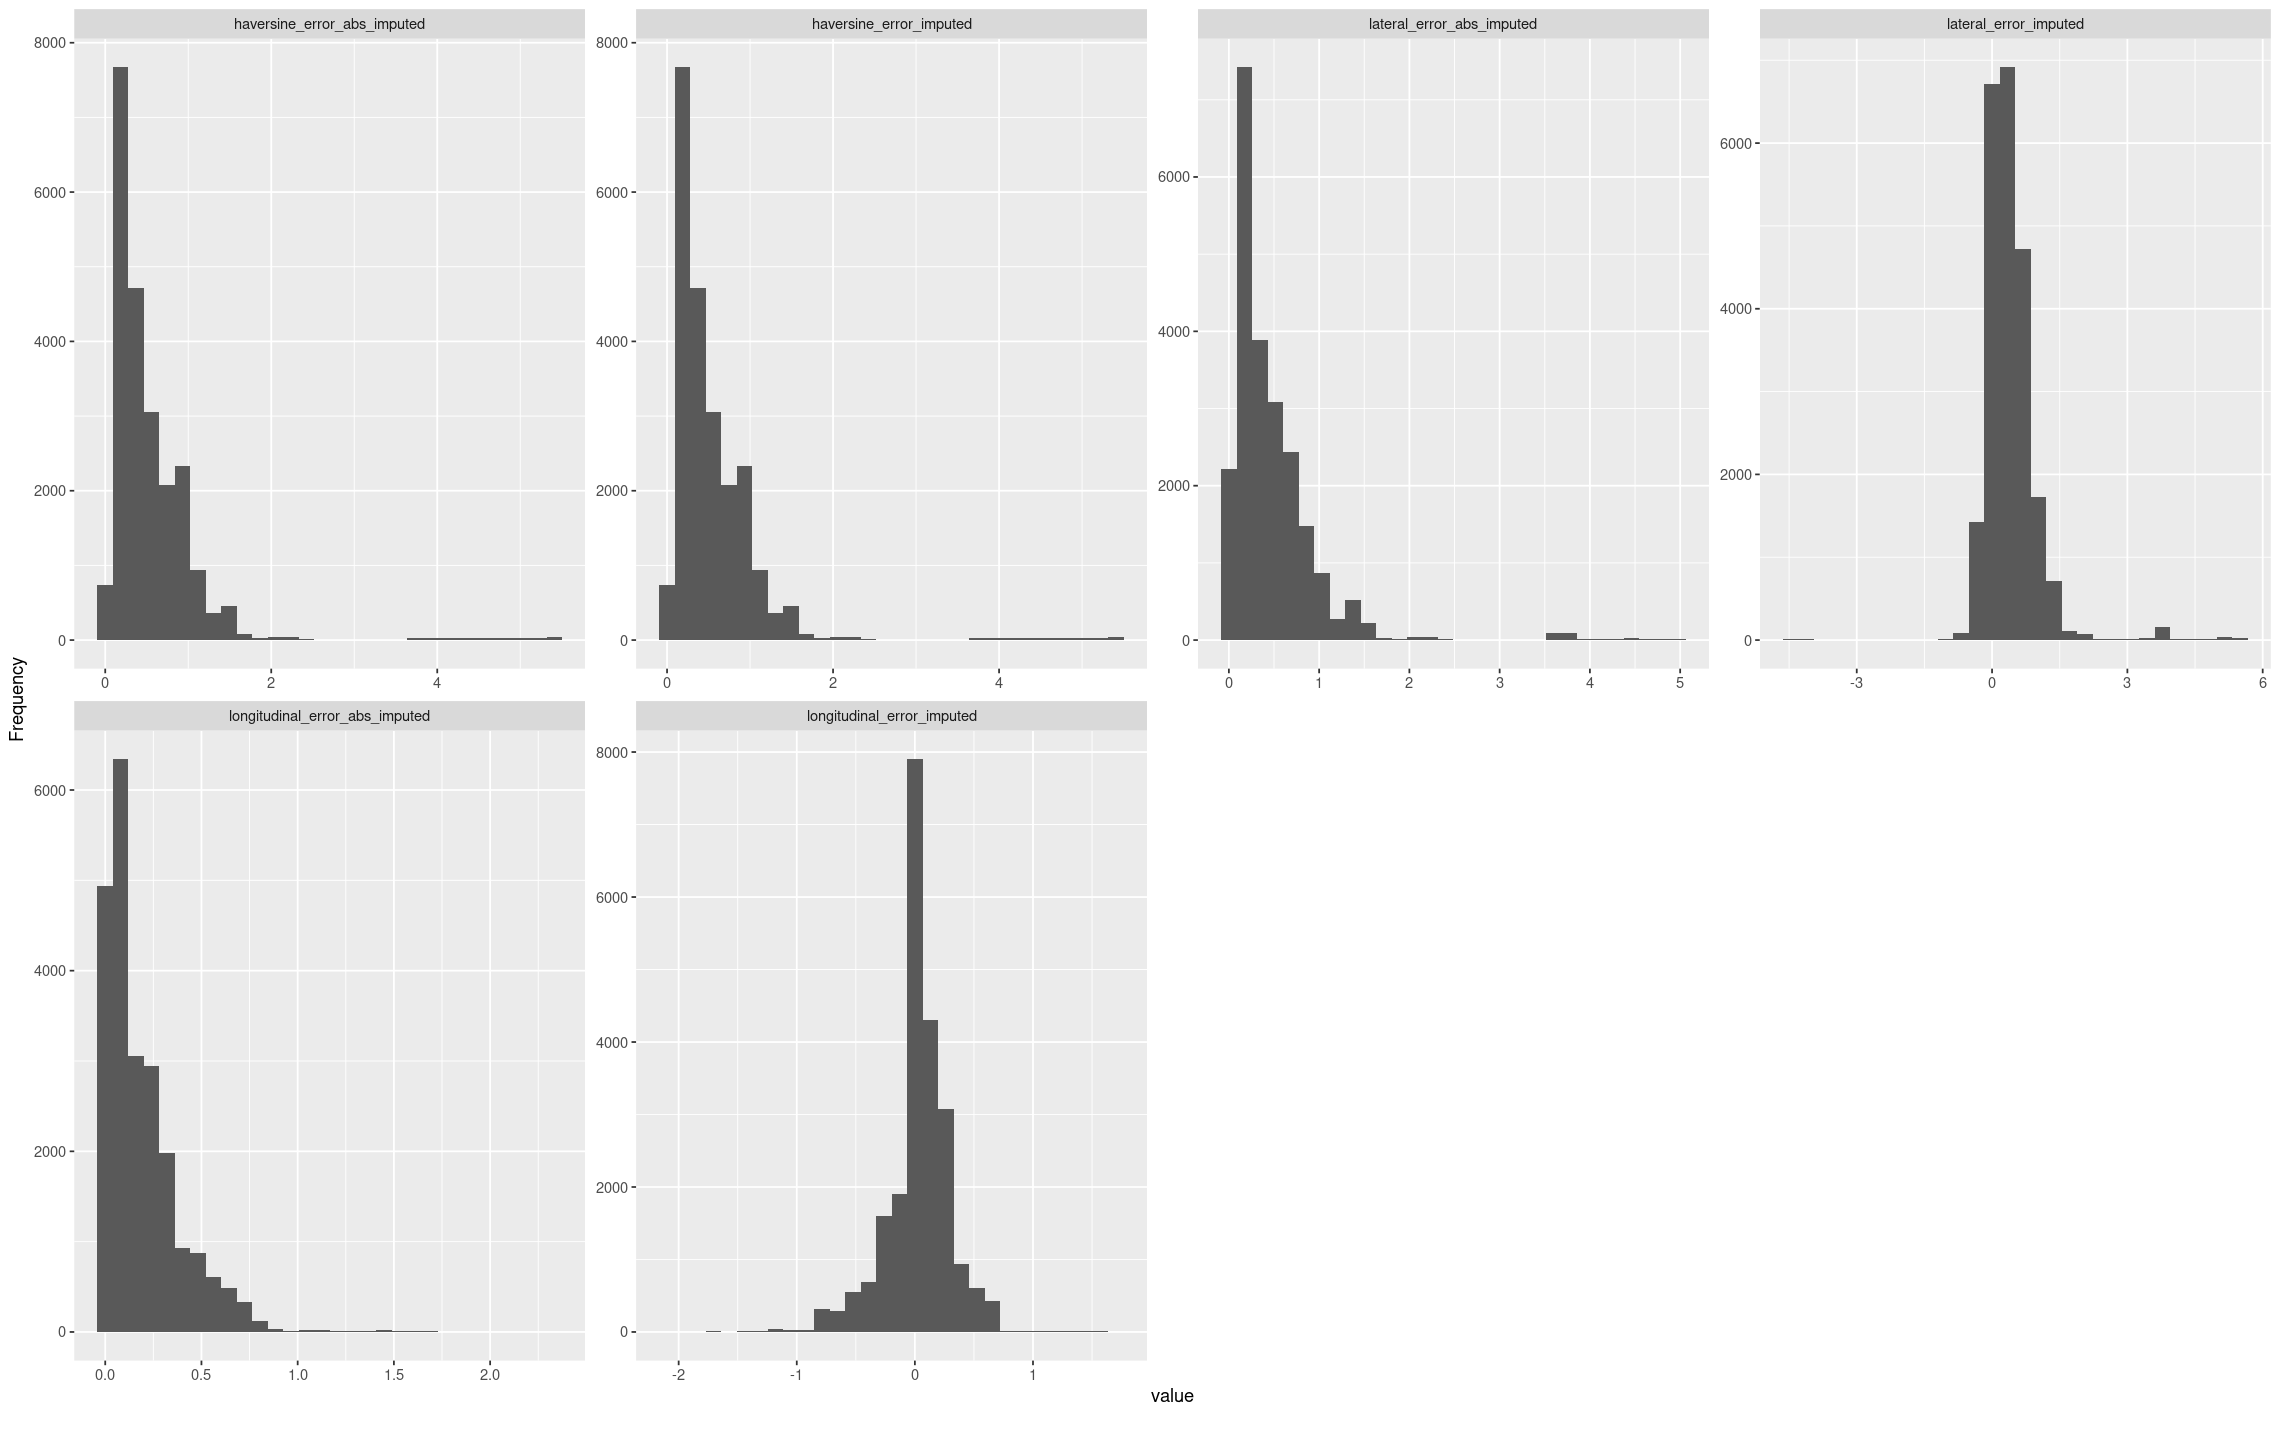

In [62]:
data_bis <- data %>% select(c(lateral_error_imputed, longitudinal_error_imputed, haversine_error_imputed,
                             lateral_error_abs_imputed, longitudinal_error_abs_imputed, haversine_error_abs_imputed))

plot_histogram(data_bis)

# Driving trajectory

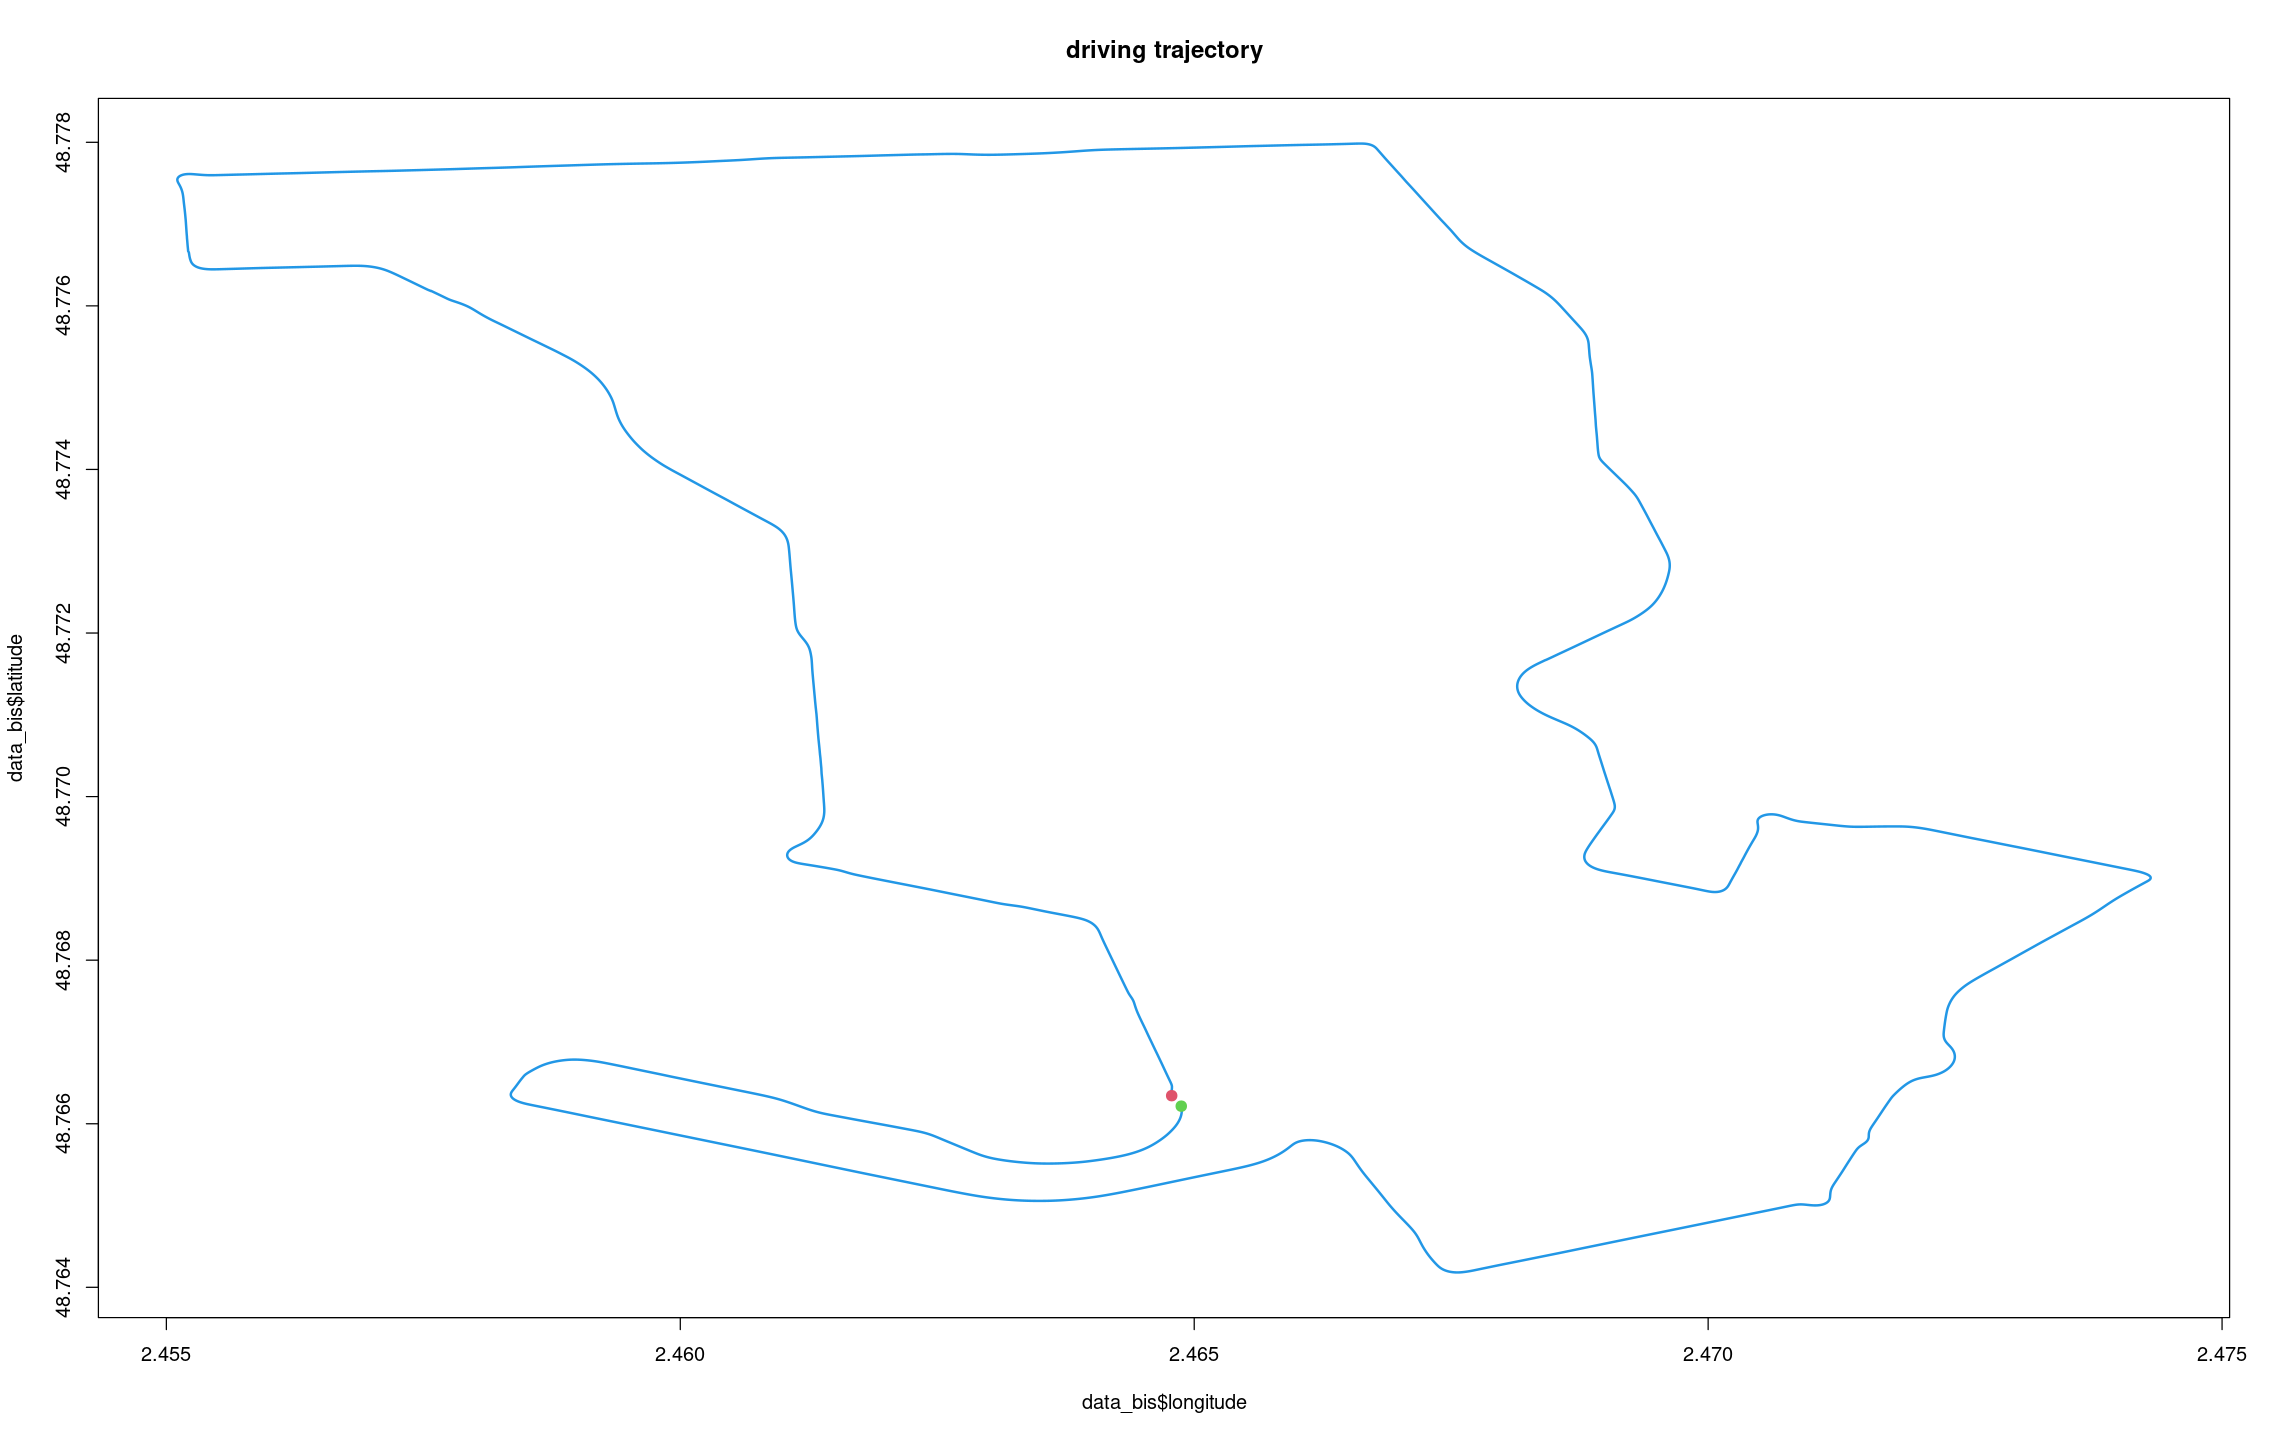

In [63]:
data_bis <- data %>% select(c(latitude, longitude))

plot(y = data_bis$latitude, 
     x = data_bis$longitude,
     main = "driving trajectory",
     type = "l",
     col = 4,
     lwd = 2)

points(y = data_bis$latitude[1],
       x = data_bis$longitude[1],
       pch = 19,
       col = 3,
       lwd = 2)

n <- nrow(data_bis)

points(y = data_bis$latitude[n],
       x = data_bis$longitude[n],
       pch = 19,
       col = 2,
       lwd = 2)

# Scatted plots

## Scatted plot by lateral_error_imputed

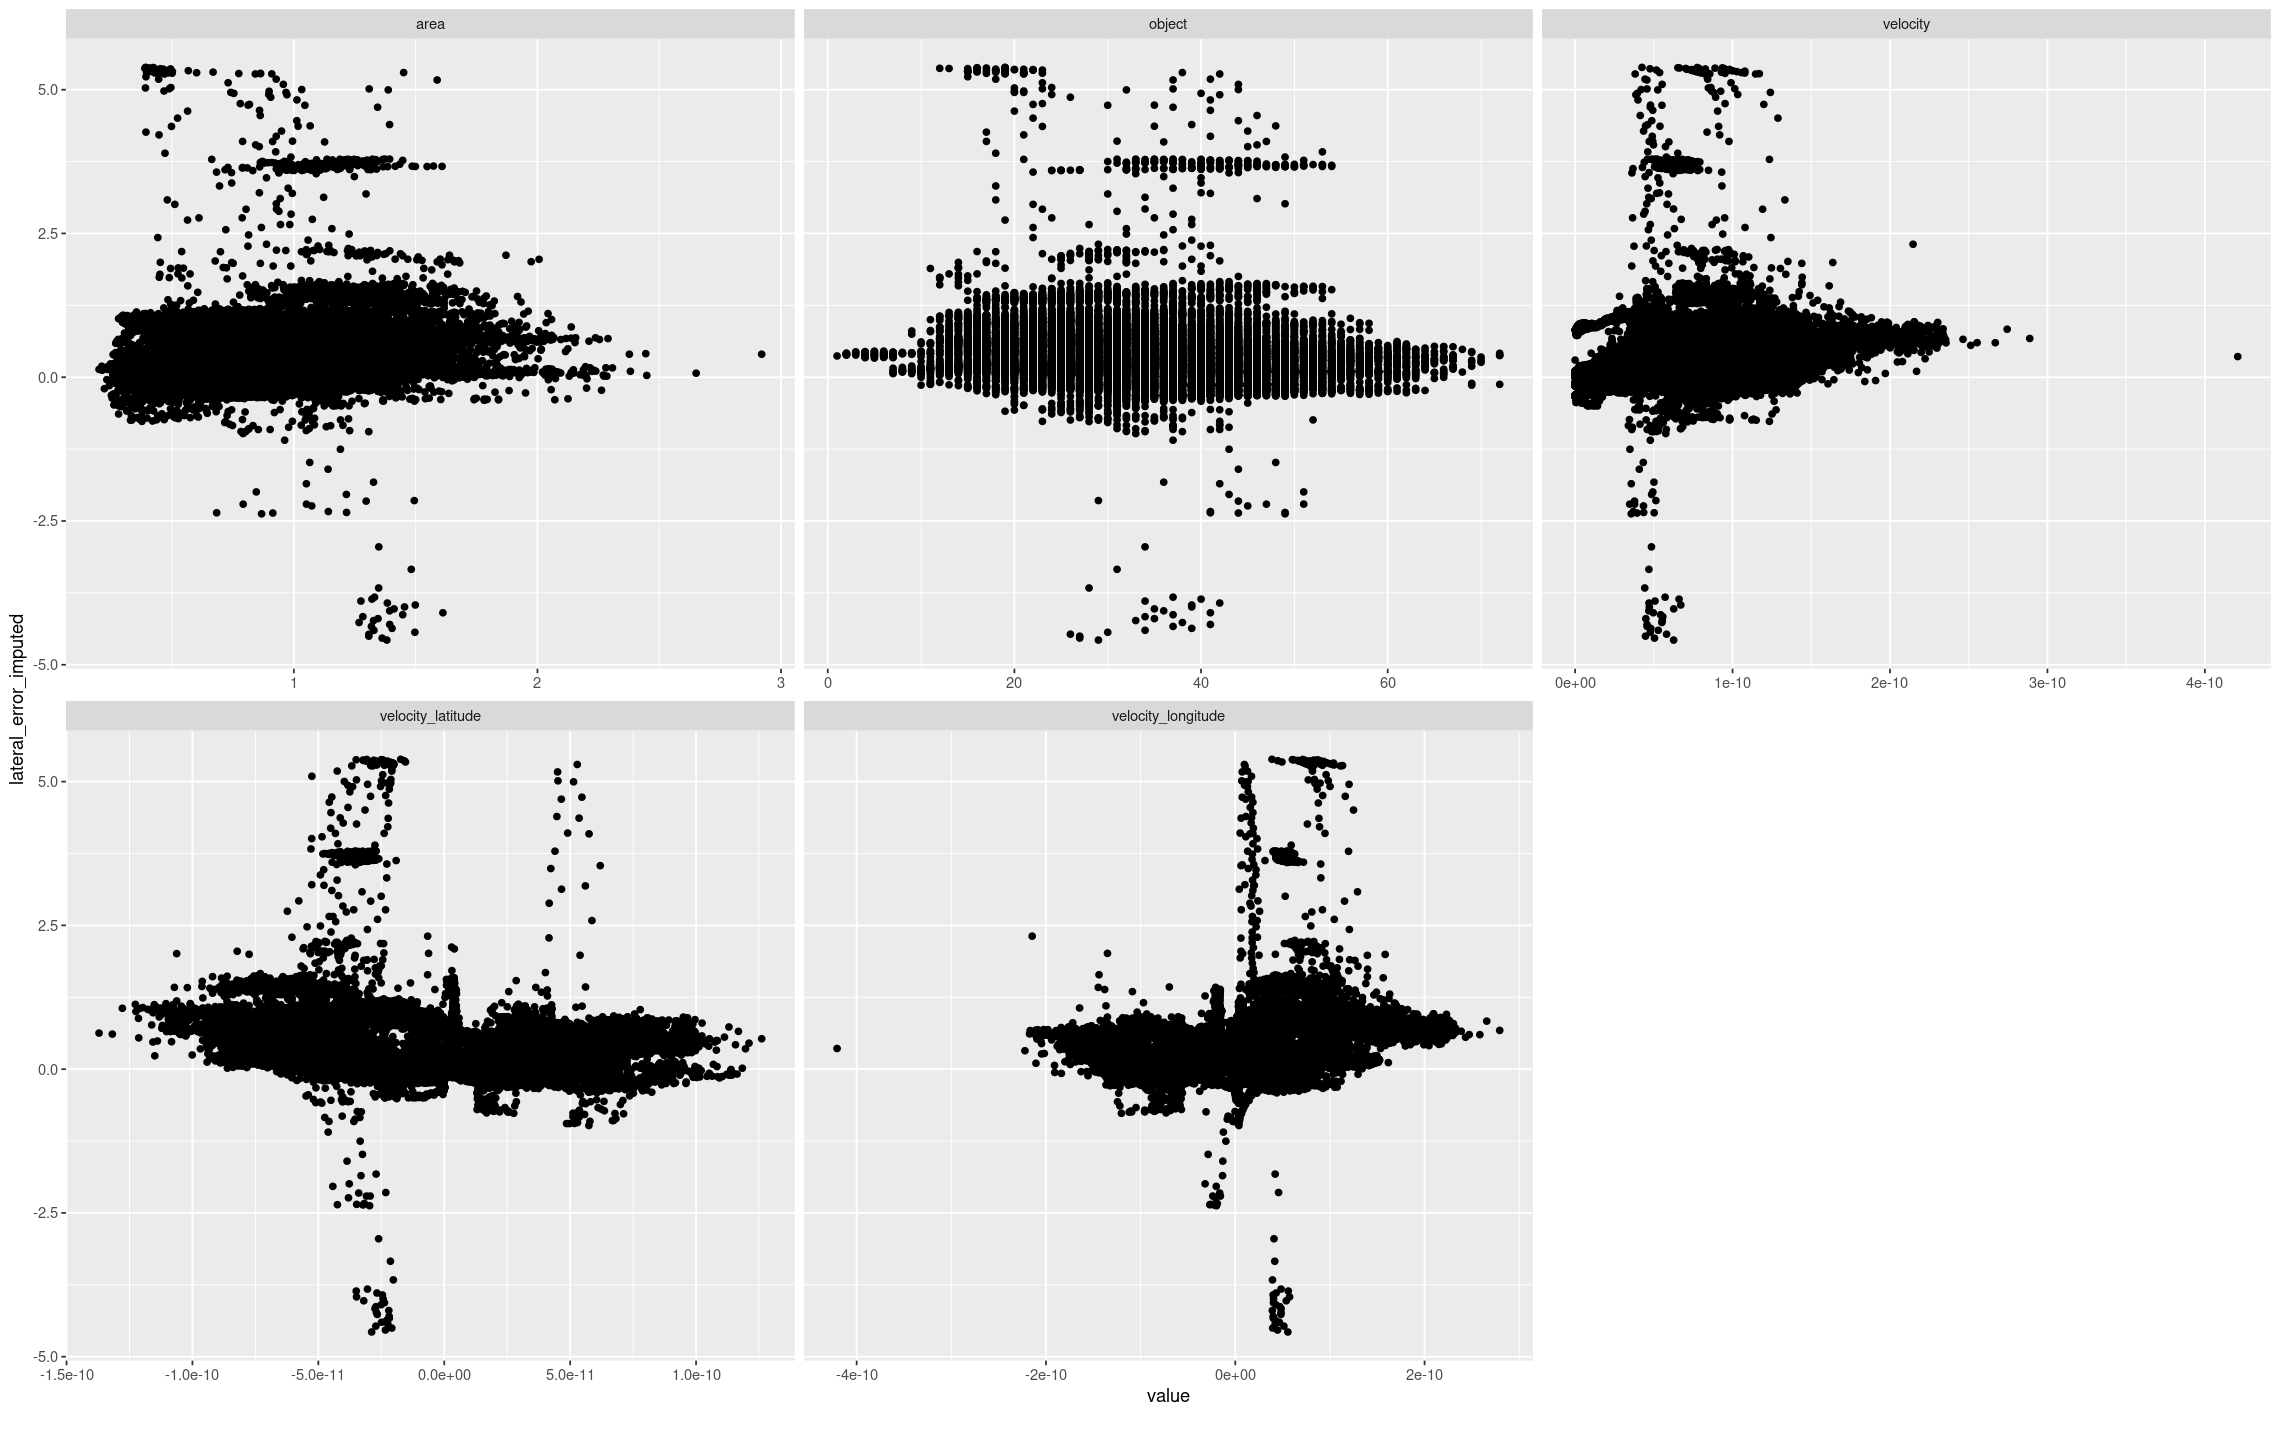

In [64]:
data_bis <- data %>% select(lateral_error_imputed, velocity_latitude, velocity_longitude, velocity, area, object)
plot_scatterplot(na.omit(data_bis), by="lateral_error_imputed")

## Scatted plot by longitudinal_error_imputed

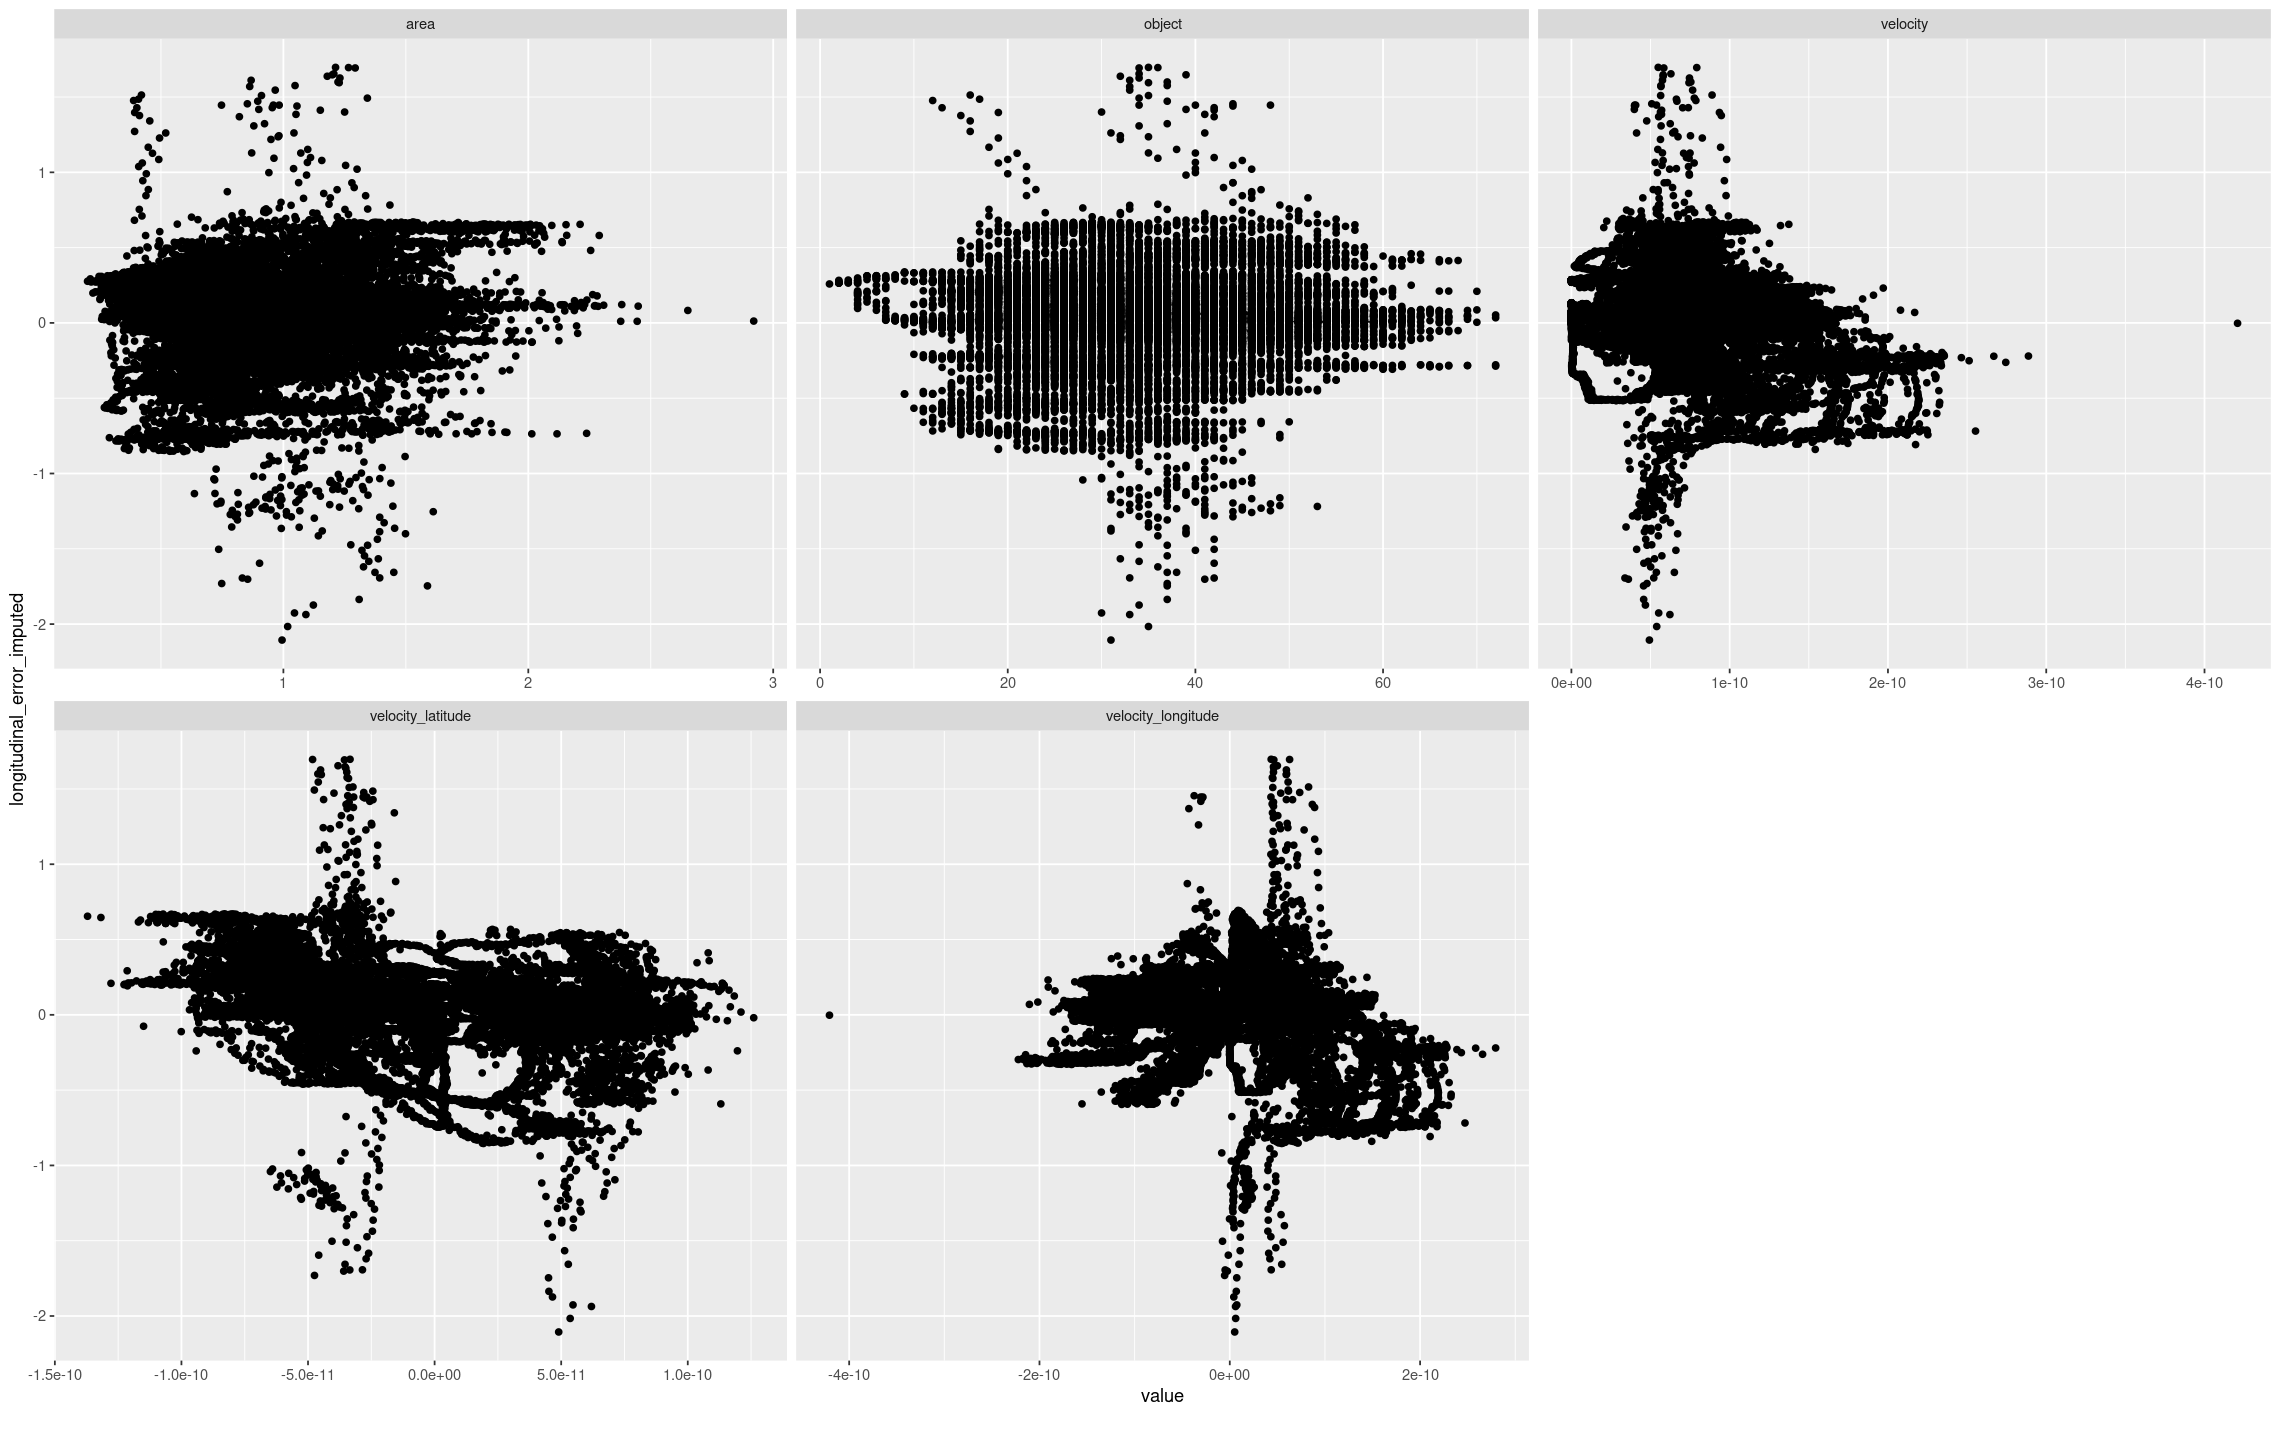

In [65]:
data_bis <- data %>% select(longitudinal_error_imputed, velocity_latitude, velocity_longitude, velocity, area, object)
plot_scatterplot(na.omit(data_bis), by="longitudinal_error_imputed")

## Scatted plot by haversine_error_imputed

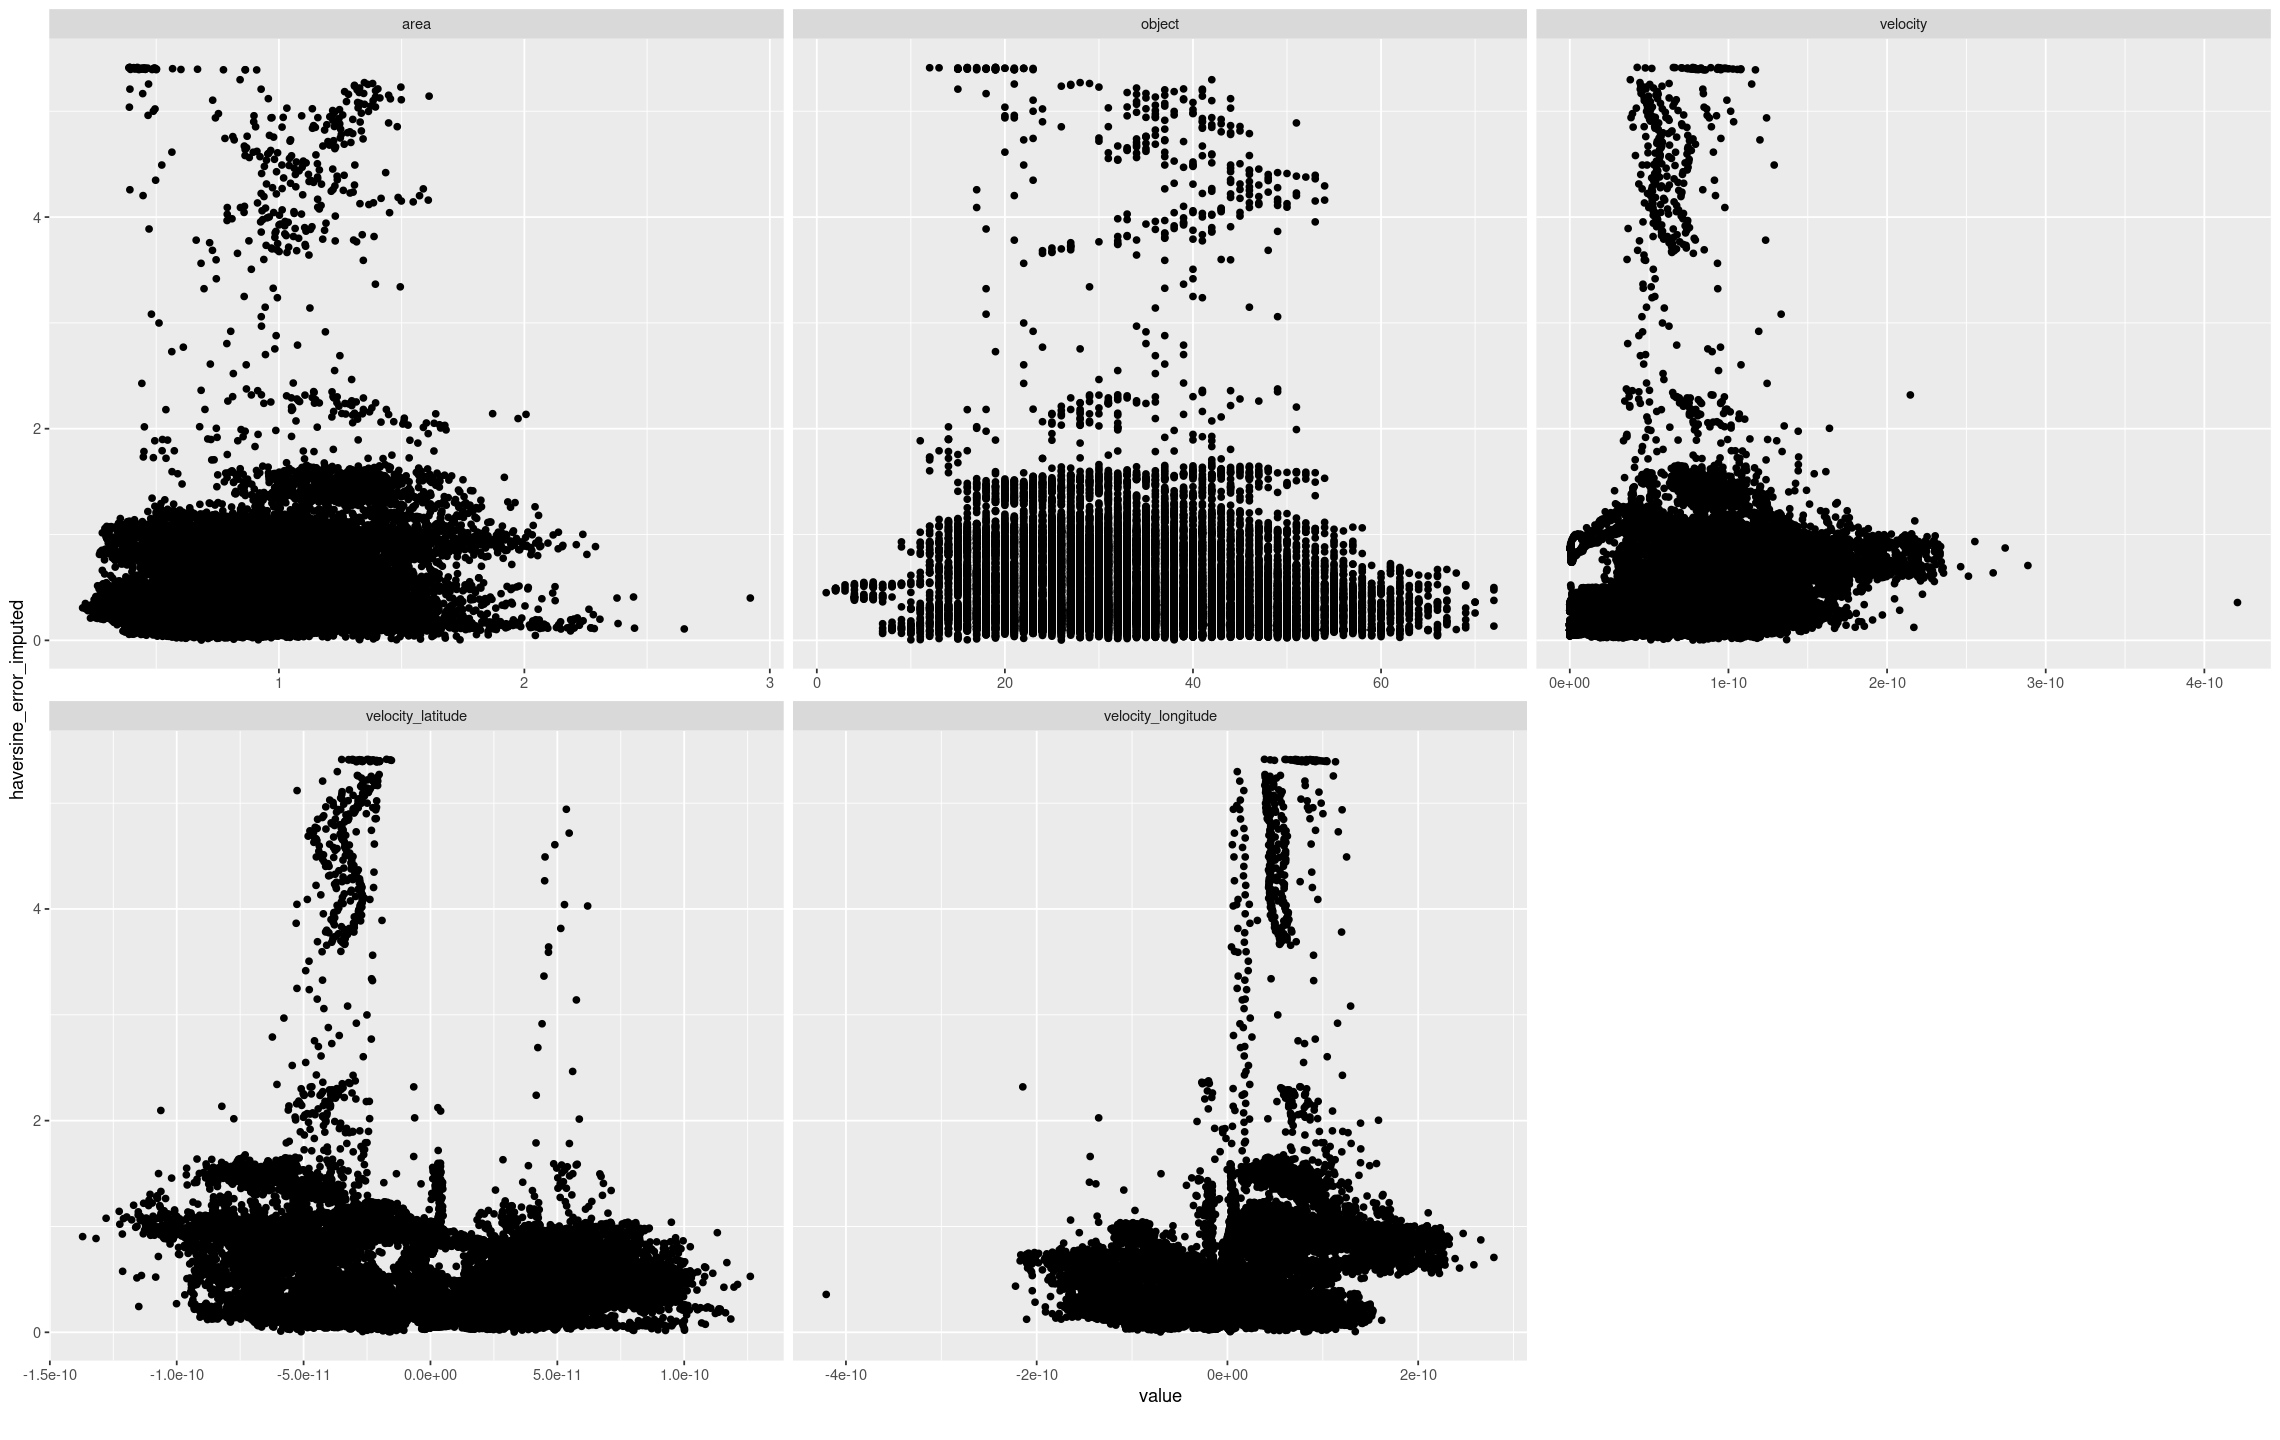

In [66]:
data_bis <- data %>% select(haversine_error_imputed, velocity_latitude, velocity_longitude, velocity, area, object)
plot_scatterplot(na.omit(data_bis), by="haversine_error_imputed")

# Conditional densities

## Conditional density of velocity

In [67]:
covariates_outliers <- data[outlier_positions, c("velocity_latitude", "velocity_longitude", "velocity", "area", "object")]
covariates_outliers <- na.omit(covariates_outliers)

covariates_all <- data %>% select(velocity_latitude, velocity_longitude, velocity, area, object)
covariates_all <- na.omit(covariates_all)

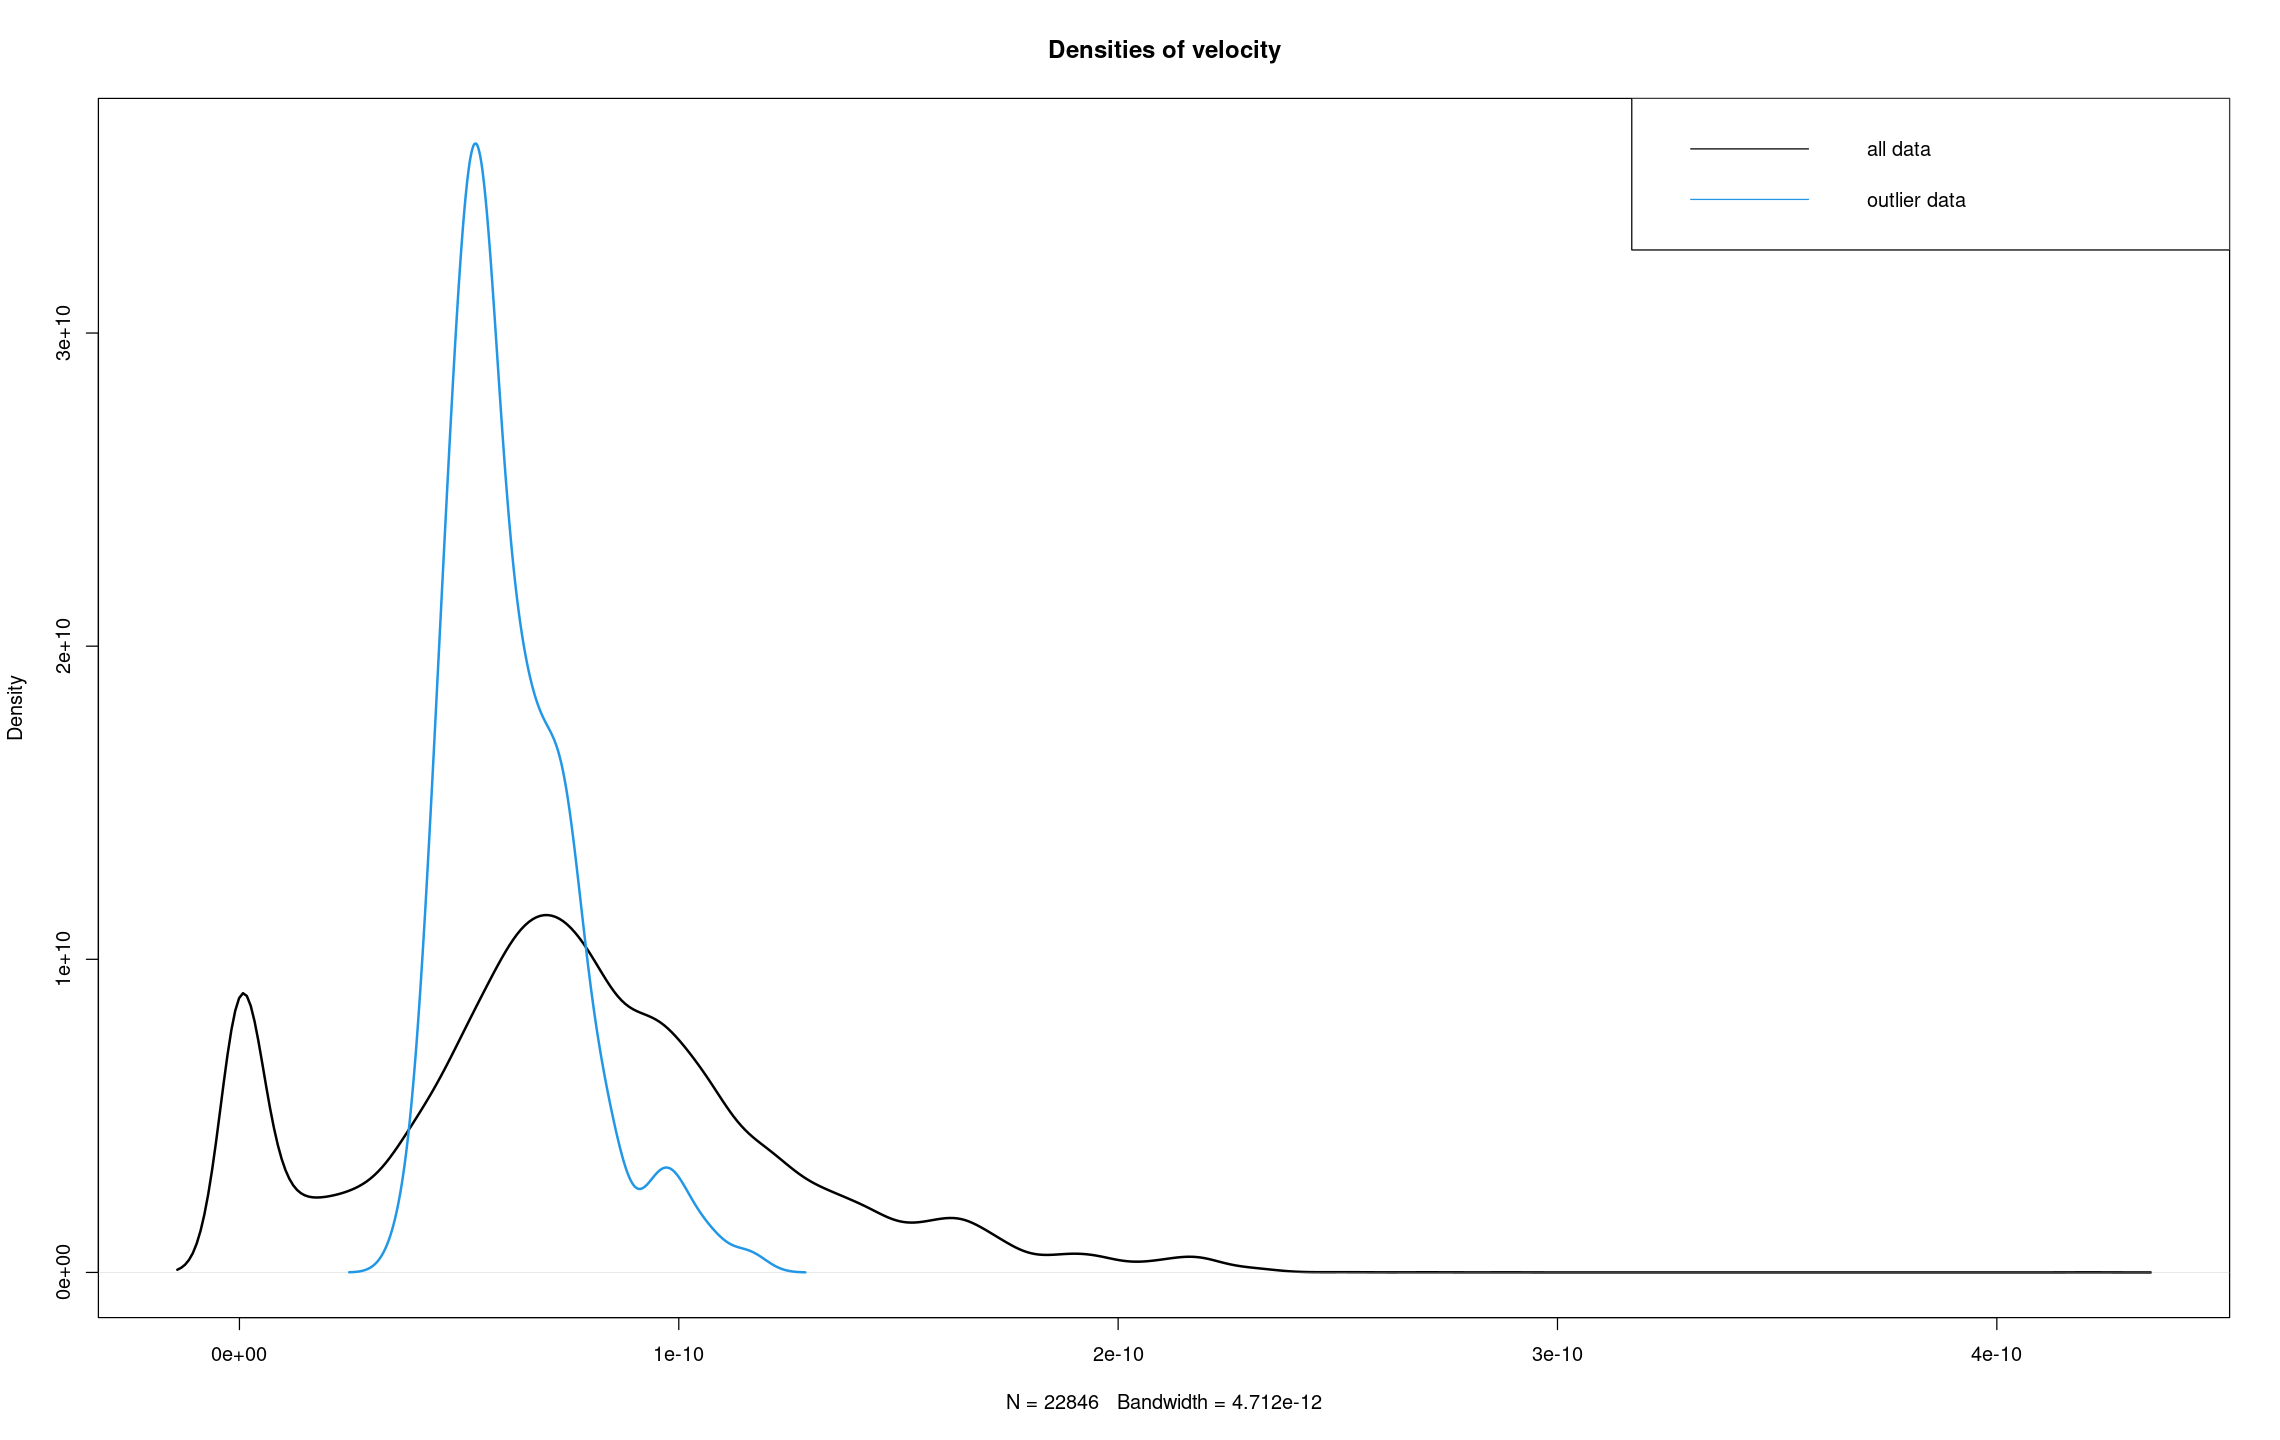

In [68]:
density_outliers <- density(covariates_outliers$velocity)
density_all <- density(covariates_all$velocity)

support <- c(density_outliers$x, density_all$x)
values <- c(density_outliers$y, density_all$y)

plot(density_all, col = 1, lwd = 2, main = "Densities of velocity", 
     xlim = range(support), ylim = range(values))
lines(density_outliers, col = 4, lwd = 2)

legend("topright", legend = c("all data", "outlier data"), 
       lty = 1:1, col = c(1, 4))

## Conditional density of velocity_latitude

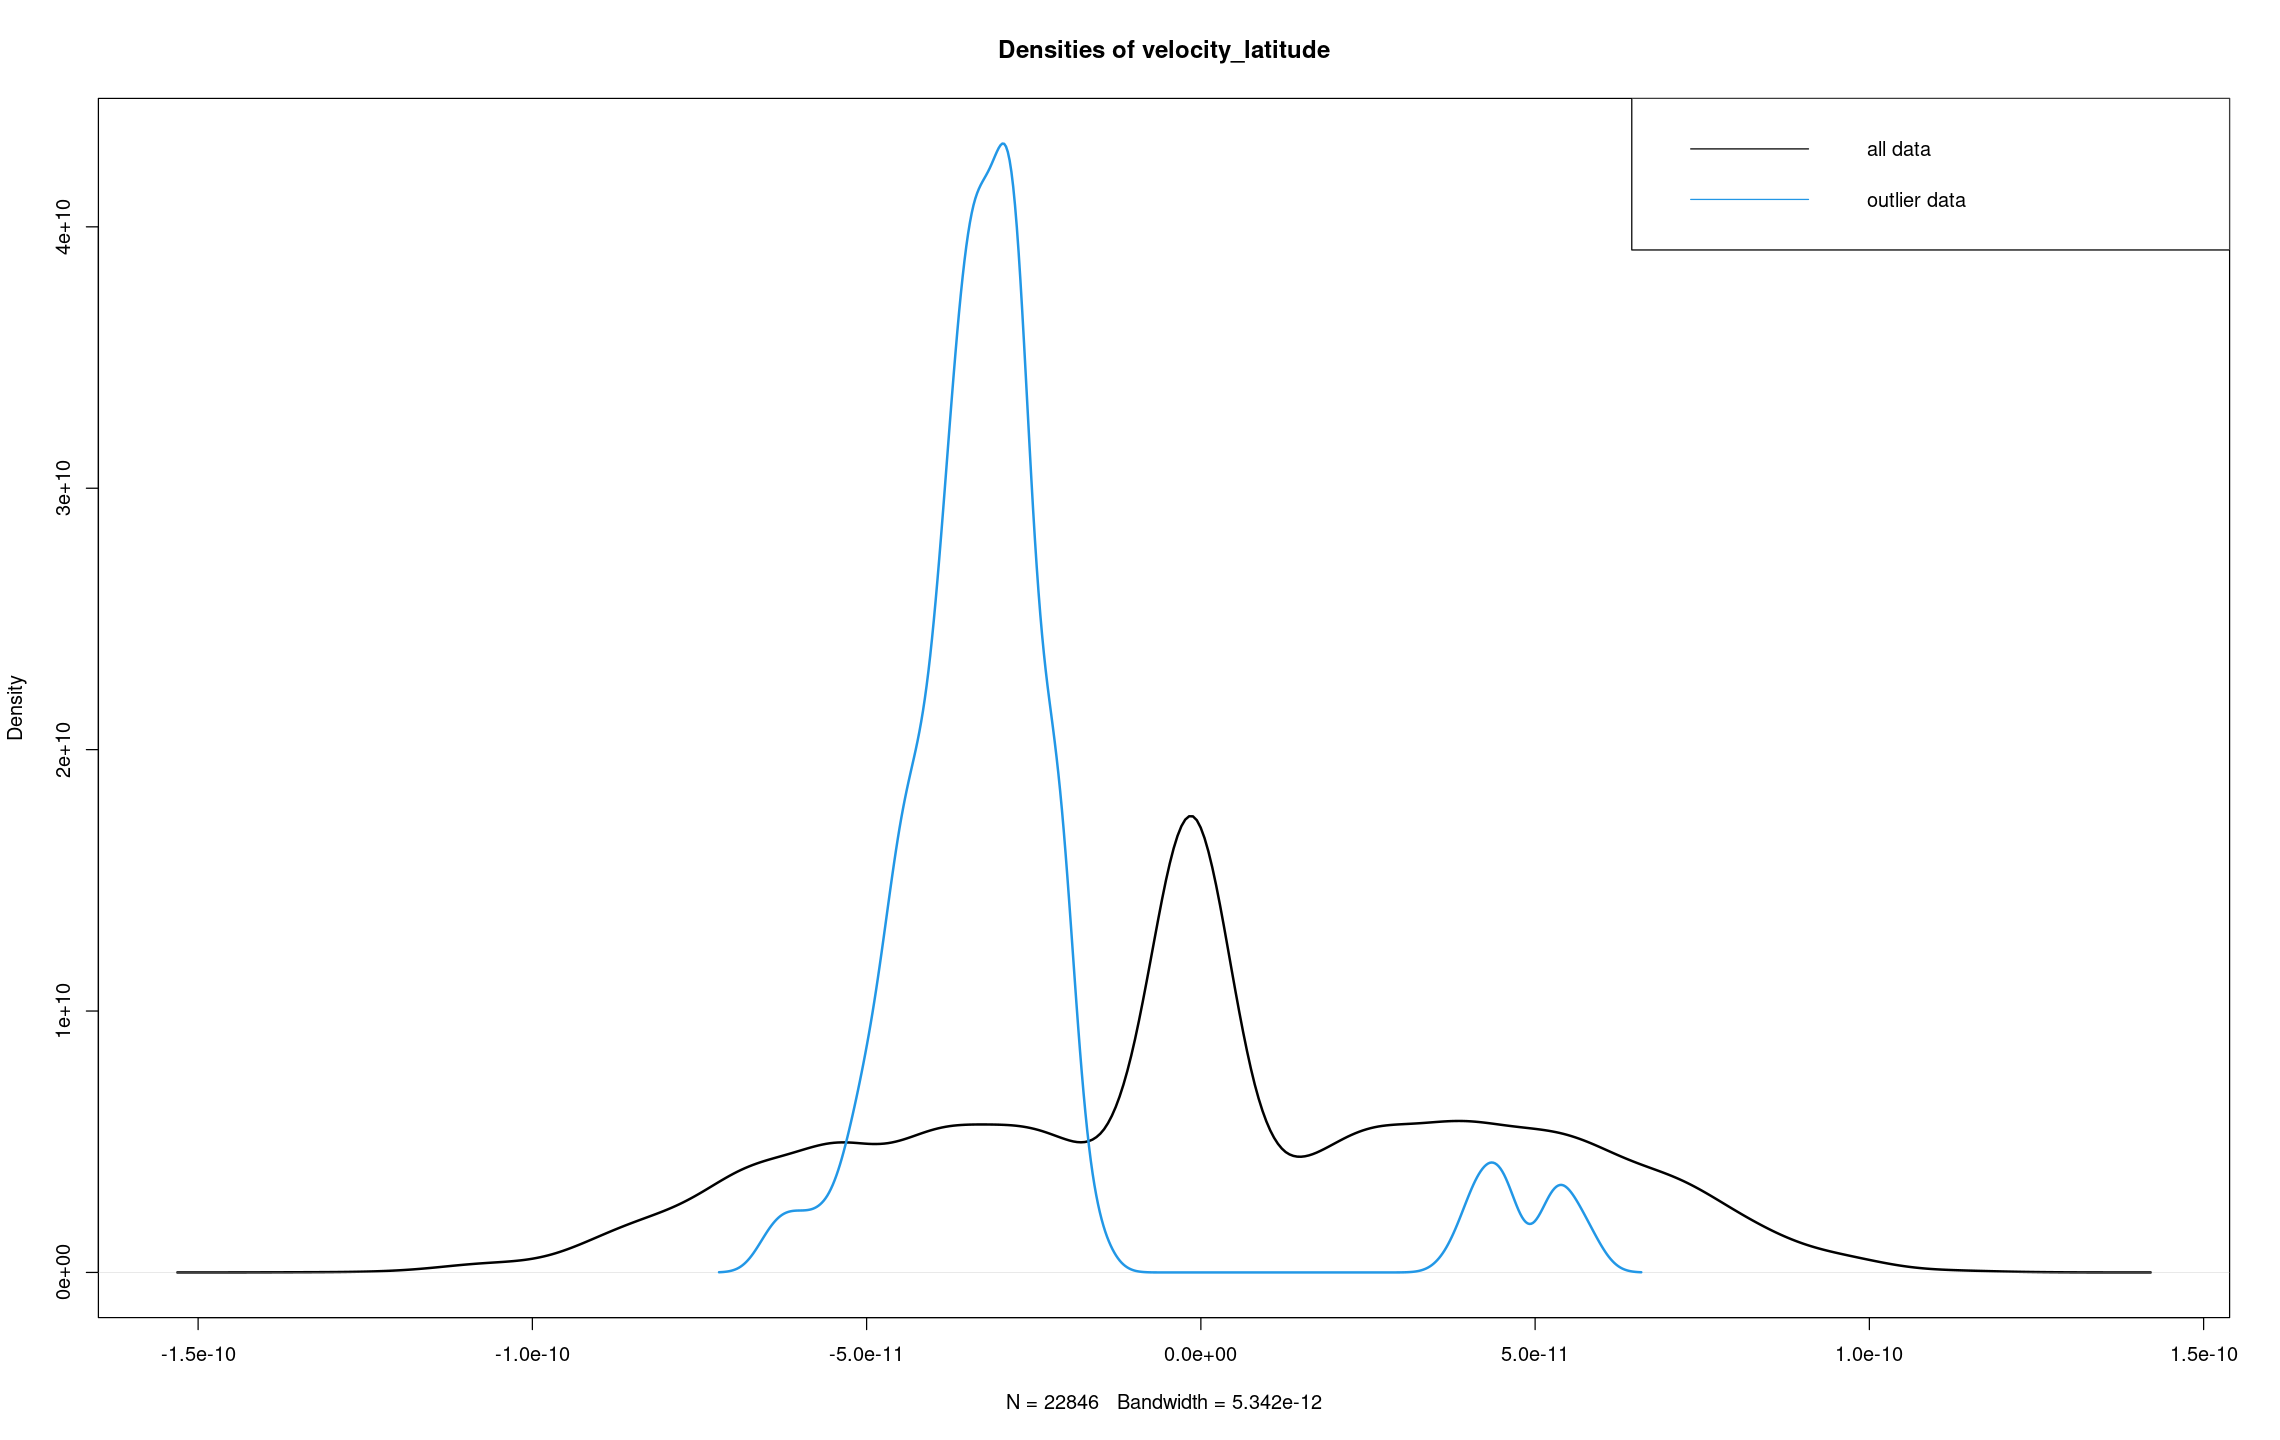

In [69]:
density_outliers <- density(covariates_outliers$velocity_latitude)
density_all <- density(covariates_all$velocity_latitude)

support <- c(density_outliers$x, density_all$x)
values <- c(density_outliers$y, density_all$y)

plot(density_all, col = 1, lwd = 2, main = "Densities of velocity_latitude", 
     xlim = range(support), ylim = range(values))
lines(density_outliers, col = 4, lwd = 2)

legend("topright", legend = c("all data", "outlier data"), 
       lty = 1:1, col = c(1, 4))

## Conditional density of velocity_longitude

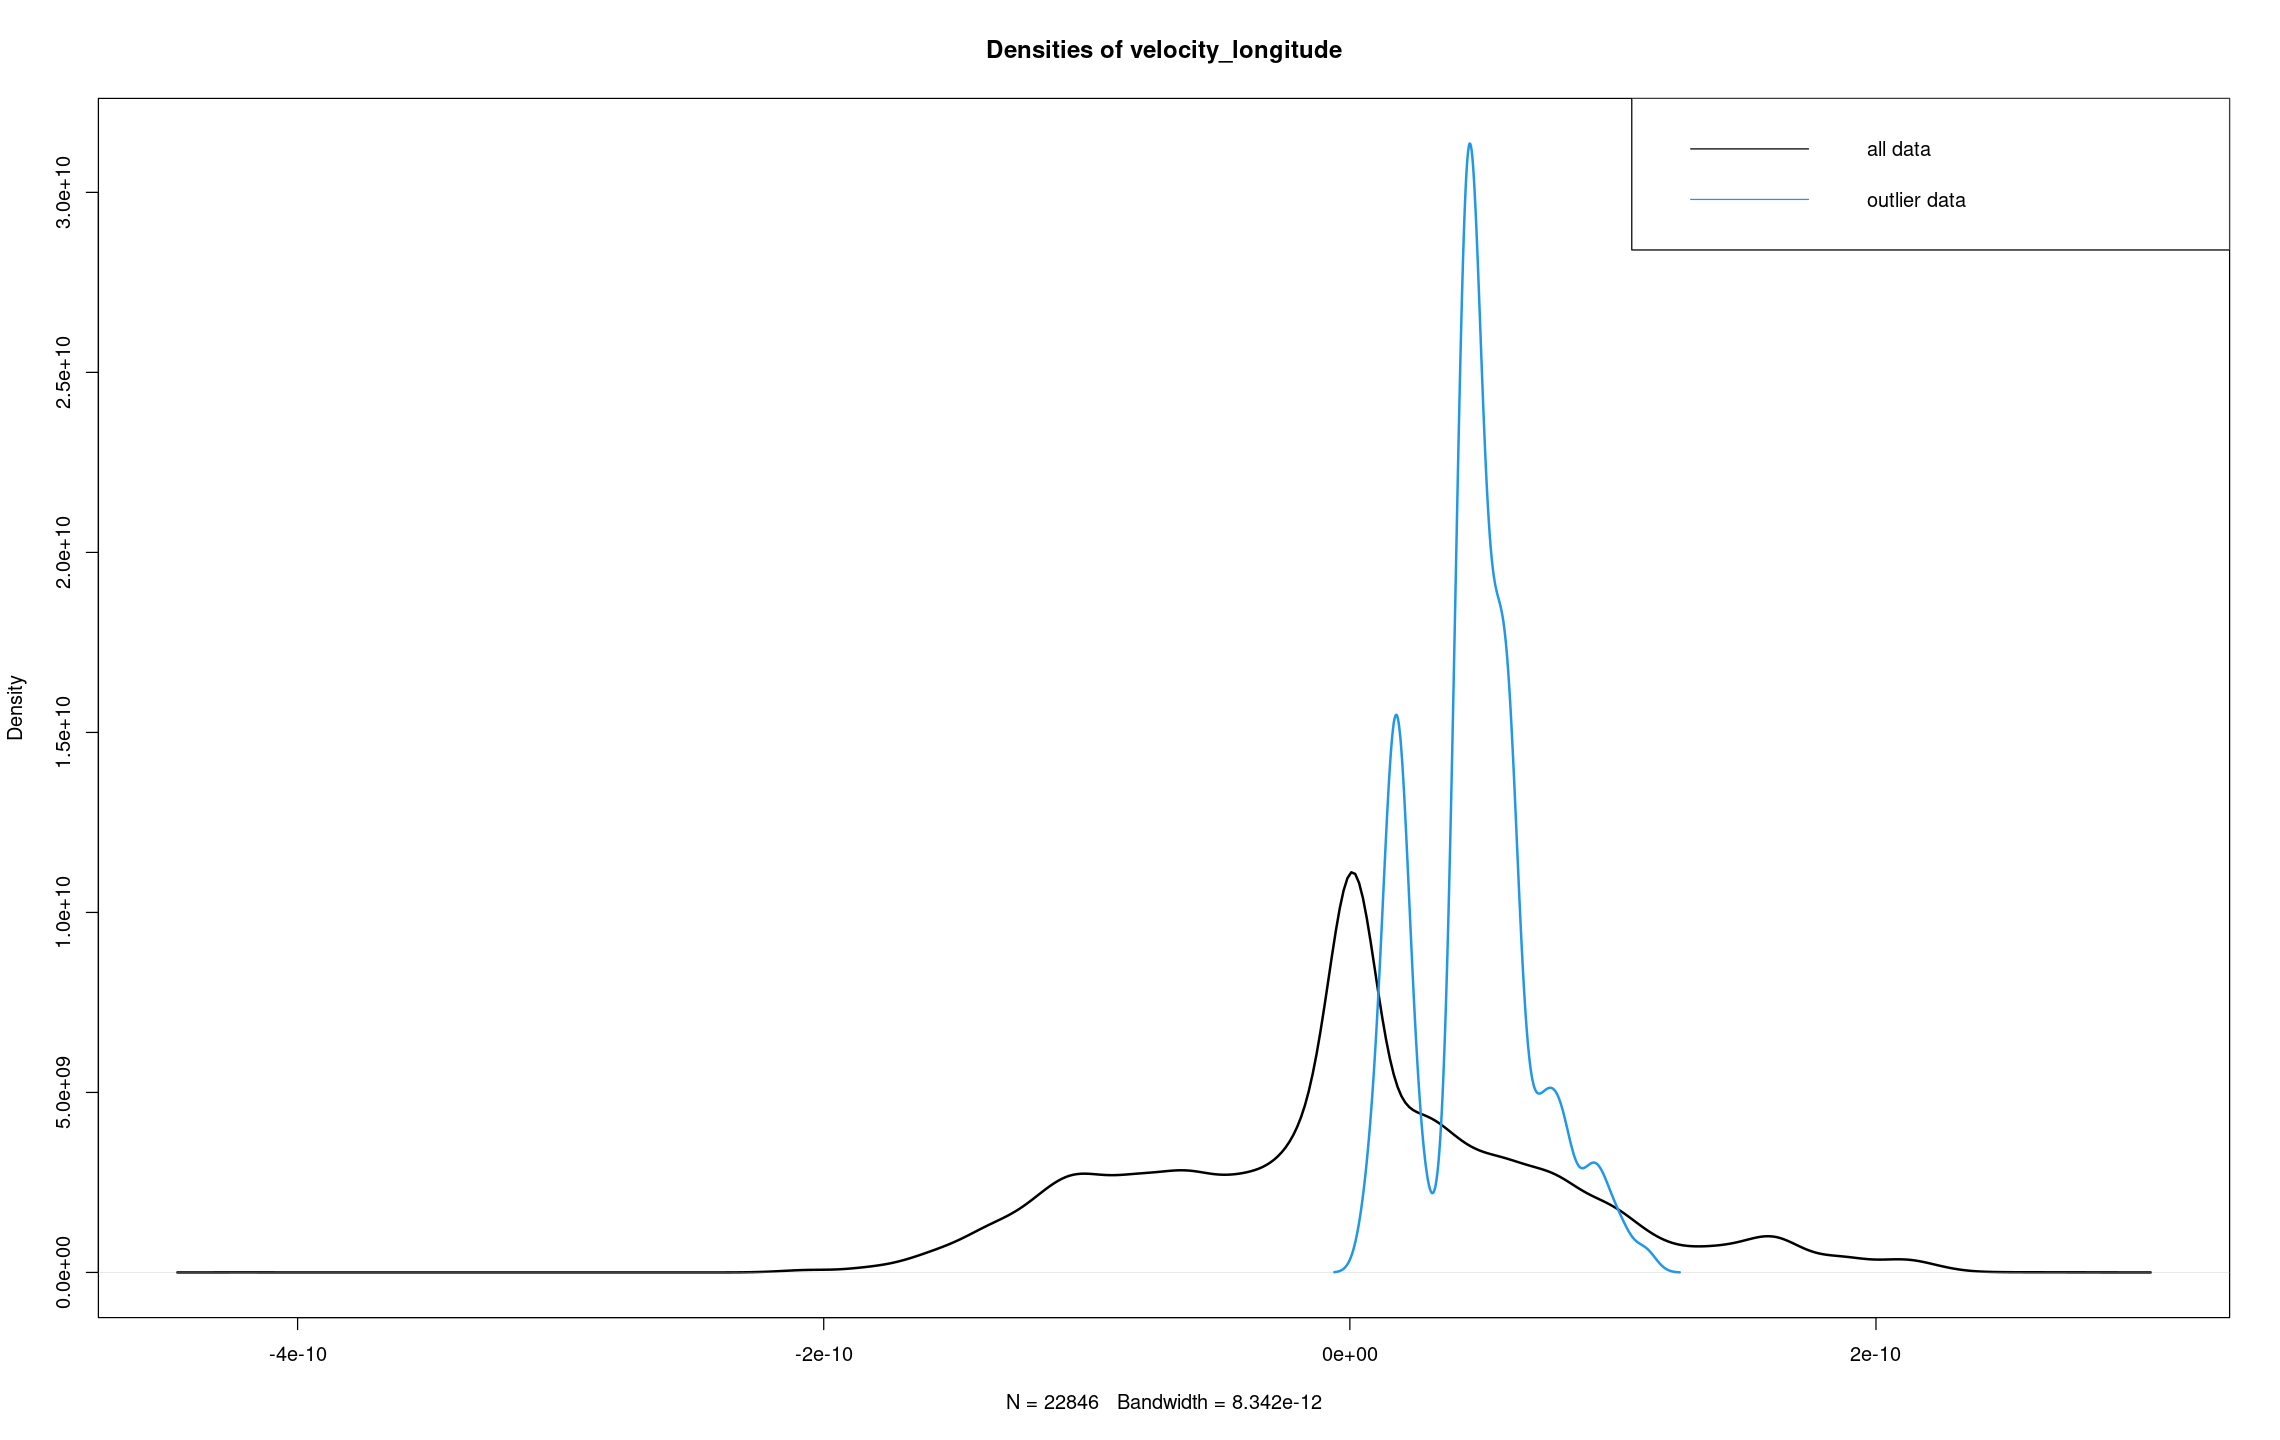

In [70]:
density_outliers <- density(covariates_outliers$velocity_longitude)
density_all <- density(covariates_all$velocity_longitude)

support <- c(density_outliers$x, density_all$x)
values <- c(density_outliers$y, density_all$y)

plot(density_all, col = 1, lwd = 2, main = "Densities of velocity_longitude", 
     xlim = range(support), ylim = range(values))
lines(density_outliers, col = 4, lwd = 2)

legend("topright", legend = c("all data", "outlier data"), 
       lty = 1:1, col = c(1, 4))

## Conditional density of area

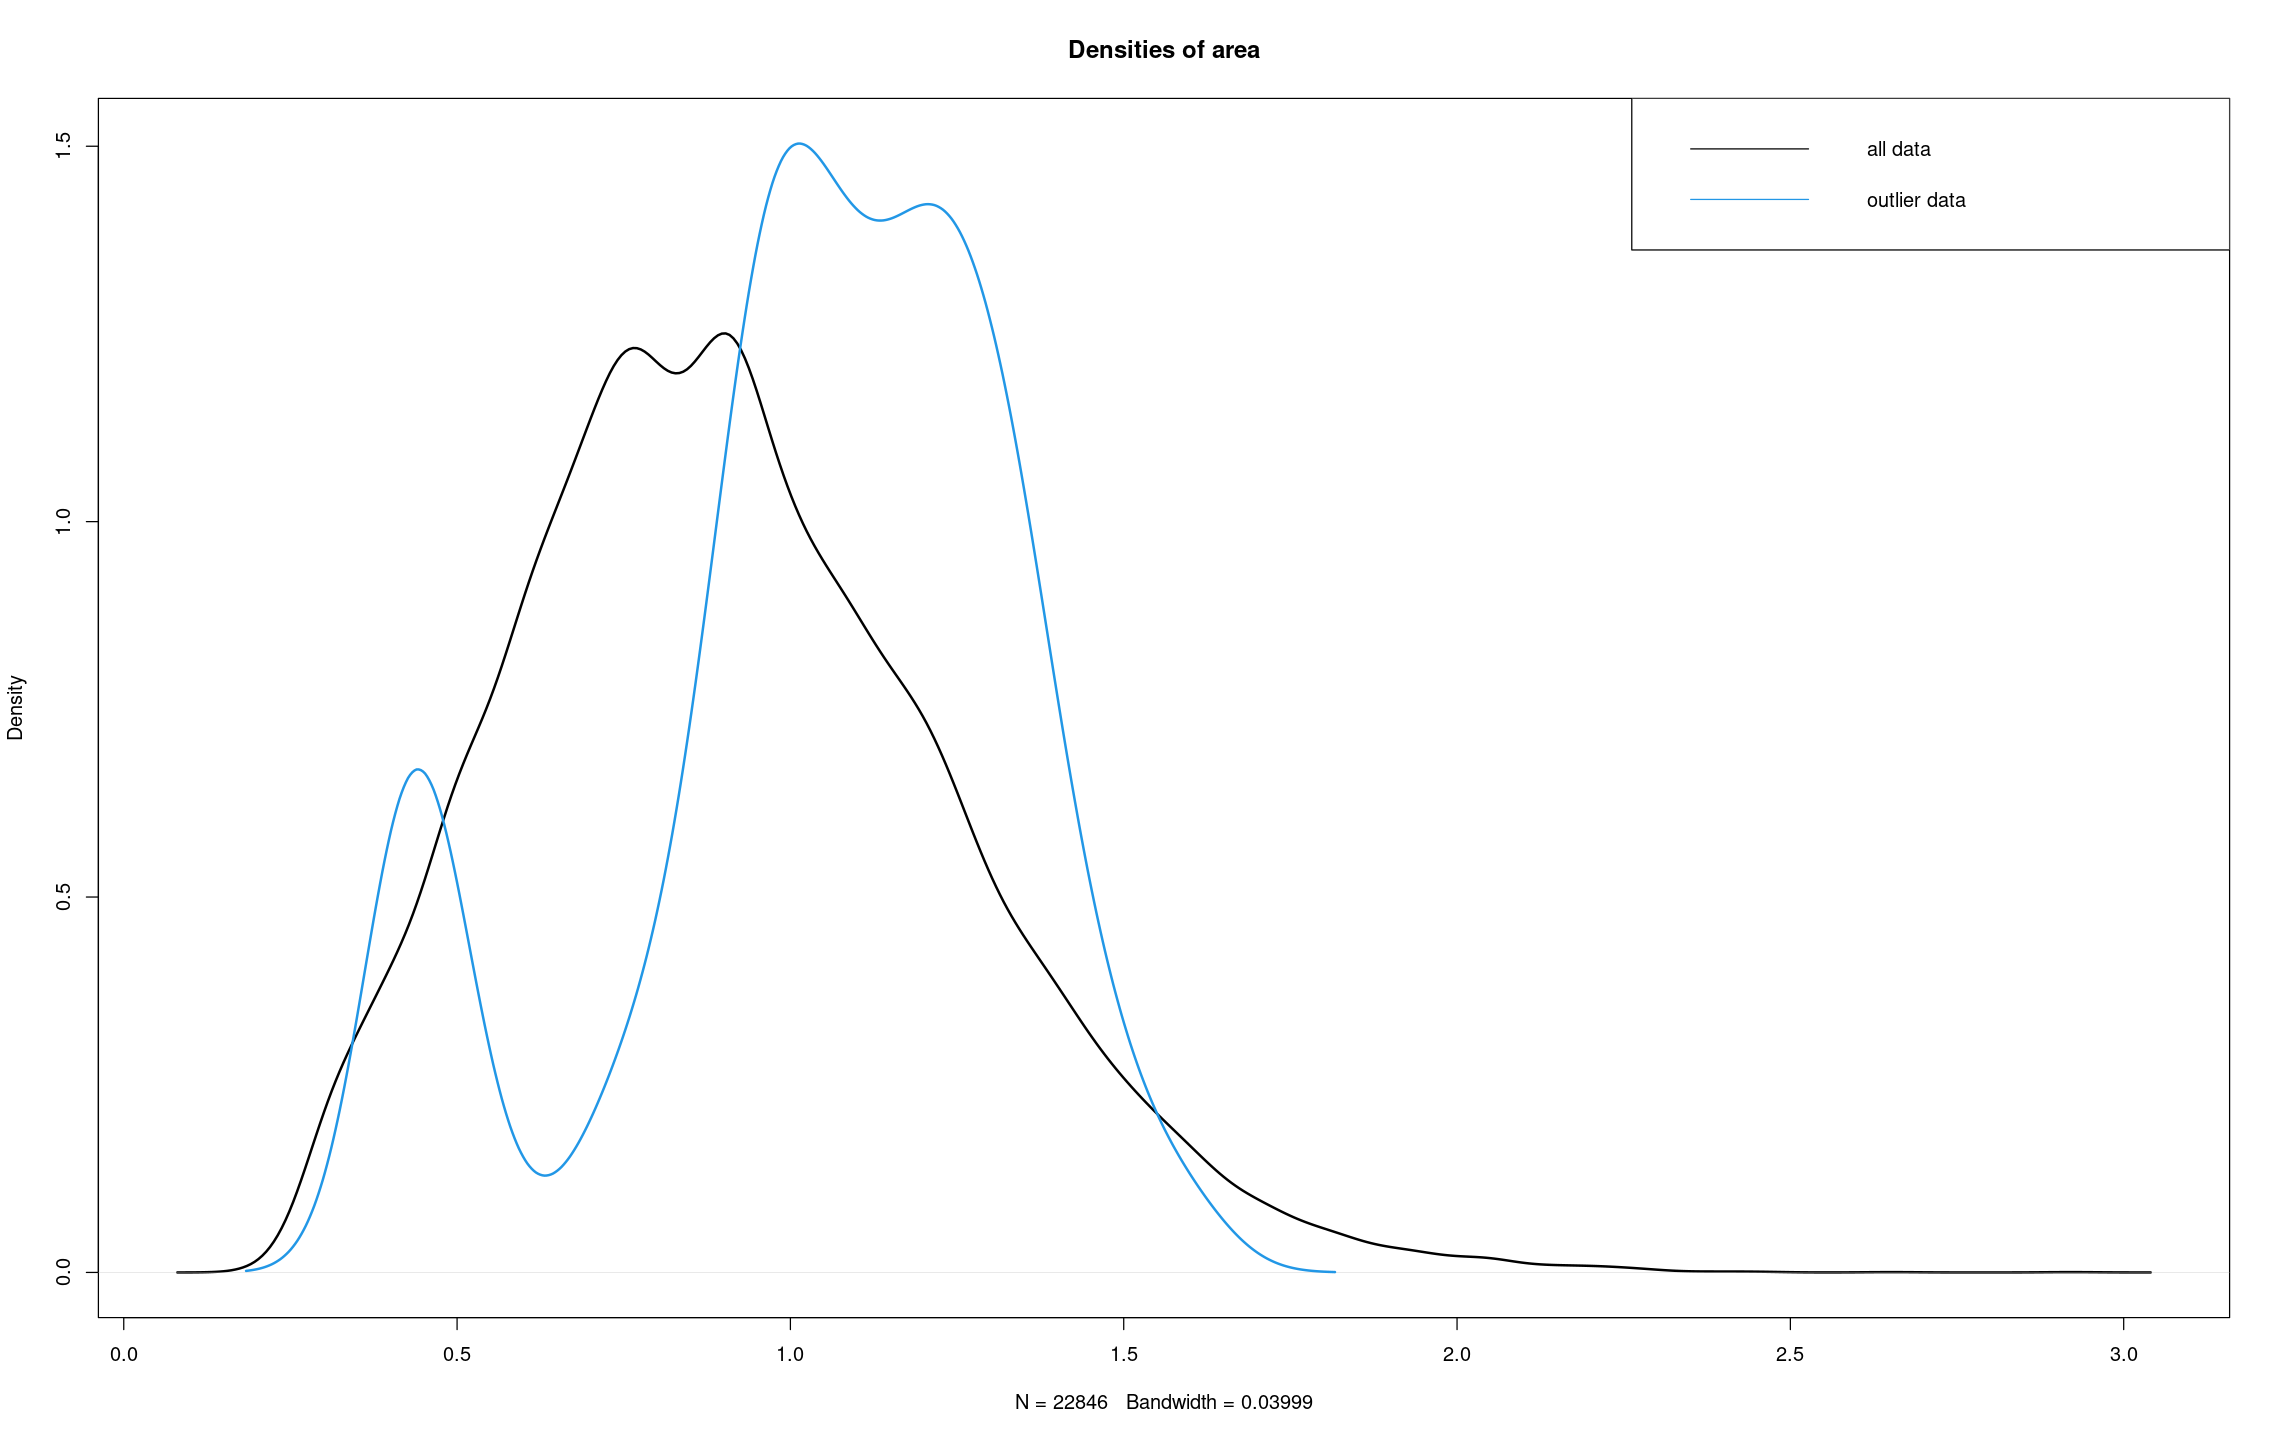

In [71]:
density_outliers <- density(covariates_outliers$area)
density_all <- density(covariates_all$area)

support <- c(density_outliers$x, density_all$x)
values <- c(density_outliers$y, density_all$y)

plot(density_all, col = 1, lwd = 2, main = "Densities of area", 
     xlim = range(support), ylim = range(values))
lines(density_outliers, col = 4, lwd = 2)

legend("topright", legend = c("all data", "outlier data"), 
       lty = 1:1, col = c(1, 4))

## Conditional density of object

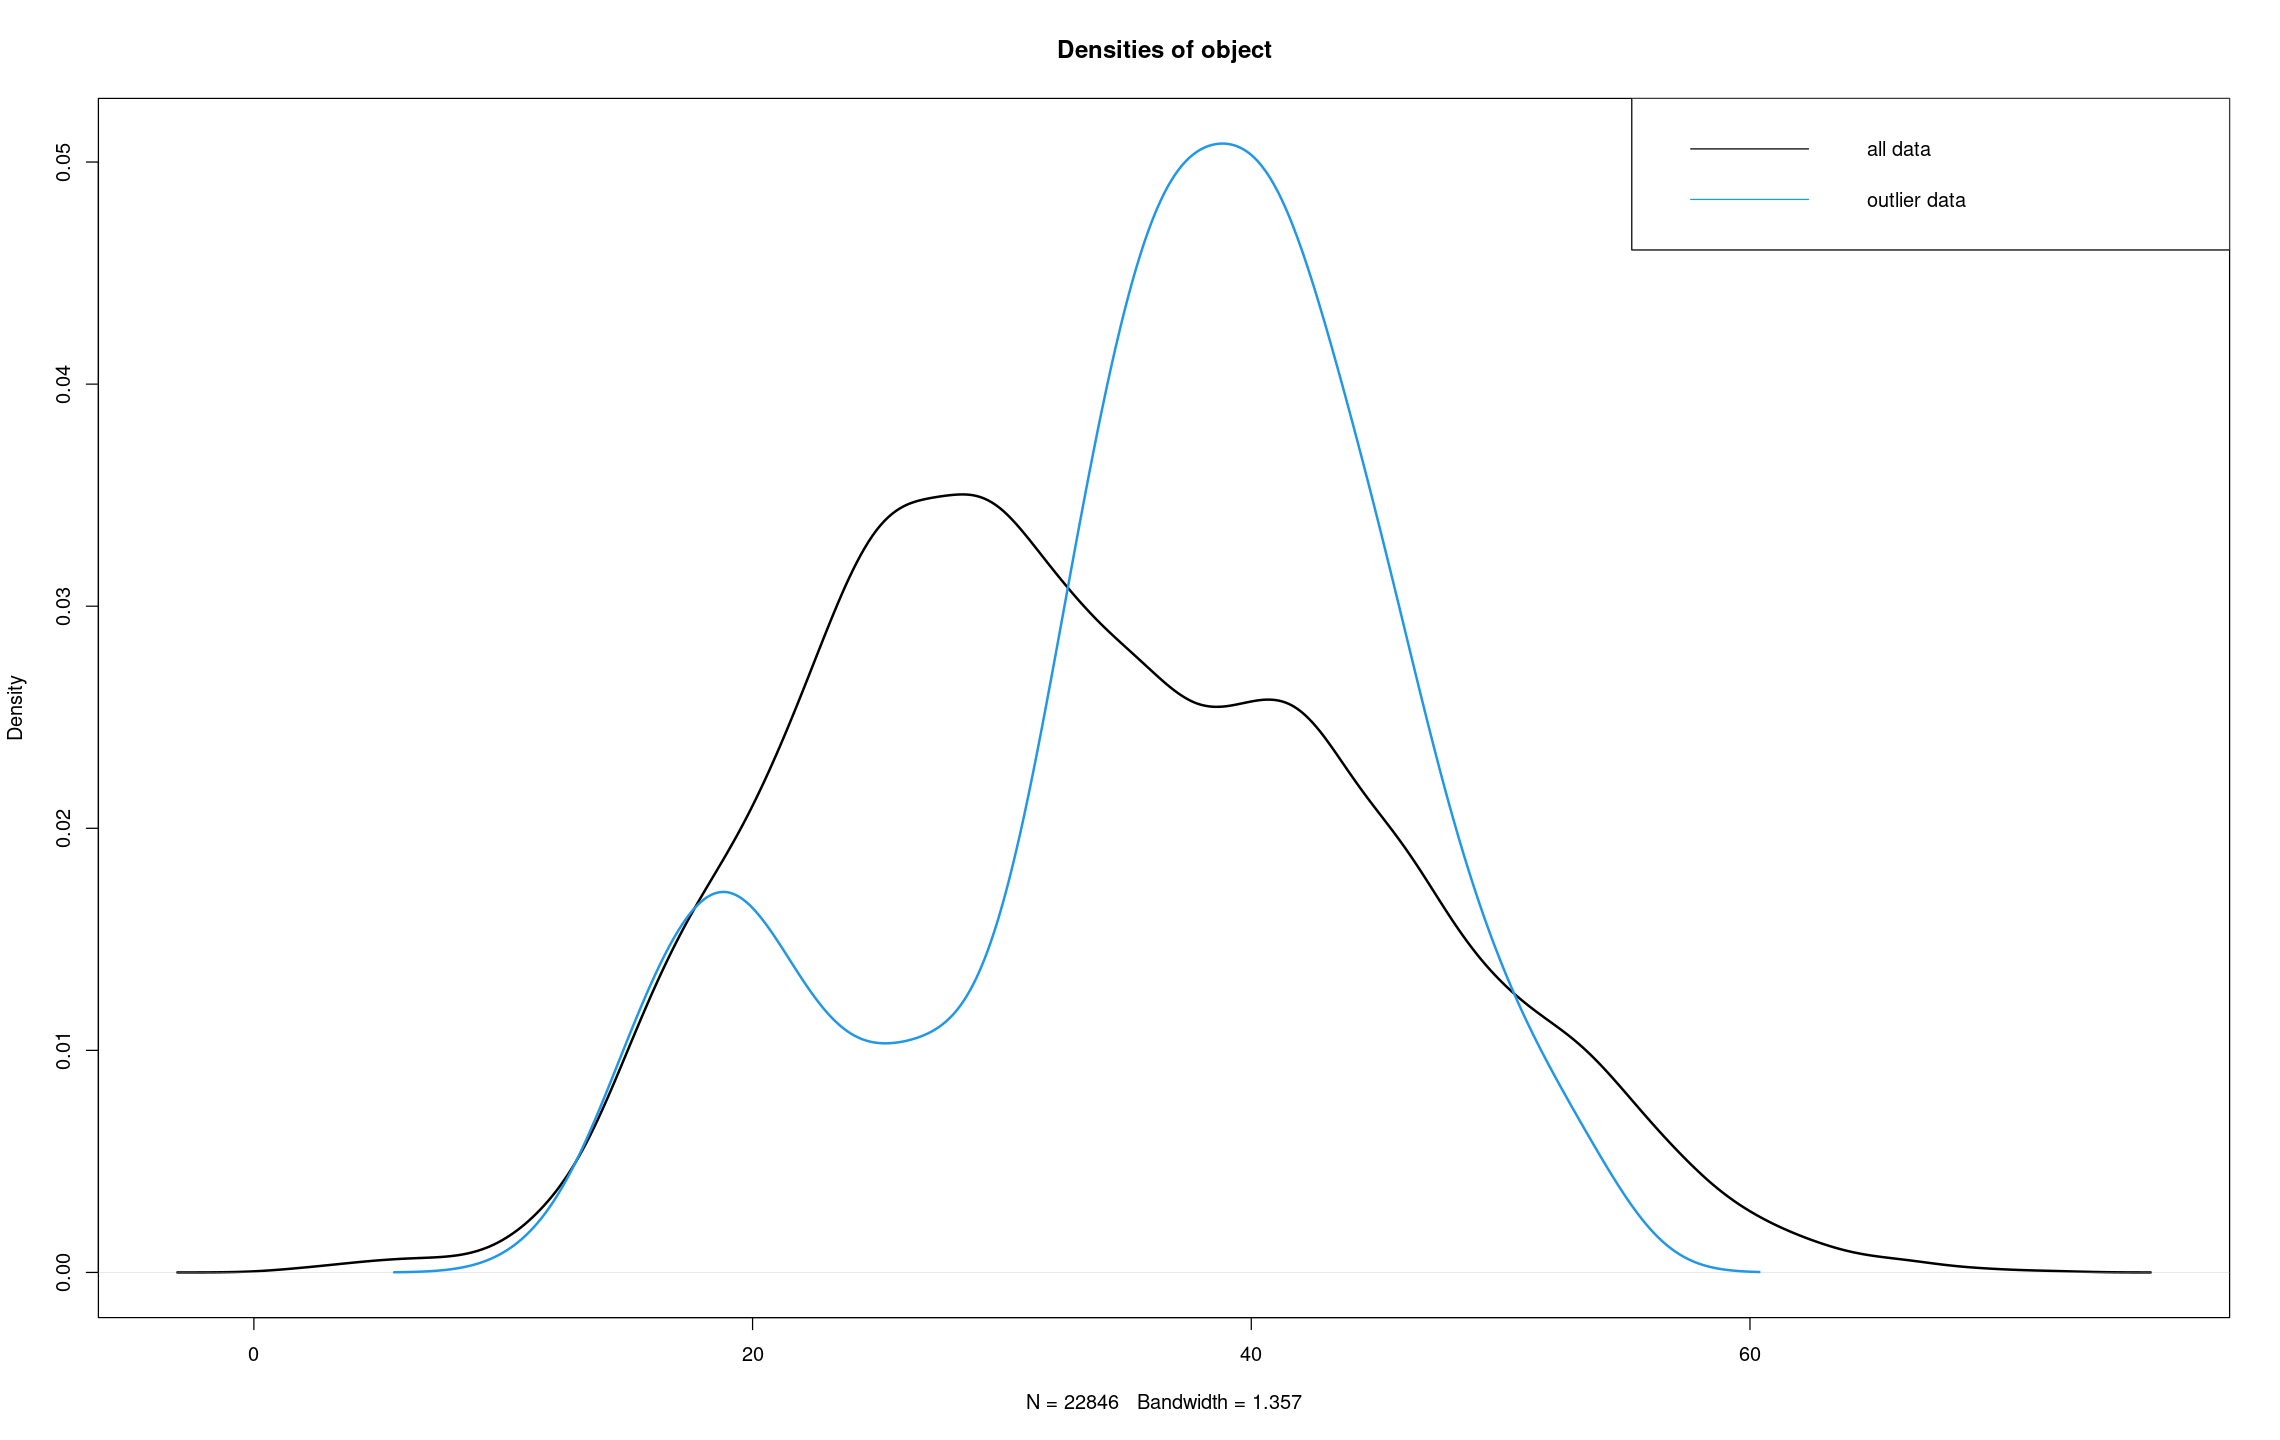

In [72]:
density_outliers <- density(covariates_outliers$object)
density_all <- density(covariates_all$object)

support <- c(density_outliers$x, density_all$x)
values <- c(density_outliers$y, density_all$y)

plot(density_all, col = 1, lwd = 2, main = "Densities of object", 
     xlim = range(support), ylim = range(values))
lines(density_outliers, col = 4, lwd = 2)

legend("topright", legend = c("all data", "outlier data"), 
       lty = 1:1, col = c(1, 4))